<a href="https://colab.research.google.com/github/nchibana/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

In [2]:
survival_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
survival_data = pd.read_csv(survival_data_url, header=None)
survival_data.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
survival_data.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [4]:
survival_data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [5]:
column_headers = ['age', 'operation_year', 'nodes_detected', 'survival_status']

survival_data = pd.read_csv(survival_data_url, names=column_headers)
survival_data.head()

,age,operation_year,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
survival_data['survival_status'].unique()

array([1, 2])

In [0]:
def new_values(status):
  if status == 2:
    return 0
  else:
    return 1

In [0]:
survival_data['survival_status'] = survival_data['survival_status'].apply(new_values)

In [9]:
survival_data.head(10)

,age,operation_year,nodes_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [10]:
survival_data.describe()

,age,operation_year,nodes_detected,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [61]:
time_bins = pd.cut(survival_data['age'], 6)
pd.crosstab(time_bins, survival_data['survival_status'])

survival_status,0,1
age,,
"(29.947, 38.833]",3,31
"(38.833, 47.667]",23,50
"(47.667, 56.5]",27,63
"(56.5, 65.333]",17,54
"(65.333, 74.167]",9,24
"(74.167, 83.0]",2,3


In [62]:
pd.crosstab(time_bins, survival_data['survival_status']).apply(lambda r: r/r.sum(), axis=1)

survival_status,0,1
age,,
"(29.947, 38.833]",0.088235,0.911765
"(38.833, 47.667]",0.315068,0.684932
"(47.667, 56.5]",0.300000,0.700000
"(56.5, 65.333]",0.239437,0.760563
"(65.333, 74.167]",0.272727,0.727273
"(74.167, 83.0]",0.400000,0.600000


In [12]:
!pip install pandas==0.23.4

In [13]:
!pip freeze

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.0.1
astor==0.8.0
astropy==3.0.5
atari-py==0.1.15
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.7
autograd==1.2
Babel==2.6.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.9.156
botocore==1.12.156
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.3.9
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.7
cytoolz==0.9.0.1
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
dill==0.2.9
distributed==1.25.3
Django==2.2.1
dlib==19.16.0
dm-sonnet==1.32
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easydi

In [71]:
time_bins = pd.cut(survival_data['age'], 6)
time_bin_nodes = pd.cut(survival_data['nodes_detected'], 10)
pd.crosstab(time_bins, time_bin_nodes)

nodes_detected,"(-0.052, 5.2]","(5.2, 10.4]","(10.4, 15.6]","(15.6, 20.8]","(20.8, 26.0]","(26.0, 31.2]","(31.2, 36.4]","(41.6, 46.8]","(46.8, 52.0]"
age,,,,,,,,,
"(29.947, 38.833]",24,5,3,0,1,1,0,0,0
"(38.833, 47.667]",57,6,3,4,2,0,0,0,1
"(47.667, 56.5]",66,11,7,2,3,0,0,1,0
"(56.5, 65.333]",56,5,3,2,3,1,1,0,0
"(65.333, 74.167]",28,3,2,0,0,0,0,0,0
"(74.167, 83.0]",5,0,0,0,0,0,0,0,0


In [54]:
pd.crosstab(time_bin_nodes, survival_data['survival_status'])

survival_status,0,1
nodes_detected,,
"(-0.052, 5.2]",46,190
"(5.2, 10.4]",12,18
"(10.4, 15.6]",11,7
"(15.6, 20.8]",4,4
"(20.8, 26.0]",6,3
"(26.0, 31.2]",0,2
"(31.2, 36.4]",1,0
"(41.6, 46.8]",0,1
"(46.8, 52.0]",1,0


In [64]:
pd.crosstab(time_bin_nodes, survival_data['survival_status']).apply(lambda r: r/r.sum(), axis=1)

survival_status,0,1
nodes_detected,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000
"(46.8, 52.0]",1.000000,0.000000


In [49]:
pd.crosstab(survival_data['operation_year'], survival_data['survival_status'])

survival_status,0,1
operation_year,,
58,12,24
59,9,18
60,4,24
61,3,23
62,7,16
63,8,22
64,8,23
65,13,15
66,6,22


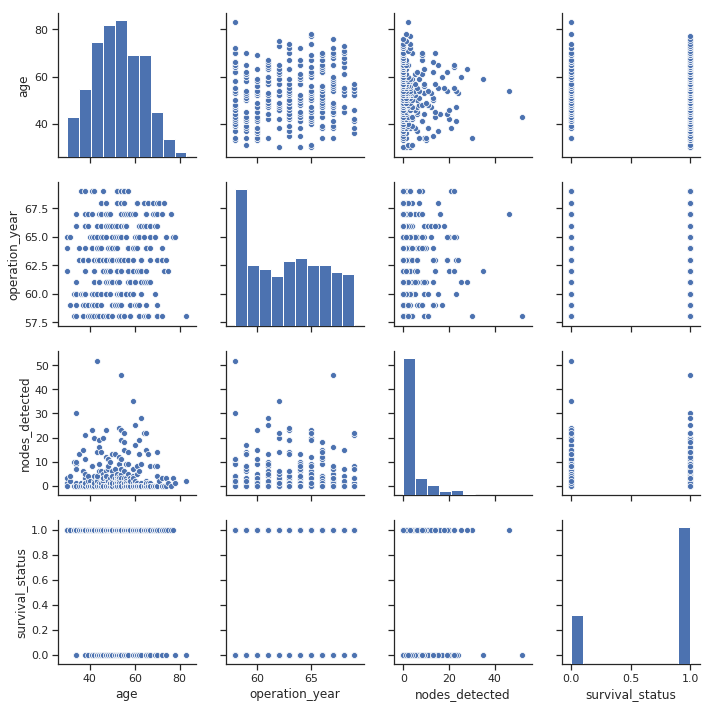

In [45]:
import seaborn as sns
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(survival_data)

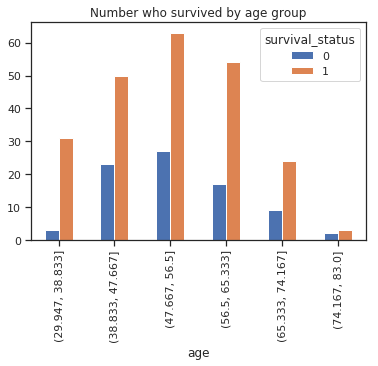

In [60]:
ct = pd.crosstab(time_bins, survival_data['survival_status'])
ct.plot.bar(title='Number who survived by age group');

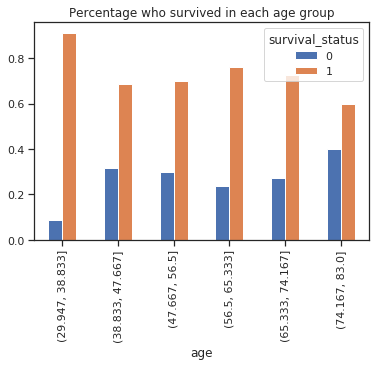

In [63]:
ct_percentage = pd.crosstab(time_bins, survival_data['survival_status']).apply(lambda r: r/r.sum(), axis=1)
ct_percentage.plot.bar(title='Percentage who survived in each age group');

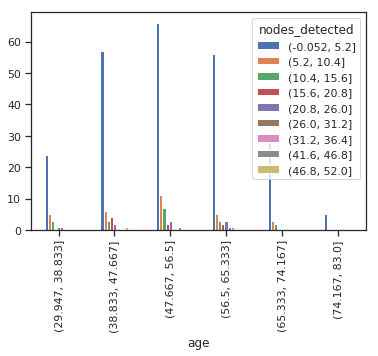

In [47]:
ct2 = pd.crosstab(time_bins, time_bin_nodes)
ct2.plot.bar();

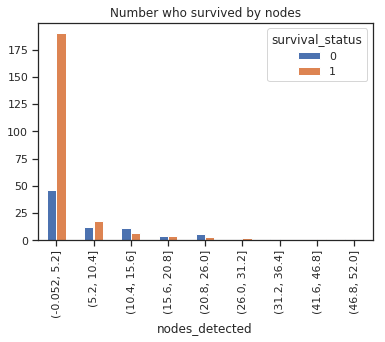

In [68]:
ct3 = pd.crosstab(time_bin_nodes, survival_data['survival_status'])
ct3.plot.bar(title='Number who survived by nodes');

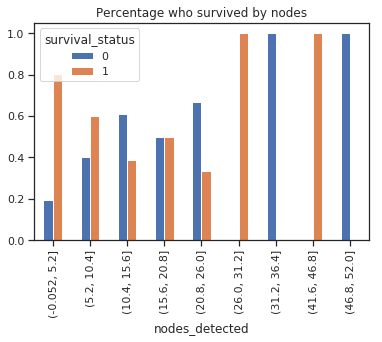

In [67]:
ct3_percentage = pd.crosstab(time_bin_nodes, survival_data['survival_status']).apply(lambda r: r/r.sum(), axis=1)
ct3_percentage.plot.bar(title='Percentage who survived by nodes');

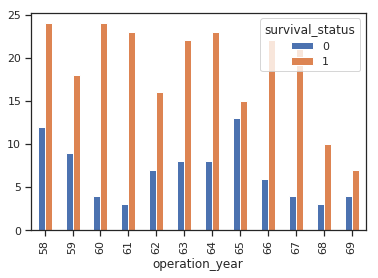

In [65]:
ct4 = pd.crosstab(survival_data['operation_year'], survival_data['survival_status'])
ct4.plot.bar();

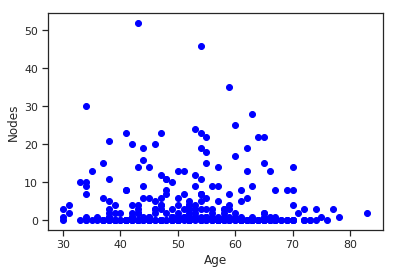

In [69]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_axisbelow(True)
ax1.set_xlabel('Age')
ax1.set_ylabel('Nodes')
plt.scatter(survival_data ['age'], survival_data['nodes_detected'], color = 'blue');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

It seems that age is related to survival (although it doesn't seem like a positive relationship), since those who are younger seem more likely to survive, while those on the other extreme of the age spectrum, have lower chances of survival, as seen below:

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAFuCAYAAACGDHNnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3XdYFGf3N/AvLCxFRIQgRQgaNYDm%0AIaIgFrBgQcoClkiiwS5qbLHEHgTbI5qERDTxQQ1R0cSoUQTBEk3EHlETLGgUsYB0pNdd5v2Dl/m5%0A0hZZnN2d87kurmt3dmb2DLtzduaeM/etxjAMA0IIIbyhznUAhBBC3i5K/IQQwjOU+AkhhGco8RNC%0ACM9Q4ieEEJ6hxE8IITxDiZ+0KldXV1y+fJnrMJrF3t4ez58/l/t6G/tfBAYGYvv27XJ/zzf122+/%0A4ZNPPuE6DNJKNLgOQFG5uroiJycHAoEAOjo6GDhwIL788ku0adOG69BYrq6uWL9+Pfr37891KCrl%0A1q1bb/09165d+9bfk/AXHfE3YseOHbh16xaOHj2KO3fu4Icffmj2OsRicStERt4UfR78QZ91wyjx%0Ay8DExAQuLi54+PAhAKCoqAgrV66Es7MzXFxcEBoaColEAqDmFPnjjz/Gxo0b4eTkhLCwMADAr7/+%0ACnd3d9jb28PDwwN3794FAGRmZmLevHno27cvXF1dsXfvXvZ9w8LCsGDBAixduhT29vbw9PTE7du3%0AAQBffPEFXrx4gVmzZsHe3h47d+4EAMyfPx8DBgxA7969MWHCBDZmAHj58iVmzZqFXr16YcyYMQgN%0ADZU6nU9OTsaUKVPQp08fuLm5ITY2tt7/x9WrVyESidjnU6ZMwZgxY9jn48ePx++//84+T0pKgkgk%0AQu/evfH555+joqKCfe3XX3/F8OHD0adPH8yaNQuZmZn1vmdFRQWWLFkCJycnODg4YMyYMcjJyQFQ%0AtwklLCwMS5YsAQCkpqbC2toahw4dwuDBgzFp0iRMnz4dkZGRUuv39vbG6dOnAQDW1tZ4+vQp/vnn%0AHwwYMID9bAHgzJkz7LZXV1cjPDwcw4YNg5OTExYsWID8/Hx23mPHjmHIkCFwcnJq8qBh+fLlCA0N%0ABQBcu3YNAwcOxI8//oh+/frB2dkZR44caXDZxr6Pz549w8SJE+Hk5AQnJycsXrwYhYWF7LLp6emY%0AO3cu+vbtCycnpzpnHiEhIXB0dISrqyvOnz/fYAy1/4fa7/eZM2fY1yQSCTZt2gQnJye4uroiMjIS%0A1tbWbGJuLP7XlZeXY9myZXB0dIS7uzt27tyJgQMHsq+7uroiPDwcIpEIPXv2hFgsRnJyMvz9/eHg%0A4ABPT0+cPXuWnd/f3x+HDh1in7/exGVtbY29e/di6NChcHJyQkhICKqrqxv8PygLSvwySE9PR3x8%0APGxtbQHU7KQaGho4ffo0jh07hkuXLkl9eRITE2FpaYlLly5h9uzZiIuLQ1hYGEJCQnDz5k388MMP%0AMDAwQHV1NWbPng1ra2vEx8djz5492LNnDy5cuMCu69y5c/D09ERCQgJcXV2xbt06AMCWLVtgbm7O%0AnpXMmDEDADBw4ECcOnUKV65cQffu3dkECNQ0J+jo6ODSpUsICQnBsWPH2NdKS0sxdepUeHl54fLl%0AywgNDUVwcDAePXpU5//Rs2dPPHnyBHl5eaiqqsKDBw+QlZWF4uJilJeX486dO+jduzc7f1xcHHbt%0A2oWzZ8/iwYMH+O233wAAV65cwddff41vv/0WFy9eRMeOHbFo0aJ6P4OjR4+iuLgYf/75J65du4bg%0A4GBoa2vL/Blev34dsbGx2L17N7y8vBATE8O+9ujRI7x48QKDBw+WWubDDz+Ejo4Orl69yk6Ljo5m%0AE/++ffvw+++/IzIyEhcuXEC7du3YxPno0SMEBwdj8+bNuHDhAvLz85GRkSFzvDk5OSgqKkJ8fDw2%0AbNiAtWvXoqCgoN55G/s+MgyDmTNn4sKFC4iLi0NGRgZ7MCKRSDBz5kyYm5vj3LlziI+Ph4eHB7ve%0AxMREdO7cGVevXsX06dOxatUqNNTDi6WlJfbv348bN25g7ty5+OKLL5CVlQWg5sc9Pj4eUVFROHr0%0AqNRBQVPxv27btm1IS0vD77//joiICBw/frzOPCdOnEB4eDgSEhLAMAxmzZqFAQMG4PLly1i9ejWW%0ALFmCx48fN/EJ/J8zZ87gyJEjOHr0KM6dO9foj7CyoMTfiDlz5sDBwQHjx4+Ho6MjZs2ahZycHJw/%0Afx4rV66Erq4ujIyMMHnyZJw4cYJdrkOHDvD394eGhga0tbVx+PBhTJ8+HXZ2dlBTU4OVlRU6duyI%0A27dvIy8vD3PnzoVQKISlpSXGjRsndaTdu3dvDBo0CAKBAD4+Prh//36jMY8dOxZ6enoQCoWYN28e%0A7t+/j6KiIkgkEpw+fRrz5s2Djo4OunbtCl9fX3a5P//8Ex07dsSYMWOgoaGB7t27w83NDSdPnqzz%0AHtra2vjPf/6DhIQE3L17FzY2NujVqxdu3ryJv//+G1ZWVmjfvj07v7+/P0xMTGBgYIAhQ4YgKSkJ%0AQE0SHTNmDHr06AGhUIhFixbh77//Rmpqap331NDQQH5+Pp4+fQqBQIAPPvgAenp6Mn+W8+bNg66u%0ALrS1tTFs2DDcv38faWlpbBzDhw+HUCiss5ynpyf7I1FcXIz4+Hh4enoCAH755RcsXLgQpqamEAqF%0AmDt3Lk6dOgWxWIyTJ09i8ODBcHR0hFAoxIIFC6CuLvvupqGhgTlz5kBTUxODBg2Crq4uUlJS6szX%0A1PfRysoKAwYMgFAohKGhIaZMmYLr168DqEnsWVlZWLp0KXR1daGlpQUHBwd23ebm5hg3bhwEAgFG%0AjRqF7Oxs9izrde7u7jAxMYG6ujo8PDxgZWWFxMREADU//BMnToSpqSnatWuHgIAAmeN/XVxcHGbO%0AnIl27drB1NQUEydOrDOPv78/zMzMoK2tjX/++QelpaUICAiAUChEv379MGTIkAbXX58ZM2bAwMAA%0A5ubmmDhxotRBg7Kii7uN2L59e50Lp//++y/EYjGcnZ3ZadXV1TAzM2Ofm5qaSi2Tnp6Od999t876%0A09LSkJWVJbWzSSQSqefvvPMO+1hbWxsVFRUQi8XQ0Kj70UkkEoSGhuLkyZPIy8tjE83Lly9RXl4O%0AsVgsFeerj9PS0pCYmFgnFm9v73r+M4CjoyP++usvmJiYwNHREfr6+rh+/TqEQiH69OkjNa+xsTH7%0AWEdHhz0SzMrKQo8ePdjX2rRpAwMDA2RmZsLCwkJqHT4+PsjIyMCiRYtQWFgIb29vLFy4EJqamvXG%0A97pXPxM9PT0MGjQIJ06cQEBAAGJiYrB+/fp6lxOJRPj4448RHByMM2fOoHv37ujYsSMA4MWLF5gz%0AZ45UQldXV0dubi6ysrKk3lNXVxcGBgYyxQoABgYGUp+xjo4OSktL68z34sWLRr+POTk52LBhAxIS%0AElBSUgKGYaCvrw+g5ntpbm5e73cJkP7u6ejoAEC9MQA1zVoRERHsj2lpaSlevnwJoOZzbmj/aCr+%0A1zW2rlqvvl77Obz6GZmbmzfYpFifV9fXsWNH9vurzCjxN1Pt0d3Vq1cb3GHU1NSknpuZmeHZs2d1%0A5jMzM4OFhQXbttxS0dHROHv2LCIiImBhYYGioiI4OjqCYRgYGhpCQ0MDGRkZ6Ny5M4CaHf/VWBwd%0AHRERESHTe/Xp0webNm2Cubk5ZsyYgXbt2uHLL7+EpqYmJkyYINM6OnTowCYKoCZZ5Ofnw8TEpM68%0AmpqamDt3LubOnYvU1FQEBASgc+fO+Oijj6Cjo4OysjJ23uzs7DrLv/6ZeHl5Ydu2bXB0dERFRQWc%0AnJzqjbFr164wNzdHfHw8YmJi4OXlxb5mamqKjRs3SjVrvbptycnJ7POysjKp9n95aer7+M0330BN%0ATQ3R0dEwMDDA77//zjZHmZmZIT09vcEDCVmlpaVh9erV+Omnn2Bvb8+endYyNjaWauZ69bEs+9Or%0AatfVtWvXOuuq9epn3aFDB2RkZKC6uppN/unp6ejUqRMA1Pnu1HdGk56ejm7dugGo+aHq0KFDk3Eq%0AOmrqaaYOHTpgwIAB2LRpE4qLi1FdXY1nz57hr7/+anCZsWPH4scff8SdO3fAMAyePn2KtLQ02NnZ%0AoU2bNggPD0d5eTkkEgn+/fdf9hS5Ke+8845UvXlJSQmEQiHat2+PsrIyfPPNN+xrAoEAw4cPx7Zt%0A21BWVobk5GRERUWxrw8ePBhPnjzBsWPHUFVVhaqqKiQmJkolr1fZ29sjJSUFiYmJsLOzQ7du3diz%0ABkdHR5ni9/Lywm+//YakpCRUVlbim2++gZ2dXZ2jfaDmgvKDBw8gkUigp6cHDQ0Ndke2sbFBbGws%0AqqqqcPv2bZw6darJ9x40aBBevHiBrVu3wsPDo9FmGC8vL+zZswfXr1/HyJEj2emffPIJvv32W/bH%0AKy8vj22/dnNzw59//omEhARUVlZi69atrXJRsKnvY0lJCXR1ddG2bVtkZmZi165d7LJ2dnYwNjbG%0A119/jdLSUlRUVODGjRvNjqGsrAxqamowNDQEABw5ckSqqMDd3R179+5FZmYmCgsL2UIEWeJ/nbu7%0AO/73v/+hoKAAmZmZdS7Sv87Ozg7a2trYtWsXqqqqcO3aNZw7d469lmFra4szZ86grKwMT58+xeHD%0Ah+usY/fu3SgoKEB6ejr27t0rdR1EWVHifwObN29GVVUVPDw84OjoiPnz59d7lFnL3d0ds2bNwuLF%0Ai9GrVy/MmTMHBQUFEAgE2LFjB+7fv4+hQ4eib9++WL16NYqLi2WKIyAgAD/88AMcHBywe/du+Pr6%0AwtzcHC4uLvD09ETPnj2l5g8MDERRUREGDBiApUuXwtPTk23X1tPTw+7duxEbGwsXFxc4Ozvjq6++%0AQmVlZb3vraurix49eqBr167sOuzt7WFubg4jIyOZ4u/fvz8WLFiAefPmwdnZGc+fP2crW16Xk5OD%0A+fPno3fv3vDw8ECfPn3Yo8rPP/8cz549Q58+fRAWFiZVcdQQoVCI4cOH4/Lly1JH8fXx8vLC9evX%0A0bdvXza5AcDEiRPh6uqKqVOnwt7eHuPGjWN/tLt164bAwEAsWbIELi4u0NfXr7dZQh4a+z7OnTsX%0A9+7dg4ODAwICAjBixAh2udrv39OnTzFkyBAMHDgQcXFxzX7/rl27YurUqfj444/Rv39//Pvvv+jV%0Aqxf7+rhx4zBgwAB4e3vD19cXgwYNgoaGBgQCQZPxv27OnDkwNTXF0KFDMXnyZLi5udV7baaWUCjE%0Ajh07EB8fj759+7IX3Lt06QIAmDRpEjQ1NdG/f38sW7as3u/O0KFDMXr0aPj6+mLw4MEYO3Zss/9H%0AikaNBmLhry1btiAnJwchISFch0J45Pz58wgKCsIff/zR4nUdOHAAsbGxTR75vylra2ucPn0aVlZW%0ArbJ+rtARP48kJyfj/v37YBgGiYmJOHz4MIYPH851WETFlZeX4/z58xCLxcjMzMT27dsxbNiwN1pX%0AVlYWbty4gerqajx+/BgRERFvvC4+o4u7PFJSUoLFixcjKysLRkZGmDp1KoYOHcp1WETFMQyDrVu3%0A4vPPP4e2tjYGDx6MBQsWvNG6qqqqsGbNGqSmpqJt27bw9PTE+PHj5Ryx6qOmHkII4RmFOOKvvdvT%0A2NiYveBDCCGkcRKJBNnZ2fjggw+adSe7QiT+O3fuyFz7TQghRNr+/fulbr5sikIk/to7O/fv399q%0AJW+EEKJqMjIyMGHCBKm742WhEIm/tnnH1NS03pt3CCGENKy5TeRUzkkIITxDiZ8QQniGEj8hhPCM%0AQrTxE0IUU1VVFVJTU1FeXs51KLymra0NCwsLmbshbwolfkJIg2rvkO3UqVOdrq3J28EwDHJzc5Ga%0Amsp2qd5S1NRDCGlQeXk5jIyMKOlzSE1NDUZGRnI966LETwhpFCV97sn7M6DETwghPMPbxF8trn+A%0AkdZajhBCFAVvL+6qawjxeMOYZi/33qojrRANIeR106dPh6enJ0aNGtWi9fj7+8Pb2xsfffSRnCJT%0Afrw94ieEKLZdu3a1OOnLg7W1NZ4+fSrz/P7+/jh06FArRtRylPgJIW+dWCzmOgReo8RPCGm28PBw%0AuLi4wN7eHm5ubrhy5QqWL1+O0NBQdp5r165h4MCB7HNXV1eEh4dDJBKhZ8+eCA8Px/z586XWu379%0Aeqxfvx7A/x05V1ZWwsHBAf/++y87X15eHuzs7JCbm4uCggLMnDkTffv2haOjI2bOnImMjIxmbc/T%0Ap0/x6aefonfv3nBycsLnn38OAGx38T4+PrC3t0dsbGyj7xcaGoqEhASsXbsW9vb2WLt2LVJTU2Ft%0AbS31Y/fqWUFD792aKPETQprl8ePH2L9/Pw4fPoxbt25h9+7d6Nixo0zLnjhxAuHh4UhISICnpyfO%0Anz+P4uJiADWDipw8eRJeXl5SywiFQgwfPhwnTpxgp8XFxcHR0RFGRkaorq7G6NGj8ccff+CPP/6A%0AlpYW1q5d26xt+u677zBgwABcv34d8fHx+PTTTwHUdBUPAFFRUbh16xY8PDwafb+FCxfCwcEBgYGB%0AuHXrFgIDA9/4vVsTJX5CSLMIBAJUVlYiOTkZVVVVsLCwwLvvvivTsv7+/jAzM4O2tjY6duyI7t27%0A4/fffwcAXL16Fdra2ujZs2ed5UQikVTij46OhkgkAgC0b98ebm5u0NHRgZ6eHmbPno3r1683a5s0%0ANDTw4sULZGVlQUtLq9FBTeTxfm/63vJCiZ8Q0ixWVlZYuXIlwsLC0L9/fyxcuBCZmZkyLWtmZib1%0A3MvLCzExMQCAmJiYOkf7tZycnFBeXo5//vkHqampuH//PoYNGwYAKCsrQ2BgIIYMGYJevXphwoQJ%0AKCwshEQikXmbvvjiCzAMg7Fjx8LT0xOHDx9ucF55vN+bvre88LackxDy5kQiEUQiEYqLixEYGIiv%0AvvoKenp6Ut0K5OTk1Fnu9TtQ3d3dERISgoyMDJw5cwYHDx6s9/0EAgFGjhyJmJgYvPPOOxg8eDD0%0A9PQAAD/++CNSUlLw66+/wtjYGElJSfD19QXDMDJvj7GxMXttISEhAVOmTIGjoyOsrKzqzNvc99PV%0A1QVQ0/1FbczZ2dlv9N7yQkf8hJBmefz4Ma5cuYLKykoIhUJoaWlBXV0dtra2OH/+PPLz85GdnY09%0Ae/Y0uS5DQ0P06dMHK1asgIWFBbp06dLgvCKRCHFxcYiOjpY6MygpKYGWlhb09fWRn5+Pbdu2NXub%0A4uLi2Au07dq1g5qaGtTVa9LjO++8g+fPn8v8fq/Pb2hoCBMTE0RFRUEikeDw4cNSrzf23q2FEj8h%0ApFkqKyvx9ddfw8nJCc7OzsjLy8OiRYvg4+MDGxsbuLq6YurUqfDw8JBpfV5eXrh8+XKDzTy1Pvzw%0AQ+jo6CArK0uqWmjSpEmoqKhA37594efnBxcXl2Zv0+3bt/HRRx/B3t4es2fPxqpVq2BpaQkAmDt3%0ALpYvXw4HBwfExsY2+X4TJ07EqVOn4OjoyB7Jr1u3Drt374aTkxMePXoEe3t7md67tagxzTkfaiWp%0AqakYOnQozp49+1bH3KU7dwlpXFJSEmxtbbkOg6D+z+JNcycd8RNCCM/QxV1CCC8EBgYiOjq6znSR%0ASNTsun9lR4mfEMILa9eu5V2Cbwg19RBCCM9Q4ieEEJ6hxE8IITxDiZ8QopAqq96sCwSu1qtM6OIu%0AIUQhCTUFEC2Okvt6o7/2kWm+lJQULF++HPn5+TAwMEBISAg6deok93i4QEf8hBBSjzVr1mD8+PE4%0AdeoUxo8fL1MXy8qCEj8hhLwmNzcX9+7dY7uR8PLywr1795CXl8dxZPIhU1OPLKc8ubm5WLFiBdLT%0A0yEWi+Hk5ITVq1dDQ4NakwghyiU9PR0mJiYQCAQAanoH7dChA9LT02FoaMhxdC0n0xG/LKc8O3bs%0AQJcuXRAdHY3jx4/j7t27OH36tNwDJoQQ0jJNJn5ZT3nU1NRQUlKC6upqVFZWoqqqCiYmJnXWV1hY%0AiNTUVKm/5o6PSQghrcnMzAyZmZns4CoSiQRZWVl1BpJRVk22w8h6yvPZZ59h3rx5cHZ2RllZGSZM%0AmIDevXvXWd+ePXveqL9sQgh5W4yMjGBra4uYmBj4+PggJiYGtra2KtHMA8ixnPPkyZOwtrbGnj17%0AUFJSghkzZuDkyZMYOXKk1HyTJk3CqFGjpKZlZGSwo9kTQghQU28va+llc9cr1BQ0OV9QUBCWL1+O%0A77//Hvr6+ggJCZF7LFxpMvG/esojEAgaPOWJjIzExo0boa6ujrZt28LV1RXXrl2rk/j19fWhr68v%0A360ghKgcWZJza663S5cuOHToUKvEwLUm2/hfPeUB0OApj4WFBeLj4wHUjNBz5coVdOvWrRVCJoQQ%0A0hIyVfUEBQUhMjISbm5uiIyMRHBwMABgxowZuH37NgBg5cqVuHHjBkQiEXx9fdGpUyeMGzeu9SIn%0AhBDyRmRq42/olGfnzp3s43fffRcRERHyi4wQQkiroDt3CSGEZyjxE0IIz1DiJ4QQnqHET4iCqRZX%0AvtXlFFVrbY+s6w0JCYGrqyusra3x77//tkosXKEe1AhRMOoaQjzeMKbZy7236kgrRMOdN/0/NEXW%0A/9PQoUMxceJElby5lBI/IYTUw8HBgesQWg019RBCCM9Q4ieEEJ6hxE8IITxDiZ8QQniGLu4SQhRS%0AtbiyVSqVqsWVUNcQNjnf+vXrcfr0aeTk5GDKlCkwMDDAiRMn5B4PFyjxE0LeKoaphppa040Nrydn%0AWZdr7nobsnr1aqxevbrF76eIKPETQt4qNTV1VKQ/avZyWmZdWyEafqI2fkII4RlK/IQQwjOU+Akh%0AjWIYhusQeE/enwElfkJIg7S1tZGbm0vJn0MMwyA3Nxfa2tpyWydd3CVKSdaSPHktx1cWFhZITU1F%0Adna2XNcrLmj++jTyq+QagzLR1taGhYWF3NZHiZ8oJerB8u3Q1NRE586d5b7exxuaXyZJn538UFMP%0AIYTwDCV+FUWDeRBCGkJNPSqKmkIIIQ2hI35CCOEZSvyEEMIzlPgJIYRnKPETQgjPUOInhBCeocRP%0ACCE8Q4mfEEJ4hhI/IYTwDCV+QgjhGUr8hBDCM5T4CSGEZyjxE0IIz1DiJ4QQnqHETwghPCNT4k9J%0ASYGfnx/c3Nzg5+eHJ0+e1DtfbGwsRCIRvLy8IBKJkJOTI89YCSGEyIFM/fGvWbMG48ePh4+PD6Ki%0AohAYGIi9e/dKzXP79m1s27YNe/bsgbGxMYqKiiAU0timhBCiaJo84s/NzcW9e/fg5eUFAPDy8sK9%0Ae/eQl5cnNd9PP/2EqVOnwtjYGADQtm1baGlptULIhBBCWqLJI/709HSYmJhAIBAAAAQCATp06ID0%0A9HQYGhqy8yUnJ8PCwgITJkxAaWkphg8fjtmzZ0NNTU1qfYWFhSgsLJSalpGRIY9tIYQQIgO5Db0o%0AkUjw4MEDREREoLKyEtOnT4e5uTl8fX2l5tuzZw+2bdsmr7clhBCFUi2uhLpG85u533S5N9Fk4jcz%0AM0NmZiYkEgkEAgEkEgmysrJgZmYmNZ+5uTlGjhwJoVAIoVCIoUOHIjExsU7inzRpEkaNGiU1LSMj%0AAxMmTJDD5hBCCLeUYbzrJtv4jYyMYGtri5iYGABATEwMbG1tpZp5gJq2/4sXL4JhGFRVVeHq1auw%0AsbGpsz59fX1YWFhI/ZmamsppcwghhDRFpnLOoKAgREZGws3NDZGRkQgODgYAzJgxA7dv3wYAeHp6%0AwsjICB4eHvD19UXXrl0xduzY1oucEELIG5Gpjb9Lly44dOhQnek7d+5kH6urq2PFihVYsWKF/KIj%0AhBAid3TnLiGE8AwlfkII4RlK/IQQwjOU+AkhhGco8RNCCM9Q4ieEEJ6hxE8IITxDiZ8QQniGEj8h%0AhPAMJX5CCOEZSvyEEMIzlPgJIYRnKPETQgjPUOInhBCeocRPCCE8Q4mfEEJ4hhI/IYTwDCV+Qgjh%0AGUr8hBDCM5T4CSGEZyjxE0IIz1DiJ4QQnqHETwghPEOJnxBCeIYSPyGE8AwlfkII4RlK/IQQwjOU%0A+AkhhGco8RNCCM9Q4ieEEJ6hxE8IITxDiZ8QQniGEj8hhPAMJX5CCOEZSvyEEMIzlPgJIYRnKPET%0AQgjPyJT4U1JS4OfnBzc3N/j5+eHJkycNzvv48WN8+OGHCAkJkVeMhBBC5EimxL9mzRqMHz8ep06d%0Awvjx4xEYGFjvfBKJBGvWrMGwYcPkGiQhhBD5aTLx5+bm4t69e/Dy8gIAeHl54d69e8jLy6szb3h4%0AOAYPHoxOnTo1uL7CwkKkpqZK/WVkZLz5FhBCCGkWjaZmSE9Ph4mJCQQCAQBAIBCgQ4cOSE9Ph6Gh%0AITvf/fv3cfHiRezduxfff/99g+vbs2cPtm3bJofQCSGk9VRWSSDUFHAdRqtoMvHLoqqqCl9++SX+%0A+9//sj8QDZk0aRJGjRolNS0jIwMTJkyQRyiEECIXQk0BRIujmr1c9Nc+rRCNfDWZ+M3MzJCZmQmJ%0ARAKBQACJRIKsrCyYmZmx82RnZ+PZs2cICAgAUNOcwzAMiouLsW7dOqn16evrQ19fX86bQQghRFZN%0AJn4jIyPY2toiJiYGPj4+iImJga2trVQzj7m5Oa5du8Y+DwsLQ2lpKZYtW9Y6URNCCHljMlX1BAUF%0AITIyEm5uboiMjERwcDAAYMaMGbh9+3arBkgIIUS+ZGrj79KlCw4dOlRn+s6dO+udf968eS2LihBC%0ASKuhO3cJIYRnKPETQgjPUOInhBCeocRPCCE8Q4mfEEJ4hhI/IYTwDCV+QgjhGUr8hBDCM5T4CSGE%0AZyjxE0IIz1DiJ4QQnqHETwghPEOJnxBCeIYSv4KrrJJwHQIhRMXIZehF0npUefg3Qgg36IifEEJ4%0AhhI/IYTwDCV+wim6hkHI20dt/IRTdA2DkLePjvgJIYRnKPETQgjPUOInhBCeocRPCCE8Q4mfEPJG%0AqCJLeVFVDyHkjVBFlvKiI35CCOEZSvyEEMIzlPgJIYRnKPETQgjPUOInhBCeocRPCCE8Q4mfkFZC%0Ade5EUVEdPyGthOrciaKiI35CXnGhAAAgAElEQVRCCOEZSvyEEMIzlPgJIYRnZGrjT0lJwfLly5Gf%0Anw8DAwOEhISgU6dOUvNs374dsbGxUFdXh6amJhYuXAgXF5fWiJkQQkgLyJT416xZg/Hjx8PHxwdR%0AUVEIDAzE3r17peaxs7PD1KlToaOjg/v37+PTTz/FxYsXoa2t3SqBE0IIeTNNNvXk5ubi3r178PLy%0AAgB4eXnh3r17yMvLk5rPxcUFOjo6AABra2swDIP8/Pw66yssLERqaqrUX0ZGhjy2hRBCiAyaPOJP%0AT0+HiYkJBAIBAEAgEKBDhw5IT0+HoaFhvcscO3YM7777LkxNTeu8tmfPHmzbtq2FYRNCCHlTcq/j%0A/+uvv/Ddd9/hxx9/rPf1SZMmYdSoUVLTMjIyMGHCBHmHQgghpB5NJn4zMzNkZmZCIpFAIBBAIpEg%0AKysLZmZmdea9desWvvjiC3z//fd477336l2fvr4+9PX1Wx45IYSQN9JkG7+RkRFsbW0RExMDAIiJ%0AiYGtrW2dZp7ExEQsXLgQW7duRY8ePVonWkIIIS0mUx1/UFAQIiMj4ebmhsjISAQHBwMAZsyYgdu3%0AbwMAgoODUV5ejsDAQPj4+MDHxwcPHjxovcgJIYS8EZna+Lt06YJDhw7Vmb5z50728ZEjR+QXFSGE%0AkFZDd+4SQgjPUOInhBCeocRPCCE8Q4mfEEJ4hhI/IYTwDCV+QgjhGUr8hBDCM5T4CSGEZyjxE0II%0Az1DiJ4QQnqHETwghPEOJnxBCeIYSPyGE8AwlfkII4RlK/IQQwjOU+AkhhGco8RNCCM9Q4ieEEJ6h%0AxE8IITxDiZ8QQnhG6RN/ZZWE6xAIIUSpaHAdQEsJNQUQLY5q9nLRX/u0QjSEEKL4lP6InxBCSPNQ%0A4ieEEJ6hxE8IITxDiZ8QQniGEj8hhPAMJX5CCOEZSvyEEMIzlPgJIYRnKPETQgjPUOInhBCeocRP%0ACCE8Q4mfEEJ4hhI/IYTwDCV+QgjhGUr8hBDCMzIl/pSUFPj5+cHNzQ1+fn548uRJnXkkEgmCg4Mx%0AbNgwDB8+HIcOHZJ3rIQQQuRApsS/Zs0ajB8/HqdOncL48eMRGBhYZ57o6Gg8e/YMp0+fxsGDBxEW%0AFobU1FS5B0wIIaRlmhyBKzc3F/fu3UNERAQAwMvLC+vWrUNeXh4MDQ3Z+WJjY/HRRx9BXV0dhoaG%0AGDZsGE6ePInp06dLra+wsBCFhYVS09LS0gAAGRkZb7QRVaV5zV4mNTUVmcWVzV5OyMGPGW1fXcqy%0Afaq8bQBtX33e5vbV5kyJpHlD0KoxDMM0NsOdO3ewbNkynDhxgp3m4eGBLVu2oEePHuw0kUiEDRs2%0AwM7ODgCwc+dOZGZmYvXq1VLrCwsLw7Zt25oVJCGEkIbt378fDg4OMs//1sfcnTRpEkaNGiU1rbKy%0AEs+fP0enTp0gEAhaPYaMjAxMmDAB+/fvh6mpaau/39tG26e8VHnbANo+eZNIJMjOzsYHH3zQrOWa%0ATPxmZmbIzMyERCKBQCCARCJBVlYWzMzM6sz34sUL9og/PT0d5ubmddanr68PfX39OtPfe++9ZgUu%0AD6amprCwsHjr7/u20PYpL1XeNoC2T56srKyavUyTF3eNjIxga2uLmJgYAEBMTAxsbW2l2vcBYOTI%0AkTh06BCqq6uRl5eH33//HW5ubs0OiBBCSOuSqaonKCgIkZGRcHNzQ2RkJIKDgwEAM2bMwO3btwEA%0APj4+sLCwwIgRIzBu3DjMmTMHlpaWrRc5IYSQNyJTG3+XLl3qrcvfuXMn+1ggELA/CIQQQhSXICgo%0AKIjrILigpaUFJycnaGlpcR1Kq6DtU16qvG0AbZ8iaLKckxBCiGqhvnoIIYRnKPETQgjPUOInhBCe%0Aeet37nLh/PnzTc4jFArRr1+/txANaY5Hjx41OY+GhgY6derU+sG0AlXfPtr3FBMvLu7a29vjP//5%0ADxrb1LS0NJw7d+4tRiU/+/fvb3IeXV3dOl1lKIMPPvgAJiYmjX521dXV+PPPP99eUHKk6ttH+55i%0A7nu8OOK3srLC3r17G53H19f3LUUjf1u3boWrq2uj81y/fl3hvnyy6Nq1K44dO9boPMr82an69tG+%0Ap6D7HsMDlZWVcplHUU2ePFku8yii1NRUucyjqFR9+2jfU8x9jxdNPYQQQv4PL6p60tLSMG/ePCxY%0AsADZ2dkIDg5Gr1698Mknn9AoYQru4cOH7OOqqip89913mDRpEjZt2oSysjIOI5OPoqIihISEYPPm%0AzSgpKcGuXbvg7e2NJUuWID8/n+vwWmz06NH46aefkJfX/AFNlMnLly+RlJSEpKQkvHz5kutwmsSL%0AxB8UFARHR0dYW1tj6tSpMDU1xenTp+Hh4YGNGzdyHV6LOTk5Yf369UhKSuI6FLlbunQp+zgsLAwP%0AHjzA5MmTkZ+frxKf3Zdffonq6moUFRVh9uzZSEtLw7p169ChQweV2L7s7Gxcv34drq6umDt3Lv78%0A809UV1dzHZbcPHv2DJMmTcKIESOwZMkSLFmyBCNGjMCkSZPqHZtcYXDd1vQ2eHt7s48HDBgg9ZpI%0AJHrb4cjdkCFDmA0bNjB9+/ZlfH19mX379jH5+flchyUXPj4+7GNfX1+muLiYYRiGqaqqYjw9PbkK%0AS268vLwYhmEYsVjM9OnThxGLxQzDMEx1dTX7mjKr/fxycnKY3bt3M56enoyzszOzZcsW5vHjxxxH%0A13J+fn5MVFQUI5FI2GkSiYQ5duwYM27cOA4jaxwvjvjV1NTYx927d2/wNWXVrl07rFy5EvHx8Zg5%0Acybi4+MxePBgLFy4EJcuXeI6vBZhGAbl5eUoKyuDQCBAmzZtANTUtmtoKH9RWu02CAQCmJmZsSPQ%0AqampQV1d+XfP2v3LyMgIU6dORUxMDMLCwlBQUIBx48ZxHF3L5efnw9vbW+qzUldXh4+PDwoKCjiM%0ArHHK/82Sgba2NoqLiwEA4eHh7PSXL1++laEe3xZNTU2MHDkS4eHhOHnyJKytrbFu3Tquw2qRBw8e%0AwN7eHvb29rh79y4yMzMBABUVFSrRZKCuro6KigoAkCrrLC0t5SokuWLqqR3p2bMn1q1bh4sXL3IQ%0AkXwZGBggJiZGajsZhsHx48frHWlQUfCiqodhmHqP7PPy8pCTk4P333+fg6jkx9fXt8lacFVTWFiI%0Ax48fo2fPnlyH0iLZ2dlo3759nbOXjIwMpKSkKP0drbdu3YK9vT3XYbSaJ0+eYM2aNUhKSoKJiQkA%0AIDMzEzY2NggKCuJkSFlZ8CLxq7q0tDR07NiR6zAIkUl+fj4MDAy4DkOu8vLykJ6eDqBm/PHXh6ZV%0ANLxo6lH1cs7Xk35JSQnu3r3LNm+pqi+//JLrEFpM1cs5v//+e+Tm5gKo6Zdo+PDhGDx4MAYPHow7%0Ad+5wHJ38GBoaokePHujRo4fCJ32AJ4lf1cs5AwMD2TrpGzduYPjw4Vi6dCmGDx+uEu2oDRkyZAjX%0AIbSYqpdzxsXFwcjICACwZcsWLF26FH///Te2bNmC9evXcxxd65o5cybXITSMs3qit0jVyzlf3QZ/%0Af3/mn3/+YRiGYR4/fsyMGjWKq7CIDFS9nHPEiBHs49e/i6+W6qqi27dvcx1Cg3hxxK/q5Zy1VSFA%0ATTOPnZ0dAKBz586oqqriKiy5ePDgAUpKSgDU3Ln7/fffY9asWfj2229RXl7OcXQtp+rlnB988AH2%0A7dsHALC1tcXNmzcB1DT7aGpqchlaq/vggw+4DqFByv/NkoGql3P269eP7cLAyckJsbGxAIBLly4p%0A/UW0JUuWsAnim2++wf379+Hj48Neq1F2ql7OGRgYiMuXL2Po0KFISUnBxIkTMXz4cCxatAhBQUFc%0Ah9diVVVViIyMxP79+yEWixEbG4vZs2cjNDQUlZWVXIfXIF5U9TAqXs5ZWVmJzZs3IyoqCgYGBnj+%0A/Dk0NDTg5OSEoKAgWFpach3iG/Py8kJMTAyAmn5ffv31V2hoaIBhGPj4+OD48eMcR9gyql7OWevp%0A06d49OgRqqurYWZmptBHw80RGBiI/Px8lJeXQ09PD1VVVXB3d8fZs2dhYGCgsAUIyn/rowzqS/ov%0AX76EoaGhUlyBb4pQKMTq1auxaNEiPHv2jN252rdvz3VoLaalpYWnT5/CysoKbdu2RUVFBTQ0NCAW%0AiyGRSLgOr8WMjY3rnW5qagpTU9O3HE3rsbKygpWVFddhyN2tW7cQHR2NyspK9OvXD5cuXYK2tjaG%0ADRuGMWPGcB1eg3jR1JOQkABPT09MmzYNz58/h0gkwpAhQ+Ds7Ixbt25xHZ7c6OrqwsbGBlZWVnjx%0A4oVKlHMuWbIEU6ZMQVhYGGxsbDBlyhR8//33mDZtmlIP4FFL1cs5GzN9+nSuQ2ix2jM1oVAIS0tL%0AaGtrs88VuRmZF4l/06ZNWLx4MUQiEfz9/fHZZ5/h77//xldffYX//ve/XIfXYqpcztmvXz/8/PPP%0AEIvFSEtLg5GREXJzc7Fw4ULMmDGD6/BaTNXLOcvKyhr8e7XLbWWlpqYGsVgMQPr6YWVlpWKfkXJb%0AVPR2vFo2NmTIkAZfU1ZUzqm8VL2c09ramrGxsWGsra3Zv9rnNjY2XIfXYklJSUxFRUWd6c+ePWOi%0AoqI4iEg2vGjjl0gkyMvLQ3FxMQoKCtg247y8PIW+8i4rVS7nfN2VK1dw8+ZN2NraNjnWqTJQ9XJO%0AY2NjREVF1XstbdCgQRxEJF82Njb1Tre0tFToogrl/2bJYNKkSRg+fDhGjRqF4OBgLFu2DDNnzoS3%0At7dKdA2ryuWcfn5+7ONjx44hMDAQxcXFCA0NRUREBIeRyYeql3M6OTk12KRTe4CizLKzs7F27VqE%0Ah4dDLBZj3bp1EIlEWLRoEbKysrgOr0G8KOcEajqGYhgG7du3R3FxMS5dugQLCwv06NGD69BaTJXL%0AOV/tedTPzw9ff/01LCwskJ+fD39/f0RHR3McYctkZ2fD0NCwzoVAVSvnVFUzZsxAly5dUFJSgidP%0AnsDa2hre3t44f/487t69ix07dnAdYr140dQDQOrIV09PD25ubhxGI1+qXM75ailuVVUVLCwsANR8%0AnqowEAtfyjlVVWZmJnbu3Inq6mq4uLiwdynb2dnB29ub4+gaxoumnsYo6g0Wb6K2nLN79+4qkfQB%0AICUlBWPHjsWYMWPw7NkzqRJVVbt+8bqwsDCuQ2hVqrDvSSQSdpS40tJStnsRsVjMVvsoIuU/ZGoh%0AVejhsTEzZ87E//73P67DeGOvlsgB/3cGkJ2djU8++YSLkN6ahs4GVIUq7Hv9+/fHJ598gsrKSowb%0ANw6ff/45+vbtiytXrij0IEG8aePnqzt37qjM7fGEKBqGYXD27FmoqanB1dUVd+/exdGjR2FhYYEJ%0AEyZAKBRyHWK9eJH4S0tL8fPPP8PU1BSenp6IiIjAtWvX0K1bN8yaNYsdwJsQrj1+/BiJiYmwsbFp%0AsFRQ2fn4+CAqKorrMHiNF4l/0aJFEIvFKCsrg76+PiorK+Hu7o4LFy6gqqoKX331FdchtkhISAhE%0AIlGdLqeJ4ps3bx7bln/+/HmsWrUKvXr1wj///INFixbBx8eH4whbZuzYsXWmPXjwANbW1gCAw4cP%0Av+2QCHjSxv/w4UO2IyUXFxdcuHABQqEQI0eOVPodCwB+/fVXHD9+HMbGxhg9ejS8vb2Vvn6fL54/%0Af84+3rVrF3bu3AlbW1ukpaVhzpw5Sv/9LCsrg729PXx8fMAwDBiGweLFi7F06VKuQ+M1XlX1qKmp%0ASXXRrK6uDlU44bG0tMT58+fx2Wef4fLlyxgyZAgWLFiACxcuqMT2qbJXy1WLi4tha2sLoO44ysrq%0A6NGjaNu2LSIiItC5c2c4OTlBS0sLffr0QZ8+fbgOj7d4ccRvbW2Nzz//HOXl5XB2dsby5cvZDsw6%0Ad+7MdXgtpqamBg0NDYwYMQIjRoxAdnY2jh49ig0bNqCsrAznz5/nOkS5c3d3h4aGBgICAiASibgO%0A542lpqZiwYIFYBgGmZmZqKysZC8IKnI5oKyEQiGWLVuGhIQEzJo1CxMmTOA6JAKetPGXl5fj4MGD%0AUFNTw8cff4xLly7h4MGDsLCwwJw5c5S+5v3Vu1tfd/PmTfTq1estR9T6MjMzkZWVhRs3bmDy5Mlc%0Ah/PGjh49KvV8yJAhMDAwQGZmJg4cOICFCxdyFJn8lZWVYfPmzbhx44bSD6DTFEU/MOFF4ld1+/bt%0Ag7+/P9dhEEL+P0U/MOFN4v/jjz+grq6OQYMGISEhASdPnoS1tTU++ugjrkNrFSUlJSpRpqrqFUsP%0AHjyAhYUF2rRpg6qqKuzcuZMt55w1axY7sIeyUvXPT1nxIvF/++23uHTpEsRiMfr27Ys7d+6w1T19%0A+vTBvHnzuA5R7oYOHYqzZ89yHUaL9e7dG9ra2ipbsSQSiXDkyBEIhUKEhIQgLS0N7u7uuHjxIqqr%0Aq5V+oCBV//yU9YeNF4lfJBLh2LFjKCsrg7OzM/78808YGBigtLQUfn5+St/DY9++feuMK1xQUIB2%0A7doBqOnDXln5+vri8OHDOHfuHH777Tdcu3YNAwcOxNixY+Hs7FzveMrKRNUHk1f1z09Zf9h4UdWj%0AoaEBgUAAPT09vPvuu+wHo6urq9DjYsrKxsYGFhYWCAgIgEAgAMMwmDBhAg4cOMB1aC2m6hVLqj6Y%0AvKp/fpaWllI/bKGhoUrxw8aLxF9dXc3W7786jinDMCpRMvfTTz8hMjISy5cvx5o1a2BtbQ0NDQ2V%0AqAV//YTU2NgYAQEBCAgIwM2bNzmKSn5qB5MfNWoUO5j84MGDcfXqVZUYTF7VPz9l/WHjRVPPhQsX%0A4ODgAB0dHanpT548wdmzZzFt2jSOIpOvJ0+e4Msvv0SfPn1w9OhRnDt3juuQWowPFUu1pZvJycmQ%0ASCQwNzeHl5cX7O3tuQ6txVT981PWUmpeJH4+YRgGu3fvRkJCgsKO/kOIqlDWHzZK/EShXbhwAXZ2%0AdmjXrh0KCwuxadMm3L59GzY2NlixYkW9g3gTQhrHq756iPIJCQlB27ZtAQCbN2+Gnp4eNmzYgE6d%0AOqnECE5EuV24cAEFBQUAgMLCQqxcuRIikQhffPEF8vLyOI6uYZT4iUJjGAbq6jVf07t372LlypWw%0As7PDnDlzkJqaynF0hO+U9cCEF1U9RHm1b98eiYmJsLOzg7GxMXJzc2FkZISSkhJUV1dzHR7hudcP%0ATGr7XrKzs1PoLrV5nfgnT54MbW1tBAQEKOzV95bIysqCgYGBwg7/JotVq1Zh3rx5cHBwgLGxMcaN%0AG4e+ffsiMTER06dP5zq8VqPq301F78RMVsp6YMLri7uJiYl48eIFbty4gVWrVnEdjty5u7ujoKAA%0AEydOxKxZs7gO542VlZUhJiYGjx49Yssd3d3dYWZmxnVorUbVv5uK3omZrJKSktgDE4FAgKtXr0od%0AmCjqUT+vEz8f5OXl4caNGxg+fDjXoRCikpTxwIQXiT8yMhIeHh5U+qeEXi3nLCoqwqZNm9jeK1Wx%0AnPPKlSu4efMmbG1t4erqynU4LVZVVcWOheHn54fTp08jOjoa77//PubMmaPUzZDKjBeJ387ODgKB%0AAP369cPYsWMxePBg9oKMKigqKsL3338PNTU1zJkzBz///DOOHz+O999/H6tXr1aKTqMa4uXlhePH%0Aj0NdXR2rV6+Grq4uvLy8cOHCBdy7dw/bt2/nOsQW8fPzw8GDBwEAx44dw/bt2zFs2DBcvHgRo0eP%0AxpQpUziOsGUCAwORn5+P8vJy6OnpoaqqCu7u7jh79iwMDAwUuvKlpbZt24a5c+dyHUb9GB7w8fFh%0AcnNzmR9//JHx8vJiBgwYwISEhDCPHj3iOjS5WLBgAbNx40Zm9erVjL+/PxMUFMT8/fffTEhICPPF%0AF19wHV6LeHh4sI99fX2lXvP29n7b4cidj48P+3jcuHHM8+fPGYZhmJcvXzJeXl5chSU3tdtQUVHB%0A9OrViykrK2Ofq8L2NWbQoEFch9AgXlT1qKmpwdDQEFOmTMGUKVOQmJiII0eO4OOPP0aXLl3wyy+/%0AcB1iiyQnJ+Pbb7+FRCJB//79ERERAYFAADs7O3h7e3MdXosoa9WErF7tvbGqqgoWFhYAAAMDA2ho%0AKP/uWbsNQqEQlpaW7MAyQqFQJXrGHTt2bL3TGYZBbm7uW45Gdsr/zZIB81prlp2dHezs7LBixQqc%0AOXOGo6jkp3bnEggEMDMzY3coNTU1pW/SUvVyzpSUFIwdOxYMw+DZs2coLi6Gnp4egJofAmWnpqYG%0AsVgMDQ0NhIeHs9MrKytVotvpJ0+e4Ouvv67TASTDMAo9XjIvEr+Li0u907W1tZW6hriWuro6Kioq%0AoKWlJdVTYGlpKYdRyYetrS2io6PZqokhQ4bA3Nwcc+fOVeiqCVm9mgyB/zsDyM7OxieffMJFSHK1%0AceNG9sysQ4cO7PTMzEzMmDGDq7Dkpnv37tDT00Pv3r3rvKapqclBRLLhxcVdVZednY327dvXaRrI%0AyMhASkoK+vXrx1FkhKi2zMxMtGnThj1Le1V1dbXCnnErZlRvgaLeWPEmjI2N620PNjU1VemkX1sN%0Ao6pUYfuqqqoQGRmJ/fv3QywWIzY2FrNnz0ZoaCgqKyu5Dq/FTExM6k36ABQ26QM8aeqp7wLM48eP%0A2emHDx9+2yHJlSqXczYmMzOT6xBalSps37p169hyzhs3bqCqqgoikQhnz55FSEiISpdzHjx4EH5+%0AflyHUS9eNPV4enrC3t4ePj4+YBgGDMNg8eLF+OabbwAAffr04TjClvn8889hYmKC0tJSPH36FF26%0AdIGvry9OnTqFnJwcbN68mesQCU+JRCJER0ejsrIS/fr1w6VLl6CtrY3KykqMGTMG0dHRXIfYarZu%0A3Yr58+dzHUa9eHHEf/ToUYSGhiIiIgLBwcEwNjaGlpaW0if8Wqpczvnvv//i/fff5zqMtyYhIYEd%0AaEYVmulUvZyzMYqa9AGetPELhUIsW7YMU6dOxaxZs/Dbb79xHZJcqXI5p7e3N0QiEX766Se8fPmS%0A63DkbtSoUeyAHYcOHcKqVavw7NkzbNy4Ebt37+Y4uparLecEoJLlnPUJDAzkOoQm8eKIv5aDgwP2%0A7duHzZs3o02bNlyHIzeqXM7ZrVs3LFiwAEeOHMF3330HFxcXjBkzBgMHDpS6+UlZicVitr+hgwcP%0A4ueff4ahoSFKS0vh5+eHadOmcRxhy6h6OWd9zahxcXHsBd+lS5e+7ZBkotyHg29AV1cXQUFBOH78%0AONehyM2OHTvqPW0uLCzE8uXLOYhIfjQ0NDBs2DD88MMPOHPmDOzs7BASEoJBgwYhNDSU6/BaTCwW%0Ao6ysDEDNttb+COjq6ta58VAZ2djY1NsRm6WlpdI3QwLAgQMHkJWVBV1dXfYPgNRjRcSLi7sAEBsb%0Ai+joaLx48QICgQBdu3bF1KlTYWNjw3VopBGjRo1iRzV61c2bN3H06FGsW7eOg6jkZ9++fTh9+jTm%0Azp2Lv//+GxkZGfD09MSFCxeQnp6u9BfmVb13zsePH2PNmjVwdXXF5MmToaamBldXV5w7d47r0BrF%0Ai8S/efNmPHz4EAMGDMDvv/8OOzs7GBoa4sCBA1i6dClGjhzJdYgtkpycjJCQEJiammLx4sVYtmwZ%0Arl27hvfffx8bN25Ely5duA7xjU2ZMgURERFch9GqTp8+jYiICCQnJ7P9uYtEIkyaNAlaWlpch9ci%0AfOids7q6GuHh4bh06RKCgoIQEBCAs2fPch1W4zjoGO6tGzlyJCORSBiGYZiSkhLm008/ZRiGYdLS%0A0lSih8Dx48cze/fuZbZv3854eXkxu3btYnJycpjDhw+z20oIF/jUO2dSUhLz0UcfMX379uU6lCbx%0Aoo3/1bta1dTUUFRUBAAwNzfnKiS5Ki4uhr+/Pz777DMUFhZi2rRpMDIywpgxY9htVSXKUDXxpgoK%0ACpCQkKDQPTs2B5/KOW1sbHDgwAGlqBrkRVVPv379EBAQgP79++PcuXMYMmQIgJqEqQolZWKxGBUV%0AFSgpKUFhYSHbdXFZWRkqKiq4Dq9FlLVqQlbr1q1jmzv+/vtvfPbZZzA1NcWLFy+wZcuWBjsYVBaq%0A3jvnH3/8AWdnZ7ZDNg0NDaXoPJAXiX/58uU4fPgw7t+/j1GjRmH06NEAao469u3bx3F0LScSieDu%0A7g6xWIx58+Zh/vz5sLa2xo0bNzB06FCuw2uRAwcOYNiwYejUqZPUdEWumGiOmzdvso/DwsLw1Vdf%0AoX///khKSkJgYKDSJ35VL+f87LPP0K5dO4hEIowZM0ZpikV4cXGXD+7fvw+g5nTzxYsXOHnyJCws%0ALDBixAiOI2sZZa2akNWrVUs+Pj6IiopiX3v9OVE8vr6+2LRpEw4fPoyYmBiYm5tjzJgx8Pb2Rtu2%0AbbkOr0G8aONvjCr0gAjUJPzaow1zc3NMnTpV6ZM+ALz33nvYs2cPKioqMHHiRCQnJ6vEjVu1MjMz%0AsXnzZoSEhKCgoECq+UMVRhhrjCrse2pqarCxscHq1atx4cIFTJ8+HX/88QcGDhyIxYsXcx1eg3if%0A+FWhB8TGhIWFcR1Ci6mrq2PWrFlYtWoVVqxYoRJ3JNcaP348dHV10aZNG4wdOxb5+fkAar6XPXr0%0A4Di61qUK+96rDSaamprw8PDArl27EBcXh27dunEYWeOoqUfF/fLLL/j444+5DkNuxGIxsrOzleIC%0AGlF9y5YtQ0hICNdhNBtvEn9FRQXi4+ORlpYGDQ0NdOnSRSV6P1R1d+7cwQcffNDg65WVlXj+/LnS%0A3qSm6tv3uoKCAjx8+BCdO3eGkZER1+HwliAoKCiI6yBa2+XLlzF58mT8888/iI2NRUVFBeLi4nDk%0AyBG4uLgo9EUYWVRXV+PUqVMoKiqCmZkZTp8+jQMHDiA9PR3du3dX6jbx9evX48iRI6iuroaWlhY0%0ANDRQVFSEu3fv4uDBg4y57AsAAAcISURBVNiyZQvs7e1haWnJdahvRNW3b926dRg0aBCAmnLV8ePH%0A49atW/jf//4Ha2trWFlZcRxhy9y5c0eqWul1lZWVePLkCdsHk6LgxRG/j48Ptm7dCisrK9y+fRt7%0A9uzBV199hd9++w0nT56sM+C1slm7di3u3LkDsVgMZ2dn/PXXXxg6dCiuXLmC9957D6tXr+Y6xBZJ%0ATEzEwYMH8ddffyEjIwM6Ojp4//33MWzYMIwdO7bBoe+UhSpv36tVS9OmTcO0adOkylUPHTrEcYQt%0AM3/+fJSWlsLLywsffvgh3nnnHVRUVCAlJQUXLlzA+fPnsXz5coVrXeBFHT/DMOyRxX/+8x8kJycD%0AAEaPHq30SR8Arl27huPHj6O8vBwuLi6Ij4+Hnp4eJk2axN6zoMzs7OxgZ2fHdRitRtW3r1ZOTg76%0A9+8PALC1tVWJMXe3bt3K/nBv3769zg/3/v37FfKHmxeJv3379oiOjoazszNiYmKkLgyqwgmPQCCA%0AQCCArq4udHR02C+aUChU+oFYiHKrLVdlGIYtV63tqkFVylWV8YebF238PXv2RGhoKL755hsUFRUh%0AODgY+vr6yMvLQ/v27ZW+bO7PP/9EUlISzpw5AzU1NSQlJcHAwABHjhxBfn4+fHx8uA6R8FRZWRk0%0ANTUhFArRvXt3dOvWDbq6usjMzERycjKGDRvGdYi8xIs2flWXl5eHHTt2QE1NDZ999hni4uKwf/9+%0AWFhYYOXKlUp7YZAQ0jp4k/grKyvx8uVLmJiYSE1/+PChQt9oQYgyy8vLg56eHjvgSlRUFG7fvg1r%0Aa2t89NFHHEfHX7xoAL548SIGDBgAT09PjB49Gk+fPmVfU/beHWv9+++/ePjwIQDgyZMn+Omnn3Dl%0AyhWOoyJ8N3nyZPYi7g8//IBffvkFpqamOHnypFLe+KQqeJH4Q0NDsW/fPiQkJMDf3x9TpkxhOzVT%0AhROeffv2YdasWZg2bRr27NmDRYsWISUlBcHBwdi/fz/X4REeYxiGLTY4c+YMdu3ahenTp2PHjh24%0AePEix9HxFy+qesRiMduB2ahRo9CxY0fMnj0b3333nVLf3FTr0KFDiImJQWlpKYYOHYpTp07B1NQU%0AeXl5mDp1KiZMmMB1iITH8vLyYGhoCF1dXXYoSU1NTZXoj19Z8SLxSyQSVFRUsF+6Pn364JtvvsGC%0ABQuUfqASoKYTM11dXejq6sLS0hKmpqYAAENDQ5X4YSPKa/bs2Zg4cSKmTp0KBwcHzJ8/H25ubrh0%0A6RIGDhzIdXi8xYumHg8PDyQkJEhNs7e3x3fffacSwy++Wg+9aNEiqdeqqqredjiEsDw8PPDf//4X%0Aly9fxvnz55Gamoq4uDgMHDgQy5Yt4zo83uJNVY8q++233+Dm5oY2bdpITU9OTsavv/6KFStWcBQZ%0AIUQR8SLx860HREIUBe17iokXbfzh4eEydaSkrF8+2rmIolL1fU9Z8eKIH1DtHhCVtYdAwg+qvO8p%0AK94kflVHOxchRFaU+AkhhGd4Uc5JCCHk/1DiJ4QQnqHETwghPEOJnxBCeIYSPyGE8AwlfkII4RlK%0A/ITXwsPDMWzYMNjb28PDwwNnzpwBUNOj66ZNm+Dk5ARXV1dERkbC2toaYrEYAFBUVISVK1fC2dkZ%0ALi4uCA0NpW6GidLgRZcNhDTE0tIS+/fvh7GxMU6ePIkvvvgCp0+fxtmzZxEfH4+oqCjo6OhgwYIF%0AUsstX74cRkZGOH36NMrKyjBz5kyYmZnh448/5mhLCJEdHfETXnN3d4eJiQnU1dXh4eEBKysrJCYm%0AIi4uDhMnToSpqSnatWuHgIAAdpmcnBycP38eK1euhK6uLoyMjDB58mScOHGCwy0hRHZ0xE947dix%0AY4iIiEBaWhoAoLS0FC9fvkRWVhbMzMzY+WoHtwGAFy9eQCwWw9nZmZ1WXV0tNT8hiowSP+GttLQ0%0ArF69Gj/99BPs7e0hEAjg4+MDADA2NkZGRgY776uPTU1NIRQKcfXqVWho0C5ElA819RDeKisrg5qa%0AGgwNDQEAR44cwcOH/6+9O1RRIIriMP6BBp/AJ/AJBMtM0GAyyCQxmOYBfAGLUewmmy8iU32EWTBM%0AG2wyoOAgGxY2GVx2YWDv9+sXzil/Diec+wF8rYAOhwNlWXK9Xtnv99/vut0ucRyz2Wyoqorn80lR%0AFJxOp0b6kH7K4Fewer0eaZoyn8+Joog8z+n3+wDMZjPiOGY6nZIkCcPhkHa7TavVAmC73fJ4PJhM%0AJgwGA5bLJZfLpcl2pLd5nVN6Q5ZlrNdrjsdj06VIv+bEL71wv9/Jsoy6rinLkt1ux3g8bros6U84%0A8Usv3G43FosF5/OZTqfDaDRitVr5oY3+BYNfkgLjqkeSAmPwS1JgDH5JCozBL0mBMfglKTCfp3WE%0AkIpcfQkAAAAASUVORK5CYII=)

- What is at least one feature that looks to have a negative relationship with survival?

It seems that the greater number of nodes that are detected, the lower the chances of survival, as seen below:

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYEAAAFWCAYAAACPYiGzAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xtczvf/P/BHB1ckSZakjM/aOmCI%0ADphDRY4lOc8pYWTOfdjaWMhhy5yGfIw1w/o4ZJIsy2Zz+Iw5DMPmMI3orJIkuuq63r8/+vX+upS6%0A6Op6X7oe99vN7db1Pj6u9/tyPa/3+/16v18GgiAIICIivWQodQAiIpIOiwARkR5jESAi0mMsAkRE%0AeoxFgIhIj7EIEBHpMRYBUltoaCjWrFkjdQx4e3vj5MmTUsd4IS4uLrh7967Gl1vZttCV/fWsV3H/%0A1WYsAq8wb29vdO7cGYWFheKwmJgYjB07VsJUVJELFy6gefPmUscgKodF4BWnVCqxfft2qWO8MIVC%0AIXUEjSkpKZE6AtFLYxF4xU2cOBFff/018vPzy41LSUmBo6OjypfU2LFjERMTAwDYt28fRo4cieXL%0Al8PV1RU9e/bE+fPnsW/fPvTo0QOdO3dGbGysyjLv37+PoKAguLi4YMyYMUhNTRXHJSUlISgoCO7u%0A7ujTpw8SEhLEcaGhoVi4cCHee+89tG/fHqdPn1ZZ7m+//QY/Pz/xdVBQEIYMGSK+HjVqFH766Sfx%0A9dWrV+Hn54eOHTti9uzZKCoqEsft2bMHPj4+cHd3R3BwMDIzMyvcdkVFRZg7dy48PDzg6uqKIUOG%0AIDs7G0D5Uxbr16/H3LlzVbZrTEwMPD09ERgYiEmTJuHbb79VWf7AgQNx+PBhAICjoyOSk5Pxxx9/%0A4J133lEpgj/++KP43pVKJTZv3oxevXrBw8MDs2bNQl5enjjt/v374eXlBQ8PD/znP/+p8H097Xn7%0Aa/Hixfjss89Upg0ODsY333xT4XIcHR2xc+dO9O7dG66urli8eDHKHjagVCqxceNGeHl5oXPnzvjg%0Agw/w8OFDtTJX9n4r2z+kOSwCr7g2bdrA3d0dUVFRLzX/pUuX4OjoiNOnT8PX1xchISG4fPkyfvzx%0AR3z++ecIDw/Ho0ePxOnj4+Px/vvv4/Tp03BychK/GAsLCzFhwgT4+vri5MmTWLNmDRYvXoybN2+K%0A8x48eBDBwcE4f/48OnbsqJKjffv2uH37NnJzc1FcXIzr168jKysLBQUFePLkCa5cuaIyz6FDh/DV%0AV1/hyJEjuH79Ovbt2wcAOHXqFFatWoW1a9fif//7H2xtbRESElLhe4+NjUVBQQGOHj2K06dPY/Hi%0Axahbt67a2+7s2bNISEhAVFQUfH19cfDgQXHczZs3kZaWBk9PT5V52rVrh3r16uG3335T2aZlRWDH%0Ajh346aef8O233+LEiRNo2LAhwsPDxWUuXrwYK1aswIkTJ5CXl4eMjIxKMz5vfwUEBODgwYNQKpUA%0AgNzcXJw6dQq+vr7PXdbRo0exd+9eHDhwAIcOHcKJEycAlP6YiI2Nxfbt2/HTTz+hsLBQ7cyVvd/q%0A7h9SD4tALTBz5kx8++23yM3NfeF57ezsMGTIEBgZGaF///5IT0/HtGnTIJPJ0LVrV8hkMty5c0ec%0A3tPTE25ubpDJZJgzZw4uXryI9PR0HD16FLa2thgyZAiMjY3RqlUr9OnTBz/88IM4b8+ePdGxY0cY%0AGhrCxMREJUfdunXx9ttv49y5c/jzzz/h5OSEDh064Pz587h48SJatGiBRo0aidOPHTsW1tbWsLCw%0AgJeXF65evQqg9EtvyJAhaN26NWQyGUJCQnDx4kWkpKSUe+/GxsbIy8tDcnIyjIyM0KZNG5iZmam9%0A7WbMmAFTU1PUrVsXvXr1wrVr18Rf2vHx8fDx8YFMJis334ABA8SCUVBQgOPHj2PAgAEAgF27dmHO%0AnDlo2rQpZDIZpk+fjsTERJSUlOCHH35Q2f6zZs2CoWHl/4Wft7/atm2LBg0a4NSpUwCAhIQEuLu7%0A47XXXnvust577z2Ym5ujWbNm8PDwwLVr18T3On78eDRv3hz169dHSEgIEhIS1Mpc2fut7v4h9RhL%0AHYCqz8HBAZ6enti8eTPs7e1faN7GjRuLf5f9ynr6i8DExETlSKBp06bi3/Xr10fDhg2RlZWF1NRU%0AXLp0Ca6uruJ4hUKBgQMHiq9tbGwqzeLm5oYzZ87A2toabm5uMDc3x9mzZyGTyeDu7q4yrZWVlfh3%0AvXr1kJWVBQDIyspC69atVTJaWFggMzMTdnZ2Ksvw9/dHRkYGQkJCkJ+fj4EDB2LOnDmoU6dOpTkr%0A2hZmZmbo0aMHvv/+e0yePBkHDx7E0qVLK5zPz88PI0eOxOLFi/Hjjz+iVatWsLW1BQCkpaVh2rRp%0AKl+UhoaGyMnJQVZWlso6TU1NYWFhoXbGp/eXjY0NAgICcODAAbzzzjs4cOAAxo0bV+mynt3mZZ+L%0ArKwsMT8A2NraoqSkRK3Mlb3f6u4fUg+LQC0xc+ZMBAQEYMKECeIwU1NTAMCTJ0/EX1D37t2r1nqe%0APpR/9OgRHjx4gCZNmsDGxgZubm7YunXrSy/b3d0dn332GZo1a4b33nsPDRs2xCeffII6depg9OjR%0Aai2jSZMmKtcpCgsLkZeXB2tr63LT1qlTB9OnT8f06dORkpKCyZMn41//+heGDRuGevXq4fHjx+K0%0AFW03AwMDlde+vr7YsGED3NzcUFRUBA8Pjwozvvnmm2jWrBmOHz+OgwcPqpyCadq0KZYvX17udFnZ%0Ae0tKShJfP378WOV6QUWet7+A0msWvr6+uHbtGpKSktCrV69Kl/U8z27ztLQ0GBsbo3HjxlVmruz9%0AAnju/iHN4emgWqJFixbo378/duzYIQ6ztLSEtbU14uLioFAosHfv3mq3VT927BjOnTsHuVyOL774%0AAu3atYONjQ08PT1x+/Zt7N+/H8XFxSguLsalS5dUvgCq4uLiglu3buHSpUto27Yt3nrrLfEIw83N%0ATa1l+Pr6Yt++fbh69SrkcjlWr16Ntm3bljsKAEovRl+/fh0KhQJmZmYwNjYWf5E6OTkhISEBxcXF%0AuHz5MhITE6tcd48ePZCWloZ169ahf//+lZ6q8fX1xbZt23D27Fn07dtXHP7uu+9i7dq14pdqbm6u%0AeEG8T58+OHr0qLj9161bJ57Tf57n7S+g9Av47bffxrx589C7d++XPt9e9l7u3r2LR48eYc2aNejX%0Arx+MjY2rzFzZ+61s/5DmcIvWItOmTVO5ZwAAlixZgqioKHh4eODmzZtwcXGp1jp8fX0RGRkJDw8P%0A/Pnnn/j8888BlJ4OiYqKQkJCArp164auXbti5cqVkMvlai/b1NQUrVu3xptvvimeS3dxcUGzZs1U%0ATltVpkuXLpg1axZmzJiBrl274u7du8+9YSo7OxszZ85Ex44d0b9/f7i7u8Pf3x8AMHv2bNy5cwfu%0A7u5Yv369Ssul55HJZPDx8cHJkycrvcAKlG7Hs2fPolOnTrC0tBSHjxs3Dt7e3pgwYQJcXFwwfPhw%0AXLp0CQDw1ltvISwsDHPnzkW3bt1gbm6ucqrleeupaH+VGTRoEG7cuCG+75cxZMgQDBw4EGPGjEHP%0Anj0hk8nwySefqJW5svdb2f4hzTFgpzJE+uvs2bOYN28efvnll3Knt0g/8EiASE8VFxdj+/btGDp0%0AKAuAHmMRINJDSUlJcHNzw7179zB+/Hip45CEeDqIiEiP8UiAiEiP6eR9AmWPCbCysoKRkZHUcYiI%0AXgkKhQL37t1DmzZt1G7yq5NF4MqVK2rfHERERKqio6NV7t6vjE4WgbLb06Ojo6tsB01ERKUyMjIw%0AevRolUd8VEUni0DZKaCmTZtWeKcnERE934ucRueFYSIiPcYiQESkx3TydBAR6ab8/HxkZWWhuLhY%0A6ih6rX79+rCzs9PIA/VYBIhILfn5+cjMzIStrS3q1avHR01IRKlUIjU1FdnZ2eJjwauDp4OISC1l%0AnceYmpqyAEjI0NAQ1tbWePDggWaWp5GlEFGtV1xcjHr16kkdg1DaIVJJSYlGlsUiQERq4xGAbtDk%0Afqj1RUBZol6nJupOR0RUm9T6C8OGxjL8s2xIldO9Mf87LaQhopcxadIkDBgwAAEBAdVaztixYzFw%0A4ED2U/yUWn8kQESvvq+++qraBUATHB0dkZycrPb0Y8eORUxMTA0mqj4WASKSlKYucNLLYREgomrZ%0AvHkzunXrBhcXF/Tp0wenTp1CaGgo1qxZI05z+vRpdO/eXXzt7e2NzZs3w8/PD+3bt8fmzZsxc+ZM%0AleUuXboUS5cuBfB/v6jlcjlcXV1x48YNcbrc3Fy0bdsWOTk5ePDgAaZMmYJOnTrBzc0NU6ZMQUZG%0Axgu9n+TkZIwZMwYdO3aEh4cHZs+eDQDik439/f3h4uKChISESte3Zs0anDt3DuHh4XBxcUF4eDhS%0AUlLg6OioUviePlp43rprEosAEb20f/75B9HR0di7dy8uXLiAqKgo2NraqjXv999/j82bN+PcuXMY%0AMGAAjh07hoKCAgClz8X/4Ycf4OvrqzKPTCaDj48Pvv/+e3HYoUOH4ObmhsaNG0OpVGLw4MH45Zdf%0A8Msvv8DExATh4eEv9J6++OILvPPOOzh79iyOHz+OMWPGACh9qjEAxMXF4cKFC+jfv3+l65szZw5c%0AXV0RFhaGCxcuICws7KXXXZNYBIjopRkZGUEulyMpKQnFxcWws7PD66+/rta8Y8eOhY2NDerWrQtb%0AW1u0atUKP/30EwDgt99+Q926ddG+ffty8/n5+akUgfj4ePj5+QEAGjVqhD59+qBevXowMzPD1KlT%0Acfbs2Rd6T8bGxkhLS0NWVhZMTEwqfS6/Jtb3suvWFBYBInppLVq0wMcff4z169ejS5cumDNnDjIz%0AM9Wa18bGRuW1r68vDh48CAA4ePBguaOAMh4eHnjy5An++OMPpKSk4Nq1a+jVqxcA4PHjxwgLC4OX%0Alxc6dOiA0aNHIz8/HwqFQu33NG/ePAiCgKFDh2LAgAHYu3fvc6fVxPpedt2aUuubiBJRzfLz84Of%0Anx8KCgoQFhaGlStXwszMDE+ePBGnyc7OLjffszc89evXDxEREcjIyMCPP/6I3bt3V7g+IyMj9O3b%0AFwcPHsRrr70GT09PmJmZAQC+/vpr3Lp1C3v27IGVlRWuXr2KQYMGQRAEtd+PlZWVeC3i3LlzCAoK%0AgpubG1q0aFFu2hddn6mpKYDSLnTLMt+7d++l1q0pPBIgopf2zz//4NSpU5DL5ZDJZDAxMYGhoSGc%0AnZ1x7Ngx5OXl4d69e9i2bVuVy7K0tIS7uzs++ugj2NnZwd7e/rnT+vn54dChQ4iPj1c5Ynj06BFM%0ATExgbm6OvLw8bNiw4YXf06FDh8SLuw0bNoSBgYH4tM7XXnsNd+/eVXt9z05vaWkJa2trxMXFQaFQ%0AYO/evSrjK1t3TWERIKKXJpfLsWrVKnh4eKBr167Izc1FSEgI/P394eTkBG9vb0yYMAH9+/dXa3m+%0Avr44efLkc08FlWnXrh3q1auHrKwslVZHgYGBKCoqQqdOnTBixAh069bthd/T5cuXMWzYMLi4uGDq%0A1KmYP38+mjdvDgCYPn06QkND4erqioSEhCrXN27cOCQmJsLNzU38hb9kyRJERUXBw8MDN2/ehIuL%0Ai1rrrikGwoscJ2lJSkoKevbsiSNHjmike0neMUxUfVevXoWzs7PUMej/q2h/vMx3J48EiIj0mFoX%0AhiMiIpCYmIjU1FTEx8fDwcEBKSkpmDZtmjjNw4cPUVBQgDNnzgAovRmk7BwhAMydO/elDs2IiDQt%0ALCwM8fHx5Yb7+fm98H0Frzq1ikDPnj0xbtw48Y45ALCzs0NcXJz4etmyZeWaRa1btw4ODg4aikpE%0ApBnh4eF692X/PGoVgapuWJDL5YiPj0dUVJRGQhERkXZo5D6Bn3/+GdbW1mjdurXK8Llz50IQBHTs%0A2BEhISEwNzcvN29+fj7y8/NVhr3osz6IiOjlaKQIfPfddxgyRLUFTnR0NGxsbCCXy7Fs2TKEh4dj%0A5cqV5ebdtm3bS7XlJSKi6qt2EcjMzMTZs2exYsUKleFlt4TLZDKMGjUKU6dOrXD+wMDAcs8Jz8jI%0AULn+QERENaPaRSA2NhY9evRAo0aNxGGFhYVQKBRo0KABBEFAQkLCc9sXm5ubV3iaiIiojLxYAVkd%0AI0mXe+vWLYSGhiIvLw8WFhaIiIhAy5YtNZ5J29QqAkuXLsXhw4eRnZ2NoKAgWFhYiE/xi42Nxfz5%0A81Wmz8nJwYwZM6BQKKBUKmFvb4+FCxdqPj0R6QVZHSP4/Tuu6glfUPwqf7WnXbhwIUaNGgV/f3/E%0AxcUhLCwM27dv13gmbVOrCCxYsAALFiyocFxiYmK5Yc2bN8f+/furl4yISEfk5OTgr7/+wtatWwGU%0APt5iyZIlyM3NhaWlpcTpqod3DBMRVSE9PR3W1tYwMio9dWRkZIQmTZogPT1d4mTVxyJARKTHWASI%0AiKpgY2ODzMxM8akICoUCWVlZ5TrGeRWxCBARVaFx48ZwdnZW6fnM2dn5lb8eALBnMSJ6BciLFS/U%0AkudFlqtuE9FFixYhNDQUGzduhLm5OSIiIjSeRwosAkSk82riHoEXXa69vT1iYmJqJIeUeDqIiEiP%0AsQgQEekxFgEiIj3GIkBEpMdYBIiI9BiLABGRHmMRICKdpyyRS7rciIgIeHt7w9HRETdu3KiRLFLh%0AfQJEpPMMjWX4Z9mQqid8QW/M/06t6Xr27Ilx48bVys6uWASIiKrg6uoqdYQaw9NBRER6jEWAiEiP%0AsQgQEekxta4JREREIDExEampqYiPj4eDgwMAwNvbGzKZDCYmJgCAuXPnolu3bgCAixcvIiwsDEVF%0ARbC1tcXnn3+Oxo0b19DbICKil6HWkUDPnj0RHR0NW1vbcuPWrVuHuLg4xMXFiQVAqVRi3rx5CAsL%0AQ2JiIlxdXbFy5UrNJici0pKlS5eie/fuyMjIQFBQEAYMGCB1JI1R60jgRa+MX7lyBSYmJuJ8I0eO%0ARM+ePfHpp5++eEIi0nvKErnazTlfdLmGxrIqp1uwYAEWLFig8fXrgmo3EZ07dy4EQUDHjh0REhIC%0Ac3NzpKeno1mzZuI0lpaWUCqVyMvLg4WFhcr8+fn5yM/PVxmWkZFR3VhEVIuo80WtS8t9lVSrCERH%0AR8PGxgZyuRzLli1DeHj4C5/22bZtGzZs2FCdGERE9JKqVQTKOlmWyWQYNWoUpk6dKg5PS0sTp8vN%0AzYWhoWG5owAACAwMREBAgMqwjIyMWnlnHhGRrnnpIlBYWAiFQoEGDRpAEAQkJCTA2dkZANCmTRs8%0AefIE586dg6urK3bt2oW+fftWuBxzc3OYm5u/bAwi0iKlUglDQ7Ysl5ogCBpbllpFYOnSpTh8+DCy%0As7MRFBQECwsLbNq0CTNmzIBCoYBSqYS9vT0WLlwIADA0NMSKFSuwcOFClSaiRPTqql+/PlJTU2Ft%0AbY06derAwMBA6kh6SRAE5OTkoG7duhpZnlpF4HlXxvfv3//ceTp06ID4+PiXT0ZEOsXOzg7Z2dlI%0ATk5GSUmJ1HH0Wt26dWFnZ6eRZfEBckSkFkNDQzRp0gRNmjSROgppEE/uERHpMRYBIiI9xiJARKTH%0AWASIiPQYiwARkR5jESAi0mMsAkREeoxFgIhIj7EIEBHpMRYBIiI9xiJARKTHWASIiPQYiwARkR5j%0AESAi0mMsAkREeoxFgIhIj7EIEBHpMbV6FouIiEBiYiJSU1MRHx8PBwcH3L9/Hx988AHu3LkDmUyG%0AFi1aIDw8HJaWlgAAR0dHODg4iJ1Sr1ixAo6OjjX3ToiI6IWpdSTQs2dPREdHw9bWVhxmYGCASZMm%0AITExEfHx8WjevDlWrlypMt+uXbsQFxeHuLg4FgAiIh2kVhFwdXWFjY2NyjALCwt4eHiIr9u3b4+0%0AtDTNpiMiohqlkY7mlUoldu7cCW9vb5XhY8eOhUKhQPfu3TFjxgzIZLJy8+bn5yM/P19lWEZGhiZi%0AERFRFTRSBJYsWQJTU1OMGTNGHHb06FHY2NigoKAA8+bNQ2RkJObMmVNu3m3btmHDhg2aiEFERC+o%0A2kUgIiICycnJ2LRpk3gRGIB4+sjMzAzDhg3D1q1bK5w/MDAQAQEBKsMyMjIwevTo6kYjIqIqVKsI%0ArF69GleuXMHmzZtVTvU8ePAAJiYmqFu3LkpKSpCYmAhnZ+cKl2Fubg5zc/PqxCAiopekVhFYunQp%0ADh8+jOzsbAQFBcHCwgJr167Fl19+iZYtW2LkyJEAADs7O0RGRuKff/5BWFgYDAwMUFJSAhcXF8ya%0ANatG3wgREb04tYrAggULsGDBgnLDr1+/XuH0Li4uiI+Pr14yIiKqcbxjmIhIj7EIEBHpMRYBIiI9%0AxiJARKTHWASIiPQYiwARkR5jESAi0mMsAkREeoxFgIhIj7EIEBHpMRYBIiI9xiJARKTHWASIiPQY%0AiwARkR5jESAi0mMsAkREeoxFgIhIj7EIEBHpMRYBIiI9VmURiIiIgLe3NxwdHXHjxg1x+K1btzBi%0AxAj06dMHI0aMwO3bt9UaR0REuqPKItCzZ09ER0fD1tZWZfjChQsxatQoJCYmYtSoUQgLC1NrHBER%0A6Y4qi4CrqytsbGxUhuXk5OCvv/6Cr68vAMDX1xd//fUXcnNzKx1Xkfz8fKSkpKj8y8jIqO77IiIi%0ANRi/zEzp6emwtraGkZERAMDIyAhNmjRBeno6BEF47jhLS8tyy9q2bRs2bNhQjbdAREQv66WKgCYF%0ABgYiICBAZVhGRgZGjx4tUSIiIv3xUkXAxsYGmZmZUCgUMDIygkKhQFZWFmxsbCAIwnPHVcTc3Bzm%0A5ubVehNERPRyXqqJaOPGjeHs7IyDBw8CAA4ePAhnZ2dYWlpWOo6IiHRLlUcCS5cuxeHDh5GdnY2g%0AoCBYWFjg+++/x6JFixAaGoqNGzfC3NwcERER4jyVjSMiIt1RZRFYsGABFixYUG64vb09YmJiKpyn%0AsnFERKQ7eMcwEZEeYxEgItJjLAJERHqMRYCISI+xCBAR6TEWASIiPcYiQESkx1gEiIj0GIsAEZEe%0AYxEgItJjLAJERHqMRYCISI+xCBAR6TEWASIiPcYiQESkx1gEiIj0GIsAEZEeYxEgItJjVXYvWZmU%0AlBRMmzZNfP3w4UMUFBTgzJkz8Pb2hkwmg4mJCQBg7ty56NatW/XSEhGRRlWrCNjZ2SEuLk58vWzZ%0AMigUCvH1unXr4ODgUJ1VEBFRDdLY6SC5XI74+HgMGTJEU4skIqIaVq0jgaf9/PPPsLa2RuvWrcVh%0Ac+fOhSAI6NixI0JCQmBubl5uvvz8fOTn56sMy8jI0FQsIiKqhMaKwHfffadyFBAdHQ0bGxvI5XIs%0AW7YM4eHhWLlyZbn5tm3bhg0bNmgqBhERvQCNFIHMzEycPXsWK1asEIfZ2NgAAGQyGUaNGoWpU6dW%0AOG9gYCACAgJUhmVkZGD06NGaiEZERJXQSBGIjY1Fjx490KhRIwBAYWEhFAoFGjRoAEEQkJCQAGdn%0A5wrnNTc3r/A0ERER1TyNFYH58+eLr3NycjBjxgwoFAoolUrY29tj4cKFmlgVERFpkEaKQGJiosrr%0A5s2bY//+/ZpYNBER1SDeMUxEpMdYBIiI9BiLABGRHmMRICLSYywCRER6jEWAiEiPsQgQEekxFgEi%0AIj3GIkBEpMdYBIiI9BiLABGRHmMRICLSYywCRER6jEWAiEiPsQgQEekxFgEiIj3GIkBEpMdYBIiI%0A9Fi1u5f09vaGTCaDiYkJAGDu3Lno1q0bLl68iLCwMBQVFcHW1haff/45GjduXO3ARESkORrpY3jd%0AunVwcHAQXyuVSsybNw+ffvopXF1dsXHjRqxcuRKffvqpJlZHREQaUiOng65cuQITExO4uroCAEaO%0AHIkffvihJlZFRETVoJEjgblz50IQBHTs2BEhISFIT09Hs2bNxPGWlpZQKpXIy8uDhYWFyrz5+fnI%0Az89XGZaRkaGJWEREVIVqF4Ho6GjY2NhALpdj2bJlCA8Ph4+Pj9rzb9u2DRs2bKhuDCIiegnVLgI2%0ANjYAAJlMhlGjRmHq1KkYN24c0tLSxGlyc3NhaGhY7igAAAIDAxEQEKAyLCMjA6NHj65uNCIiqkK1%0AikBhYSEUCgUaNGgAQRCQkJAAZ2dntGnTBk+ePMG5c+fg6uqKXbt2oW/fvhUuw9zcHObm5tWJQURE%0AL6laRSAnJwczZsyAQqGAUqmEvb09Fi5cCENDQ6xYsQILFy5UaSJKRES6pVpFoHnz5ti/f3+F4zp0%0A6ID4+PjqLL5K8mIFZHWManQdRES1mUZaB0lFVscIfv+Oq3Sa+FX+WkpDRPTq4WMjiIj0GIsAEZEe%0AYxEgItJjLAJERHqMRYCISI+xCBAR6TEWASIiPcYiQESkx1gEiIj0GIsAEZEeYxEgItJjLAJERHqM%0ARYCISI+xCBAR6TEWASIiPcYiQESkx1gEiIj0WLV6Frt//z4++OAD3LlzBzKZDC1atEB4eDgsLS3h%0A6OgIBwcHGBqW1pkVK1bA0dFRI6GJiEgzqlUEDAwMMGnSJHh4eAAAIiIisHLlSixfvhwAsGvXLtSv%0AX7/6KYmIqEZU63SQhYWFWAAAoH379khLS6t2KCIi0g6NdTSvVCqxc+dOeHt7i8PGjh0LhUKB7t27%0AY8aMGZDJZOXmy8/PR35+vsqwjIwMTcUiIqJKaKwILFmyBKamphgzZgwA4OjRo7CxsUFBQQHmzZuH%0AyMhIzJkzp9x827Ztw4YNGzQVg4iIXoBGikBERASSk5OxadMm8UKwjY0NAMDMzAzDhg3D1q1bK5w3%0AMDAQAQEBKsMyMjIwevRoTUQjIqJKVLsIrF69GleuXMHmzZvF0z0PHjyAiYkJ6tati5KSEiQmJsLZ%0A2bnC+c3NzWFubl7dGERE9BKqVQT+/vtvfPnll2jZsiVGjhwJALCzs8OkSZMQFhYGAwMDlJSUwMXF%0ABbNmzdJIYCIi0pxqFYG33noL169fr3BcfHx8dRZNRERawDuGiYj0GIsAEZEeYxEgItJjLAISUZbI%0ANTINEVF1aOxmMXoxhsYy/LOxG42FAAAgAElEQVRsSKXTvDH/Oy2lISJ9xSMBIiI9xiJARKTHWASI%0AiPQYiwARkR5jEdAwebFCI9MQEWkDWwdpmKyOEfz+HVfpNPGr/LWUppS8WAFZHSONTUdEtQeLgB5Q%0ApzAB2i9ORCQ9ng4iItJjLAJERHqMRYCISI+xCJCIzzMi0j+8MEwiPs9IvRZSbEVFtQmLANFTdLGJ%0AL1FN4ukgkow6N80pi3mKiqgm1eiRwK1btxAaGoq8vDxYWFggIiICLVu2rMlV0itE3V/dunaKSlki%0Ah6GxrNrTEOmCGi0CCxcuxKhRo+Dv74+4uDiEhYVh+/btNblKohqni9dO1C06LE70rBorAjk5Ofjr%0Ar7+wdetWAICvry+WLFmC3NxcWFpaitPl5+cjPz9fZd7U1FQAQEZGRpXrKS7MrXR8SkoKMguqPl0g%0AS0mpchp1qZMJQJW5tJkJUG9baTIToJn9pw+Z1HE3cmqV0zSf9h+NrKu4RIk6xlWfTVZ3Om0SFMUw%0AMKpT7WnUpc420NR2KvvOVCjUfz6ZgSAIQrXXXIErV67gww8/xPfffy8O69+/Pz7//HO0bt1aHLZ+%0A/Xps2LChJiIQEeml6OhouLq6qjWt5K2DAgMDERAQoDJMLpfj7t27aNmyJYyMXr4pXkZGBkaPHo3o%0A6Gg0bdq0ulE1RhdzMZN6mEl9upirtmdSKBS4d+8e2rRpo/Y8NVYEbGxskJmZCYVCASMjIygUCmRl%0AZcHGxkZlOnNzc5ibm5eb/4033tBYlqZNm8LOzk5jy9MUXczFTOphJvXpYq7anKlFixYvNH2Nnaxr%0A3LgxnJ2dcfDgQQDAwYMH4ezsrHI9gIiIpFWjp4MWLVqE0NBQbNy4Eebm5oiIiKjJ1RER0Quq0SJg%0Ab2+PmJiYmlwFERFVg9GiRYsWSR2iJpmYmMDDwwMmJiZSR1Ghi7mYST3MpD5dzMVMqmqsiSgREek+%0A3bqLg4iItIpFgIhIj7EIEBHpMcnvGNakx48fVzmNoaGhVi++3Lx5s8ppjI2Ntf501WPHjlU5jUwm%0AQ+fOnbWQphQzqYeZ1KeLuXTtO6FWXRh2cnKCgYEBKnpLZcOtrKxw4sQJrWVq06YNrK2tK8xURqlU%0A4ujRo1rLBAAuLi54++23K82VmpqKn3/+mZmY6ZXMBOhmLl37TqhVRwJOTk7Yv39/pdMMGjRIS2lK%0AvfnmmzqXCSi9tbyqx3prOxczqYeZ1KeLuXTtO6FWHQlcuHABLi4u1Z5Gk1JTU2Fra1vtaTStuLgY%0AdepU/qhcdabRJGZSDzOpTxdz6dp3Qq0qAq+KpKQk2NvbSx2jnLIe4HTJ/fv30ahRI6ljAIDY70VF%0ADzyk8k6ePIkuXbpIHaMcXfpM6YJa1zrowIED2LRpE65du6Yy/Msvv5Qkz+PHj8v9e++99/DkyRO1%0ALmTXlI0bNyInJwdA6YUqHx8feHp6wtPTE1euXJEk07lz5zBgwABMnDgRd+/ehZ+fH7y8vNC1a1dc%0AuHBBkky5ubn4+OOP4eLigh49eqB79+7o0KEDPv74Y+TmVt1RT024f/8+5s+fjwkTJiA6Olpl3IwZ%0AMyTJdPPmzXL/PvroIyQlJal1IbSm6OJnqqioCJGRkfD19YWrqytcXV3h5+eHyMhIPHnyROt5atWR%0AwIoVK3Dx4kW0atUKiYmJmDhxIsaPHw8ACAgIQGxsrNYzVXWx+urVq1rPBAB+fn6Ij48HAEyZMgVD%0Ahw6Fj48Pzp49i1WrVmHXrl1azzR06FC8//77yM/Px9q1a/Hhhx+iX79++O2337B69Wrs2bNH65km%0ATpwIV1dXjBw5Uvz1mJubi127duH3339HVFSU1jPNnDkTdnZ2aN++PXbu3In69etj7dq1MDY2xqBB%0Ag6o831wTnJycYGtrq/I5z8zMhLW1NQwMDHDkyBGtZwJ08zMVEhICU1NTjBw5Es2aNQMApKWlYdeu%0AXSgoKMDatWu1G0ioRQYMGCDI5XJBEAQhOztbGD58uLB+/XpBEATB399fkkyhoaHCxx9/LDx8+FAc%0A5uXlJUmWp/Xu3Vv8OyAgQGWcVNvq6fU+u42kytSnT5/njnt6G2qTn5+f+LdSqRQWLVokTJgwQXjy%0A5Ilk22n9+vXCpEmThNTUVHGYLnzOdfEzVdnnRorPVK07HVR2gadx48aIiorC6dOnsWrVKhgYGEiS%0A59NPP0WvXr0wfvx4HD9+HAAky/K0Nm3aYMeOHQAAZ2dnnD9/HkDpYb22L96VUSgUyM3NxZ07d/Dg%0AwQMkJycDKP3lLZdX3U90TTAxManwtMH58+chk0nTYXtxcbH4t4GBARYuXAgHBwdMnjwZRUVFkmSa%0APn065syZg5CQEOzcuVPMJjVd/EwZGhri7t275YbfuXNHkm1Wq5qImpmZ4c6dO3j99dfF11u2bMGU%0AKVNw48YNyXJ5eXmhffv2WLJkCRISEl6oE+iaEhYWhtDQUHzzzTewtrbGuHHjYGNjg3r16uHTTz+V%0AJFNgYCB8fHwAAIsXL8aHH36Ihg0b4s8//8SkSZMkybR48WJ88MEHMDExEVtrpKamoqioCCtWrJAk%0AU/PmzXH27Fm4ubmJwz788EOsXr0aW7ZskSQTALRq1Qrbt2/HunXrMH78eJViJRVd/EzNmzcP7777%0ALtq0aaPymbpy5QrCw8O1nqdWXRO4cOECGjRogDfffFNluFwuR0xMDEaPHi1Rsv9z6NAhnDlzBgsX%0ALpQ6CgAgOTkZN2/ehFKphI2NzQv1TVoT8vLyIAgCGjVqhIKCAvz666+ws7ND69atJcskCAKuXLmC%0A9PR0ABC3k1S/dPPy8mBgYICGDRuWG3fz5s1yn38pXLx4EWfOnMHkyZOljqKTn6nCwkIcP35c5TPV%0ArVs31K9fX+tZalURICKiF1Prrgk8z/r166WOUM4nn3widYQK6WIuZlLPlClTpI5Qji5mAnRz/0nx%0APaU3RcDKykrqCOV4eXlJHaFCupiLmdQj1X0CldHFTIBu7j8pvqd4OoiISI/VqtZBz/rnn39w6dIl%0AODk5wcnJSbIc586dw6FDh1QuAvXr1w+urq6SZXrWqVOncP78eTg7O8Pb21uyHLq2ra5fvw47OzvU%0Ar18fxcXF2LJli/iZCg4ORt26dSXJ9TwbNmzA9OnTtb7eEydOoG3btmjYsCHy8/Px2Wef4fLly3By%0AcsJHH30ES0tLrWcCdHf/paWlISMjA23atFFpavzrr7/inXfe0WqWWnU66OnDzmPHjmHcuHH4+eef%0AMWXKFMTFxUmSaePGjQgPD4etrS38/Pzg5+cHW1tbhIeHIzIyUpJMADBixAjx7/379yMsLAwFBQVY%0As2YNtm7dKkkmXdxWc+fOFe+bWL16Na5duwZ/f3/cu3cPixcvliRTZfbu3SvJeiMiItCgQQMApXfu%0Am5mZYdmyZWjZsqWk5951cf8dOHAAgwcPxsKFC9GnTx+V+1BWrlyp/UBavz2tBj19B+CYMWOEv/76%0ASxAEQUhJSZHs7kAfHx/hyZMn5YY/fvxY6NWrlwSJSj29PYYPHy7cvXtXEARBuH//vuDr6ytJJl3c%0AVgMGDBD/DggIEIqLiwVBKL1T9+k7d7VpyJAhFf4bPHiw0KZNG0ky9e/fX/x70KBBKuMGDhyo7Tgi%0AXdx/AwcOFDIyMgRBEITffvtN8PT0FE6cOCEIgjR3Mdeq00FPt9suKCiAs7MzAGj9Mc1PEwShwvbk%0Az3uekLY8nam4uBh2dnYAAAsLCxgbS/Ox0MVtZWJiguTkZLRo0QINGjRAUVERjI2NUVJSItlNf7dv%0A38aqVatQr149leGCIGDOnDmSZGrUqBEuXbqEtm3bwsrKCjk5OWjcuDEePXoEpVIpSSZAN/efIAiw%0AtrYGAHh4eGDLli2YPHkyPvnkE94xXF0pKSmYNWsWBEFAZmYm5HK5eL6tpKREkkyDBg3CsGHDMGjQ%0AIJWHRe3fv1+STjbK3Lp1C0OHDoUgCLhz5w4KCgpgZmYGAJLd6amL22ru3LkICgpCQEAAnJycEBQU%0ABE9PT/z222+SZWrVqhXMzMzQsWPHcuOkeuTH/PnzMWPGDLi6usLKygrDhw9Hp06dcOnSJcnuzAV0%0Ac/8BpY8lL3sk+Ztvvomvv/4akyZNwoMHD7SepVa1Dnr2KaFeXl6wsLBAZmYm/vvf/0r2K+ncuXNI%0ASEhAWloaAKBZs2bo27cv3N3dJckDAGfOnFF53bp1a9SvXx/37t3D4cOHJbu7+uzZszh06JBObauy%0Az09SUhIUCgWaNWsGX19frXZO9Gye+vXri0X7aUqlEoaG0lzqe/z4MQ4ePIibN2+K26lfv36wsbGR%0AJE8ZXdt/MTExaNmypcpjPwDg7t27WLlyJb744gut5qlVRYCIiF5MrWod9Kr57rvvpI5QoQ0bNki2%0A7t9//x3x8fHIzs5WGS5FXxBldC1TcXExvv32W0RHR6OkpAQJCQmYOnUq1qxZI9mTMXUx0/P4+/tL%0AHUHFqVOnEBkZqdXO7p/GIwEJeXp64ujRo1LHKEeqXFu3bsXOnTvxxhtv4NKlS1i0aBF69+4NQLpO%0AgXQxU1hYGPLy8vDkyROYmZmhuLgY/fr1w5EjR2BhYSFJk0xdzASUdirzrOvXr8PR0RGANE1qR4wY%0Agd27dwMobZ4dGRmJXr164X//+x8GDx6MoKAgreapVReGddGsWbMqHC4IgiQXgcpU9J8DKM1V1u2k%0Atu3btw/79u2DmZkZkpKSMG3aNBQUFGDw4MGStQ7SxUwXLlxAfHw85HI5OnfujF9//RV169ZFr169%0AMGTIEGZ6yuPHj+Hi4gJ/f38IggBBEPDvf/8bH3zwgWSZnu7zYefOndi6dSvs7OwwZcoUjB07lkWg%0Atjl27Bg+/vjjcq02BEHA6dOnJUqlm80MAYgXO+3t7bF9+3ZMmDABcrlc0g5KdC1TWRNemUyG5s2b%0Ai3e9ymQyGBkZMdNTYmNjxRsgFy9eDCsrK5iYmEja0EDXmmfrRREYP3486tati8mTJ6NDhw5aXbez%0AszOcnJzQtm3bcuO03QrgabrYzLBOnTq4d++e+BCtJk2aYNu2bZgwYYLYIxQzlX6JlJSUwNjYGJs3%0AbxaHy+Vyydq+62ImoLQIffjhhzh37hyCg4N1ok8RXWuebbRo0aJFWl+rlr3xxhuwtbXF8ePH0b17%0Ad62uu02bNmjSpEmFnUX07t1bbCusbV26dIGNjU2FXSQGBgZK8iv3tddeg1KpFG+kAQBTU1P07dsX%0AxcXFWn+miq5mateuHSwsLGBkZKTyuUpLS0OzZs3E8936nulpzZo1w8CBAxEbG4vs7Gy8++67kmXp%0A0KED3nnnHXTt2hUDBgxAkyZNIJPJcO/ePZiamlb4g7Em8cIwEZEeq3VNRMua8927d09luJRNDImI%0AdFWtKgJbt27FRx99hO+//x7+/v44fPiwOG779u0SJiMi0k216sKwLjbnIyLSZbWqCAC615yPiEiX%0A1arTQWXN+cqUNefbuXMnbt26JWGy8saPH4/g4GCcP39e6igq+vXrBz8/P8THx0sdRcRM6mEm9eli%0ALqky1aojgWnTpiE9PV2ls+bGjRvjm2++wZYtWyRMVl5ISAjS0tJw6NAhrd+7UJlvvvkGWVlZ+P33%0A36WOImIm9ehqpszMTJ37saOr20qKTGwiSqJHjx5VeD8DEdVetep00LPP4tm7dy8+/vhj7NixQ9IL%0Aw69Ks9WBAwdKuv4TJ06I+zA/Px8ff/wx/Pz8MG/ePOTm5kqS6d69ewgPD8fmzZtRUlKCJUuWwM/P%0ADyEhIcjKypIkEwDExcUhODgY/v7+8Pf3R3BwMPbv3y/p5/zAgQPYtGkTrl27pjL8yy+/lCgRP1Pq%0AqFVHAk8/1TEqKgqHDx+Gn58ffv75Z7Ru3Rr//ve/tZ5JF59CCQCdO3cuN+zBgwdo2LAhgNLH22qb%0Ar68vDhw4AENDQyxYsACmpqbw9fXFiRMn8Ndff0nS2fx7770He3t7PHr0CLdv34ajoyMGDhyIY8eO%0A4c8//8SmTZu0nmnp0qW4desWhg8fLnbYkp6ejj179qBFixYICwvTeqbPP/8cFy5cQKtWrZCYmIiJ%0AEydi/PjxAKT9nPMzpYaa78ZYe57upHnw4MFCTk6OIAiCUFhYqNLhtDb5+voKDx8+FARBEG7evCn0%0A6dNH+O677wRBkKZT6TKBgYHC/PnzheTkZCElJUW4e/eu0L17dyElJUVISUmRJJMudlZe1hm5QqEQ%0AunTpUuE4bfPx8alwuEKheO64mjZgwABBLpcLgiAI2dnZwvDhw4X169cLgiDt55yfqarVqtNBTzcD%0ANTAwgKWlJQCgXr16knWeDpRvtvr1119j165dkjZb/eabb+Dk5ITQ0FAUFBTAzs4OxsbGsLW1ha2t%0ArSSZyjorByB2Vg5A0s7KFQoFBEHAkydPUFhYiEePHgEo7bNaqn6rASAvL6/csAcPHkh6OqjswYON%0AGzdGVFQUTp8+jVWrVkn6Oednqmq1qnXQjRs30LlzZwiCgEePHiE3NxeWlpYoKSmR7EmGuvgUyjJj%0AxoxB165d8cknn8Dd3V3yG+p0sbPyLl264N1334VcLsfw4cMxe/ZsdOrUCadOnUL79u0lyTRp0iT4%0A+/vDx8cHzZo1AwCkpqbiyJEjeP/99yXJZGZmhjt37uD1118XX2/ZsgVTpkzBjRs3JMkE8DOljlp1%0ATSA1NVXltZWVFWQyGXJzc/H777/Dx8dH65mOHDkCKyurck8GvH//PrZs2SJp5xZlBEFAVFQUzp07%0AJ8k57qfpWmflgiDgyJEjMDAwgLe3N/7880/ExsbCzs4Oo0ePrvAprNqQkpKCxMREpKenAwBsbGzQ%0Au3dvNG/eXJI8Fy5cQIMGDfDmm2+qDJfL5YiJiZH0Ec78TFWuVhUBIiJ6MbXqmkBRUREiIyPh6+sL%0AV1dXuLq6ws/PD5GRkXjy5InU8cop62dU16xfv17qCOXo4rZiJvXo4ucJ0M1tJUWmWnVN4KOPPoKp%0AqSk+++wz8VxpWloadu3ahdDQUKxdu1bihKoyMzOljlChp++41hW6uK2YST26+HkCdHNbSZGpVp0O%0A6tOnDxITE194HBGRvqpVRwKGhoa4e/duuYtjd+7c0ZmniD548AB///03/vWvf6Fx48aSZklLS8MP%0AP/ygcnGxT58+kjURfZaubKvHjx/j+PHjKtupW7duMDU1lSzT086dO4fLly/DycmpwpsApfbrr79K%0A0g1nVZKSkmBvby91DMn3X626JjBv3jy8++67CA4OxpIlS7BkyRIEBwdj1KhRkrXCWbJkifj3xYsX%0A0a9fPyxfvhwDBgzAiRMnJMkEADExMXj33XeRmpoKa2trWFtbIzU1FaNHj0ZMTIwkmXRxWx09ehQ+%0APj6IjY1FcnIykpOTERsbi969e+OXX36RJFNAQID4yIOYmBjMnz8fd+7cwfLlyxEVFSVJpsrMnz9f%0A6ggVmjhxoiTr1bX9V6uOBLy9vdGpUyeVX21ubm5YtWqVZA9Ge/rpievXr8fKlSvRpUsXXL16FWFh%0AYejWrZskub766ivExsaKN9SVmTZtGkaOHIlhw4ZpPZMubqsVK1YgOjoaLVq0UBl++/ZtTJ06FV5e%0AXlrPVFJSIu633bt3Y+fOnbC0tERhYSFGjBghyZfbihUrKhwuCAIePnyo5TT/Jzo6+rnjHj9+rMUk%0A/0fX9l+tKgIAYGpqir59+0odo0LZ2dno0qULAMDZ2RlyuVyyLEqlslwBAErvsNSFy0S6sq1KSkrK%0AFQAAaNmypWQ3IJaUlODx48finfBl+9HU1FSyfbdjxw5MmjQJRkZG5cZJeSp2+fLl8PPzqzCDlJ8p%0AXdp/ta4IPM/69esxY8YMra83MzMTK1asgCAIePDgARQKhfgfRarb1gGga9eumDRpEoYPH67SkmrP%0Anj2Snb/VxW3VunVrhIWFYcSIESrbaffu3XB2dpYk06hRozB58mRMnz4dXl5eWLx4sXjKrFWrVpJk%0AcnBwQJ8+feDk5FRunFSnF4HSR7WUPbDtWSdPnpQgke7tP6NFixYt0vpaJXDr1i20adNG6+t9/Pgx%0A6tSpA5lMhlatWuGtt96CqakpMjMzkZSUhF69emk9EwB0794dgiDgwIED2L9/P44cOYKUlBT0798f%0AU6ZMkeTXmy5uK09PT9y4cQP/+c9/EBkZiR07duD06dNo164dPvjgA/F5OdrUrl07mJmZYdOmTThy%0A5AiuXbuG8+fPo02bNpgzZ44kz8mys7ODlZWV+BTap7Vt21YsoNpWv359WFlZVXjU26RJEzg4OGg9%0Ak67tv1rVRJSIiF5MrWodBJQeqn/99ddYtmwZli1bhq+//rrcM4W06cqVK5WOl8vlSEpK0lIa9fz6%0A669SRyhHykxyubzCm3j+/vtvCdKU0sVMN27cENd/+/ZtfPPNN5KdcqmMFP0tVEXKTLXqSCAmJgYb%0ANmxAr169VDrbOHLkCKZNmyZJi5eZM2eisLAQvr6+aNeuHV577TUUFRXh1q1bOHHiBI4dO4bQ0FCd%0Aat/t6emJo0ePSh1DhVSZ/ve//2HOnDkQBAGvv/461qxZI14olqqzFF3MtGPHDmzduhUlJSWYOHEi%0A4uLi8Pbbb+P06dMYO3asZA+Qq6jVUkxMjPhdIEXTcV3LVKsuDOtis8d169bh0qVL2L17NyIjI5GR%0AkYF69erBwcEBvXr1QnR0tNjfgDbpYpM+Xcy0Zs0a7NixA05OToiNjUVQUBA2btwIJycnyVri6GKm%0AmJgYHDx4EIWFhejZsycSExPRtGlT5ObmYsKECZIVgf/+97/o1asXWrZsqTJcyhv9dC1TrSoCutrs%0AsW3btuUeJS01XWzSp4uZSkpKxBYvAQEBsLW1xdSpU/HFF18w01MMDQ1hamoKU1NTNG/eHE2bNgUA%0AWFpaStpEdN++fVi4cCFat26N8ePHw8DAAPv27cP06dOZ6f+rVUVAF5s96ipdbNKni5kUCgWKiopg%0AYmICAHB3d8fq1asxa9YsFBUVMdP/93QT3pCQEJVxxcXF2o4jeuONN7Bt2zZs3rwZ48aNw6JFiyR/%0AhIyuZapVTUR1sdmjrtLFJn26mCkvLw9KpVLsMQsofXZQhw4dcP78eQwfPpyZAJiYmOD111+HTCbD%0Av/71L3F4UlISHj58KNmd8UDpUaSrqytatWqFBQsWICcnR7JexXQxU626MExEVJmSkhLcu3dPsl7F%0AKiJ1plrXRPRZzx6aUildbLrKTOphJvU9m8vY2Fjly1YXtpXUmWrVNYGK3Lp1S+oIOmnz5s1qNV3V%0A5qN2mYmZ9CGXrmWq9aeDBg0ahP3790sdQyeVNV09c+ZMuaarQ4cOlaTpKjMxkz7k0qVMtb4I5OXl%0AwcLCQuoYREQ6qVZdE6jovOTTBUAXH9FARCSlWnVNQNfOtRER6bpadzpIl861ERHpulpXBIiISH21%0A6poAERG9GBYBIiI9xiJARKTHWASIiPQYiwC90saOHau1x0zv27cP7777rlbWpUmhoaFYs2aN1DFI%0AR7EIENUATX7xOjo6Ijk5WSPLInoWiwARkR5jESBJeHt7IyoqCn5+fujYsSNmz54t9oq1Z88e+Pj4%0AwN3dHcHBwcjMzBTn+/XXX9G3b1907NgR4eHh5boN3bt3L/r16wc3NzdMnDgRqampAEr7KV6+fDk6%0Ad+6MDh06wM/PDzdu3Kg04/379xEcHIwOHTpg6NChuHPnjsr4pKQkBAUFwd3dHX369EFCQgIAYPfu%0A3YiPj0dUVBRcXFwQHBwMAMjMzMSMGTPQqVMneHt7Y/v27eKyFAoFNm3ahF69esHFxQWDBw9Genq6%0A2Devv78/XFxcxHX88ssv8Pf3h6urK0aOHIlr166Jy/rrr78QEBAAFxcXle1KVCGBSAJeXl7CkCFD%0AhIyMDOH+/ftC3759hf/+97/CyZMnBXd3d+HKlStCUVGREB4eLowaNUoQBEHIyckR2rdvLxw6dEiQ%0Ay+XC1q1bBWdnZ2HPnj2CIAjCjz/+KPTq1Uu4efOmUFxcLERGRgojRowQBEEQjh8/LgQEBAgPHjwQ%0AlEqlcPPmTSEzM7PSjLNnzxZmzpwpPHr0SLh+/brQtWtXYeTIkYIgCMKjR4+E7t27C3v37hWKi4uF%0AP//8U3B3dxf+/vtvQRAE4cMPPxRWr14tLkuhUAgBAQHC+vXrhaKiIuHOnTuCt7e3cPz4cUEQBGHL%0Ali2Cr6+vkJSUJCiVSuHq1atCbm6uIAiC4ODgINy+fVtc1p9//il06tRJuHjxolBSUiLs27dP8PLy%0AEoqKioSioiLB09NT2Lp1qyCXy4VDhw4JrVq1UslC9DQeCZBkxo4dC2tra1hYWMDLywtXr15FfHw8%0AhgwZgtatW0MmkyEkJAQXL15ESkoKjh8/jrfeegt9+/ZFnTp1EBgYiNdee01c3q5duzB58mTY29vD%0A2NgYwcHBuHr1KlJTU2FsbIxHjx7hn3/+gSAIsLe3R5MmTZ6bTaFQ4PDhw5g5cyZMTU3h4OCAgIAA%0AcfzRo0dha2uLIUOGwNjYGK1atUKfPn3www8/VLi8y5cvIzc3F9OnT4dMJkPz5s0xfPhw8Zd9TEwM%0AZs2ahTfeeAMGBgZwcnJCo0aNKlzW7t27MWLECLRr1w5GRkYICAhAnTp1cPHiRfzxxx8oLi5GYGAg%0A6tSpg759++Ltt99+md1DeqJWPUCOXi1WVlbi3/Xq1UNWVhby8vLQunVrcXj9+vVhYWGBzMxMZGVl%0AoWnTpuI4AwMDlR6Z0tLSsHz5ckRERIjDBEFAZmYmOnfujNGjRyM8PBypqano3bs3Pvzww+c+Syo3%0ANxclJSUqy3+6j+PU1FRcunQJrq6u4jCFQoGBAwdWuLzU1FRkZWWVm77sdUZGhkqfwZVJS0vD/v37%0A8e2334rDiouLkZWVBQMDA1hbW6v0py1F38z06mARIJ3SpEkT8Tw+ABQWFiIvLw/W1tawsrJCRkaG%0AOE4QBKSnp4uvbWxsEBBdShoAAALPSURBVBwc/Nwv4nHjxmHcuHHIycnB7Nmz8dVXX2H27NkVTmtp%0AaQljY2Okp6eLT519dl1ubm7YunVrhfM//SVcNr2dnR0OHz5c4fRNmzbFnTt34ODgUOH4Z5cVHByM%0AqVOnlht35swZZGZmQhAEMUNaWhqaN29e5XJJP/F0EOkUX19f7Nu3D1evXoVcLsfq1avRtm1b2NnZ%0AoUePHvj7779x+PBhlJSUYPv27cjOzhbnHTlyJDZv3oy///4bAPDw4UMcOnQIQOnTZctOldSrVw8y%0AmQyGhs//+BsZGcHHxwcbNmzA48ePcfPmTcTGxorjPT09cfv2bezfvx/FxcUoLi7GpUuXxP4qGjdu%0AjJSUFHH6tm3bon79+ti8eTOePHkChUKBGzdu4NKlSwCAYcOG4YsvvsDt27chCAKuXbuG+/fvAwBe%0Ae+013L17V1zWsGHDsGvXLvzxxx8QBAGFhYU4evQoCgoK0L59exgbG2P79u0oLi7G4cOHcfny5eru%0AFqrFWARIp3Tp0gWzZs3CjBkz0LVrV9y9e1dsb29paYkvvvgCq1atgoeHB5KTk9GhQwdxXh8fH0ya%0ANAkhISHo0KEDfH19cfz4cQDAo0ePsGDBAri7u8PLywsWFhaYOHFipVnCwsJQWFiId955B6GhoRg8%0AeLA4zszMDFFRUUhISEC3bt3QtWtXrFy5EnK5HAAwdOhQ3Lx5E66urnj//fdhZGSETZs24dq1a+jZ%0Asyc6deqEBQsWoKCgAAAQFBSEfv36YcKECejQoQPmz58vtuqZPn06QkND4erqioSEBLz99ttYsmQJ%0AwsPD4ebmht69e2Pfvn0AAJlMhvXr1yM2Nhbu7u5ISEiAj4+PhvYO1UZ8lDQRkR7jkQARkR7jhWHS%0AawMGDEBaWlq54YsXL37uBWai2oSng4iI9BhPBxER6TEWASIiPcYiQESkx1gEiIj0GIsAEZEe+3/G%0AlyQgNmvNFgAAAABJRU5ErkJggg==)

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAX4AAAFWCAYAAABuJfanAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3Xlcjen/P/BXnTpIkpJElpGhLBEt%0AlphKCZ0jCaGxbxm7GSNbxIwZM5YhjI8+toaxZGwly3x8PpaxG0xZGjSR9k3SonM6Xb8/fLt/jpM6%0AqO479/v5eHg8Ove5zn2/zrmPd3fXfd33pcMYYyCEECIaunwHIIQQUr2o8BNCiMhQ4SeEEJGhwk8I%0AISJDhZ8QQkSGCj8hhIgMFX7y0XBzc8OlS5f4jvFO7Ozs8PTp00pfb3mfRWBgINatW1fp2/xQNXH/%0A1VRU+AXAzc0Ntra2sLOzQ48ePRAYGIj8/Hy+Y6mh/5RV49atW2jWrBnfMYjIUOEXiC1btuDWrVs4%0AfPgw7ty5g59//vmd11FcXFwFycj7ov1BhIoKv8CYm5ujV69eePjwIQDgxYsXWLhwIZydndGrVy+s%0AW7cOKpUKAHDo0CEMHz4cK1euhJOTE0JCQgAABw4cQP/+/WFnZ4cBAwbg7t27AIC0tDTMmDED3bp1%0Ag5ubG8LCwrjthoSEYNasWfj6669hZ2cHLy8vxMTEAADmzZuH5ORkBAQEwM7ODqGhoQCAmTNnomfP%0AnujatSv8/f25zADw7NkzBAQEoEuXLvD19cW6deswYsQI7vm4uDiMGzcOjo6O8PT0RFRUVJmfx5Ur%0AVyCXy7nH48aNg6+vL/d45MiR+M9//sM9vn//PuRyObp27YrZs2ejqKiIe+7AgQPw8PCAo6MjAgIC%0AkJaWVuY2i4qK8NVXX8HJyQn29vbw9fVFZmYmAM2/fEJCQvDVV18BABITE9G2bVuEh4fDxcUFY8aM%0AwcSJE7F792619Q8cOBCnT58GALRt2xZPnjzBX3/9hZ49e3L7FgB+//137r2XlJRg69atcHd3h5OT%0AE2bNmoWcnByu7ZEjR+Dq6gonJyetDhqePXuGcePGwc7ODp9//jmSkpIAAMHBwfj+++/V2gYEBGDn%0Azp1lrqdt27bYu3cv+vbtC3t7ewQHB6P0ZgAlJSXYvHkzXF1d0b17d3z99dd48eKFVpnLe7/l7R+i%0AJUZ45+rqyi5evMgYYyw5OZkNGDCArVu3jjHG2BdffMGWLFnC8vPzWWZmJvP19WV79+5ljDH222+/%0AMRsbGxYWFsaUSiUrLCxkUVFRzNnZmf3111+spKSEPX78mCUmJjKVSsV8fHxYSEgIKyoqYgkJCczN%0AzY2dP3+eMcbYhg0bWIcOHdjZs2dZcXExW716NRs6dGiZGUuFh4ezFy9esKKiIvbNN9+wgQMHcs/N%0Anj2bzZ49mxUUFLCHDx+y3r17s+HDhzPGGMvPz2e9e/dmBw8eZEqlkt29e5c5Ojqyhw8fanw2hYWF%0ArEOHDiwrK4spFArWvXt35uzszF68eMEKCwtZx44dWXZ2NpfR19eXpaamsmfPnrF+/fqxX3/9lTHG%0A2KVLl5ijoyO7c+cOKyoqYsuXL2cjR44sc3/s3buXTZkyhRUUFLDi4mIWExPDXrx4UebnsGHDBvbl%0Al18yxhh7+vQpa9OmDZs3bx7Lz89nhYWF7PDhw8zPz49r//DhQ9a1a1dWVFTEGGOsTZs27PHjx4wx%0Axvr06cP++OMPru2MGTPYv/71L8YYYzt37mRDhw5lKSkprKioiC1ZsoTNmTOHW2fnzp3ZtWvXWFFR%0AEVu5ciWzsbHR2F+l5s+fr9Z+xYoV3L7566+/WM+ePZlKpWKMMZaVlcVsbW1ZRkZGmetq06YNmzx5%0AMnv+/DlLSkpiTk5O7Ny5c4yxV98Pd3d3lpCQwPLy8ti0adPYV199pVXm8t5vefuHaIeO+AVi2rRp%0AsLe3x8iRI+Hg4ICAgABkZmbi3LlzWLhwIQwMDGBqaoqxY8fi+PHj3OsaNWqEUaNGQU9PD7Vr18bB%0AgwcxceJE2NraQkdHBy1atEDTpk0RExOD7OxsTJ8+HVKpFM2aNcOwYcPUjrS7du2Kzz77DBKJBN7e%0A3oiNjS0385AhQ2BoaAipVIoZM2YgNjYWL168gEqlwunTpzFjxgzUqVMHrVu3xqBBg7jXnT17Fk2b%0ANoWvry/09PTQrl07eHp64uTJkxrbqF27Njp27IgbN27g7t27sLa2RpcuXXDz5k3cvn0bLVq0QIMG%0ADbj2o0aNgrm5OYyNjeHq6or79+8DACIiIuDr64v27dtDKpVi7ty5uH37NhITEzW2qaenh5ycHDx5%0A8gQSiQQdOnSAoaGh1vtyxowZMDAwQO3ateHu7o7Y2FjuiDoiIgIeHh6QSqUar/Py8kJkZCQAIC8v%0AD+fPn4eXlxcAYN++fZgzZw4aN24MqVSK6dOn49SpUyguLsbJkyfh4uICBwcHSKVSzJo1C7q65f/X%0Afr39nDlzcPv2baSkpMDW1hb16tXD5cuXAQBRUVFwdHREw4YN37quSZMmwcjICE2aNIGTkxP3vYmI%0AiMDYsWPRrFkz1K1bF3PnzkVUVJRWmct7vx+6fwigx3cA8sqmTZvQo0cPtWUPHjxAcXExnJ2duWUl%0AJSWwsLDgHjdu3FjtNSkpKWjevLnG+pOSkpCeng57e3tumUqlUnv8+n/u2rVro6ioiPuP9iaVSoV1%0A69bh5MmTyM7O5v7TPnv2DC9fvkRxcbFaztd/TkpKQnR0tEaWgQMHlvHJAA4ODrh27RrMzc3h4OAA%0AIyMjXL9+HVKpFI6OjmptzczMuJ/r1KmD9PR0AEB6ejrat2/PPVe3bl0YGxsjLS0NlpaWauvw9vZG%0Aamoq5s6di9zcXAwcOBBz5syBvr5+mfne9Po+MTQ0xGeffYbjx49j8uTJiIyMxDfffFPm6+RyOYYP%0AH47g4GD8/vvvaNeuHZo2bQoASE5OxrRp09SKo66uLrKyspCenq62TQMDAxgbG2udsW7duqhfvz7S%0A09NhYWEBHx8fHDt2DD179sSxY8cwevToctf15mdeOjAhPT2dyw8ATZs2RXFxsVaZy3u/H7p/CBV+%0AQSs92rly5UqZxRcAdHR01B5bWFggISFBo52FhQUsLS25vuUPFRERgTNnzmDHjh2wtLTEixcv4ODg%0AAMYYTExMoKenh9TUVHzyyScAXv1Cej2Lg4MDduzYodW2HB0d8f3336NJkyaYNGkS6tevjyVLlkBf%0AXx/+/v5araNRo0bcUTcAFBQUICcnB+bm5hpt9fX1MX36dEyfPh2JiYmYPHkyPvnkEwwdOhR16tRB%0AYWEh1zYjI0Pj9W/uE5lMho0bN8LBwQFFRUVwcnIqM2Pr1q3RpEkTnD9/HpGRkZDJZNxzjRs3xsqV%0AK9G1a9cy31tcXBz3uLCwUK3/vyypqancz/n5+Xj+/DkaNWoE4NU5CJlMhtjYWMTFxcHd3b3cdb3N%0Am595cnIy9PT0YGpqWmHm8t4vgLfuH6Id6uoRsEaNGqFnz574/vvvkZeXh5KSEiQkJODatWtvfc2Q%0AIUOwfft23LlzB4wxPHnyBElJSbC1tUXdunWxdetWvHz5EiqVCg8ePEB0dLRWWRo2bKg23jw/Px9S%0AqRQNGjRAYWEh1q5dyz0nkUjg4eGBjRs3orCwEHFxcTh69Cj3vIuLCx4/fowjR45AqVRCqVQiOjpa%0ArRC8zs7ODvHx8YiOjoatrS0+/fRT7q8GBwcHrfLLZDIcOnQI9+/fh0KhwNq1a2Fra6txtA+8OqH8%0A999/Q6VSwdDQEHp6etyRp7W1NaKioqBUKhETE4NTp05VuO3PPvsMycnJ2LBhAwYMGFBuN4xMJsOu%0AXbtw/fp19OvXj1s+YsQI/PTTT1whzc7O5k5qe3p64uzZs7hx4wYUCgU2bNiAkpKScjOdO3eOa79+%0A/Xp06tSJ+6uscePG6NixI+bNm4e+ffuidu3aFb7H8t7L06dPkZ+fj3Xr1qF///7Q09OrMHN577e8%0A/UO0Q5+WwP3www9QKpUYMGAAHBwcMHPmzDKPMkv1798fAQEB+PLLL9GlSxdMmzYNz58/h0QiwZYt%0AWxAbG4s+ffqgW7duWLx4MfLy8rTKMXnyZPz888+wt7fHtm3bMGjQIDRp0gS9evWCl5cXOnfurNY+%0AKCgIL168QM+ePfH111/Dy8uL69c2NDTEtm3bEBUVhV69esHZ2RmrV6+GQqEoc9sGBgZo3749Wrdu%0Aza3Dzs4OTZo0gampqVb5e/TogVmzZmHGjBlwdnbG06dP33oRU2ZmJmbOnImuXbtiwIABcHR0hLe3%0ANwBg9uzZSEhIgKOjI0JCQtRGHL2NVCqFh4cHLl26pHYUXxaZTIbr16+jW7duMDEx4ZaPHj0abm5u%0AGD9+POzs7DBs2DDul/ann36KoKAgfPXVV+jVqxeMjIw0ugDL2s6mTZvg5OSEu3fv4scff1R7ftCg%0AQXjw4AH3vt+Hr68vBg4ciM8//xx9+vSBVCrFkiVLtMpc3vstb/8Q7egwRhOxkKr3448/IjMzE6tW%0AreI7CtHC9evXMW/ePPzvf//T6LoiNR8d8ZMqERcXh9jYWDDGEB0djYMHD8LDw4PvWEQLSqUSYWFh%0AGDJkCBX9jxSd3CVVIj8/H19++SXS09NhamqK8ePHo0+fPnzHIhWIi4uDr68vrK2t8d133/Edh1QR%0A6uohhBCRoa4eQggRGUF09bx8+RJ37tyBmZkZJBIJ33EIIaRGUKlUyMjIQIcOHd5p2K0gCv+dO3e0%0AvhCHEEKIuj179qhdCV8RQRT+0ku+9+zZU+H4Y0IIIa+kpqbC399f7bYZ2hBE4S/t3mncuHGZV1IS%0AQgh5u3ftIqeTu4QQIjJU+AkhRGQE0dVTnpKSEiQmJgpuDlqxqVu3LiwtLelmWIR8BARf+DMzM6Gj%0Ao4O2bdtS0eFJSUkJkpKSkJmZyd26lxBSc1VYSVetWgU3Nze0bdsWDx48KLONSqVCcHAw3N3d4eHh%0AgfDw8EoLWHrPdCr6/NHV1YW5uTmeP3/OdxRCSCWosJr26dMHe/bsUZtJ500RERFISEjA6dOnsX//%0AfoSEhJQ5pd37UKlUNLOOAOjr66O4uJjvGISQSlBhV482FwVERUVh6NCh0NXVhYmJCdzd3XHy5ElM%0AnDhRo21ubi5yc3PVlr0+G1BZ6A6B/KN9QMjHo1L6+FNSUtCkSRPusYWFxVuL+a5du7Bx48bK2Cwh%0AolZSrICunuak7e/aRlsKpQpS/fLHi2vTprrR56Sp2k/ujhkzBj4+PmrLSq8+E5qJEyfCy8tLI++7%0AGjVqFAYOHEhzgpJKpasnxT/f+pbbptWi3ypte1J9CeRfHi23TcQa4c2ERZ+Tpkop/BYWFkhOToat%0ArS0Azb8AXmdkZAQjI6PK2GyV+/e//813BABA27Ztcfr0abRo0UKr9vSLhhBSnkoZKtOvXz+Eh4ej%0ApKSEmxTZ09OzMlZdZehEJSFErCos/N988w169+6N1NRUjBs3Dl5eXgCASZMmISYmBgDg7e0NS0tL%0A9O3bF8OGDcO0adPQrFmzKg2+detW9OrVC3Z2dvD09MTly5cRGBioNoH21atX0bt3b+6xm5sbtm7d%0ACrlcjs6dO2Pr1q2YOXOmxvv95ptvALw6cg4PD4dCoYC9vb3acNbs7GzY2toiKysLz58/x5QpU9Ct%0AWzc4ODhgypQpFZ6wftOTJ0/w+eefo2vXrnBycsLs2bMBgOsC8/b2hp2dHaKiosrd3rp163Djxg0s%0AX74cdnZ2WL58ORITE9G2bVu1X3al7628bRNCPk4VdvUsXrwYixcv1lgeGhrK/SyRSBAcHFy5ycrx%0Azz//YM+ePTh48CDMzc2RmJiIkpISrV57/PhxbN26FQ0aNEBWVhY2bdqEvLw8GBoaQqVS4eTJkxon%0An6VSKTw8PHD8+HG0adMGAHDixAk4ODjA1NQUz549w+DBg/HTTz9BpVJh4cKFWL58OTZv3qz1e1q/%0Afj169uyJsLAwKJVK7pfqnj170LZtWxw9epTr6ilve3PmzMHNmzfVunoqGlr7tm0TQj5ONfKqKIlE%0AAoVCgbi4OCiVSlhaWqJ58+ZavXbUqFGwsLBA7dq10bRpU7Rr1w7/+c9/AABXrlxB7dq10blzZ43X%0AyeVyHD9+nHscEREBuVwOAGjQoAE8PT1Rp04dGBoaYurUqbh+/fo7vSc9PT0kJycjPT0dtWrVKncY%0AbWVs7323TQip+Wpk4W/RogUWLlyIkJAQ9OjRA3PmzEFaWppWr7WwsFB7LJPJEBkZCQCIjIyETCYr%0A83VOTk54+fIl/vrrLyQmJiI2Nhbu7u4AgMLCQgQFBcHV1RVdunSBv78/cnNzoVKptH5P8+bNA2MM%0AQ4YMgZeXFw4ePPjWtpWxvffdNiGk5hP8vXreRi6XQy6XIy8vD0FBQVi9ejUMDQ3x8uVLrk1mZqbG%0A6968EKl///5YtWoVUlNT8fvvv2P//v1lbk8ikaBfv36IjIxEw4YN4eLiAkNDQwDA9u3bER8fjwMH%0ADsDMzAz379/HoEGD8C7z2JuZmXHnFm7cuIFx48bBwcGhzJE877o9AwMDAK+muCzNnJGR8V7bJoTU%0AfDXyiP+ff/7B5cuXoVAoIJVKUatWLejq6sLGxgbnzp1DTk4OMjIysGvXrgrXZWJiAkdHRyxYsACW%0AlpawsrJ6a1u5XI4TJ04gIiJC7S+D/Px81KpVC0ZGRsjJyXmvC9ROnDjBnaCtX78+dHR0uPsTNWzY%0AEE+fPtV6e2+2NzExgbm5OY4ePQqVSoWDBw+qPV/etgkhH58a+b9boVBgzZo1cHJygrOzM7KzszF3%0A7lx4e3vD2toabm5uGD9+PAYMGKDV+mQyGS5duvTWbp5SnTp1Qp06dZCenq42WmjMmDEoKipCt27d%0A4Ofnh169er3ze4qJicHQoUNhZ2eHqVOnYtGiRdzIqOnTpyMwMBD29vaIioqqcHujR4/GqVOn4ODg%0AwB3Jr1ixAtu2bYOTkxMePXoEOzs7rbZNCPn46LB36Y+oIomJiejTpw/OnDmjMfXi/fv3YWNjw1My%0A8jraF8JTnVekAhD8Falv87F+TuXVzvLUyCN+Qggh76/GntytiYKCghAREaGxXC6XY/ny5TwkIoSI%0AERX+arR8+XIq8IQQ3lFXDyGEiAwVfkIIERkq/IQQIjJU+AkhRGSo8JdDoXy/e99U1nrj4+Ph5+cH%0AT09P+Pn54fHjx1WShxAiLjSqpxzaTKH2PrS9eGPp0qUYOXIkvL29cfToUQQFBSEsLKzS8xBCxIWO%0A+AUqKysL9+7d424jIZPJcO/ePWRnZ/OcjBBS01HhF6iUlBSYm5tDIpEAeHV30EaNGiElJYXnZISQ%0Amo4KPyGEiAwVfoGysLBAWloaN7mKSqVCenq6xkQyhBDyrqjwC5SpqSlsbGzUZgezsbGBiYkJz8kI%0AITUdjeoph0KpqpLbzCqUKkj1JRW2W7ZsGQIDA7F582YYGRlh1apVlZ6FECI+VPjLoU1xrsr1WllZ%0AITw8vEoyEELEi7p6CCFEZKjwE0KIyFDhJ4QQkaHCTwghIkOFnxBCRIYKPyGEiAwV/nKUFCt4Xe+q%0AVavg5uaGtm3b4sGDB1WShRAiPjSOvxy6elL8861vpa+31aLftGrXp08fjB49Gv7+/pWegRAiXlT4%0ABcze3p7vCISQjxB19RBCiMhodcQfHx+PwMBA5OTkwNjYGKtWrULLli3V2mRlZWHBggVISUlBcXEx%0AnJycsHjxYujp0R8VhBAiJFod8ZdOAXjq1CmMHDkSQUFBGm22bNkCKysrRERE4NixY7h79y5Onz5d%0A6YEJIYR8mAoLv7ZTAOro6CA/Px8lJSVQKBRQKpUwNzevmtSEEELeW4X9MOVNAfj6veG/+OILzJgx%0AA87OzigsLIS/vz+6du2qsb7c3Fzk5uaqLUtNTf3Q96GGsRLo6JT/O02bNnz75ptvcPr0aWRmZmLc%0AuHEwNjbG8ePH+Y5FCKnhKq0D/uTJk2jbti127dqF/Px8TJo0CSdPnkS/fv3U2u3atQsbN26srM2W%0ASUdHF0Upj8ptU8uidYXrKSlWaD308l2UFCugqyetsN3ixYuxePHiSt8+IUTcKiz8r08BKJFI3joF%0A4O7du7Fy5Uro6uqiXr16cHNzw9WrVzUK/5gxY+Dj46O2LDU1VZBj1bUpzkJaLyGEaKPCvg5tpwC0%0AtLTE+fPnAQAKhQKXL1/Gp59+qrE+IyMjWFpaqv1r3LhxZbwXQgghWtCqk3vZsmXYvXs3PD09sXv3%0AbgQHBwMAJk2ahJiYGADAwoUL8eeff0Iul2PQoEFo2bIlhg0bVnXJCSGEvBet+vjfNgVgaGgo93Pz%0A5s2xY8eOykv2GsYYdHR0qmTdRDuMMb4jEEIqibCHtQCoXbs2srKyqPDwiDGGrKws1K5dm+8ohJBK%0AIPjLai0tLZGYmIiMjIx3el3x8/Lb6+UoPySW6NSuXRuWlpZ8xyCEVALBF359fX188skn7/y6f74t%0AfxhkVQzTJISQmkDwXT2EEEIqFxV+QggRGSr8hBAiMlT4CSFEZKjwE0KIyFDhJ4QQkaHCTwghIkOF%0AnxBCRIYKPyGEiAwVfkIIERkq/IQQIjJU+AkhRGSo8BNCiMhQ4SeEEJGhwk8IISJDhZ8QQkSGCj8h%0AhIgMFX5CCBEZKvyEECIyVPiJqCmUqkppQ0hNIvjJ1gmpSlJ9CeRfHi23TcQa72pKQ0j1oCN+QggR%0AGSr8hBAiMlT4CSFEZKjwE0KIyFDhJ4QQkaHCTwghIkOFnxBCRIYKPyGEiIxWhT8+Ph5+fn7w9PSE%0An58fHj9+XGa7qKgoyOVyyGQyyOVyZGZmVmZWQgghlUCrK3eXLl2KkSNHwtvbG0ePHkVQUBDCwsLU%0A2sTExGDjxo3YtWsXzMzM8OLFC0il0ioJTQgh5P1VeMSflZWFe/fuQSaTAQBkMhnu3buH7OxstXY7%0Ad+7E+PHjYWZmBgCoV68eatWqVQWRiTboHjSEkLep8Ig/JSUF5ubmkEgkAACJRIJGjRohJSUFJiYm%0AXLu4uDhYWlrC398fBQUF8PDwwNSpU6Gjo6O2vtzcXOTm5qotS01NrYz3Ql5D96AhhLxNpd2kTaVS%0A4e+//8aOHTugUCgwceJENGnSBIMGDVJrt2vXLmzcuLGyNltjlBQroKtXfteXNm0IIeRDVVj4LSws%0AkJaWBpVKBYlEApVKhfT0dFhYWKi1a9KkCfr16wepVAqpVIo+ffogOjpao/CPGTMGPj4+astSU1Ph%0A7+9fCW9HuHT1pPjnW99y27Ra9Fs1pSGEiFmFffympqawsbFBZGQkACAyMhI2NjZq3TzAq77/P/74%0AA4wxKJVKXLlyBdbW1hrrMzIygqWlpdq/xo0bV9LbIYQQUhGthnMuW7YMu3fvhqenJ3bv3o3g4GAA%0AwKRJkxATEwMA8PLygqmpKQYMGIBBgwahdevWGDJkSNUlJ4QQ8l606uO3srJCeHi4xvLQ0FDuZ11d%0AXSxYsAALFiyovHSEEEIqHV25SwghIkOFnxBCRIYKPyGEiAwVfkIIERkq/IQQIjJU+AkhRGSo8BNC%0AiMhQ4SeEEJGhwk8IISJDhZ8QQkSGCj8hhIgMFX5CCBEZKvyEECIyVPgJIURkqPATQojIUOEnhBCR%0AocJPqo1CqaqwTYlSodW6Soq1a0cI0aTVDFyEVAapvgTyL4+W2yZijXeFk9IDNDE9IR+CjvgJIURk%0AqPATQojIUOEnhBCRocJPCCEiQ4WfEEJEhgo/IYSIDBV+QggRGSr8hBAiMlT4CSFEZKjwE0KIyFDh%0AJ4QQkaHCTwghIkOFnxBCRIYKPyGEiAwVfkIIERmtCn98fDz8/Pzg6ekJPz8/PH78+K1t//nnH3Tq%0A1AmrVq2qrIyEEEIqkVaFf+nSpRg5ciROnTqFkSNHIigoqMx2KpUKS5cuhbu7e6WGJIQQUnkqLPxZ%0AWVm4d+8eZDIZAEAmk+HevXvIzs7WaLt161a4uLigZcuWb11fbm4uEhMT1f6lpqa+/zsghBDyTiqc%0AejElJQXm5uaQSCQAAIlEgkaNGiElJQUmJiZcu9jYWPzxxx8ICwvD5s2b37q+Xbt2YePGjZUQXTgU%0AShWk+hK+YxBCiFYqZc5dpVKJJUuW4LvvvuN+QbzNmDFj4OPjo7YsNTUV/v7+lRGFF9rOJUsIIUJQ%0AYeG3sLBAWloaVCoVJBIJVCoV0tPTYWFhwbXJyMhAQkICJk+eDOBVdw5jDHl5eVixYoXa+oyMjGBk%0AZFTJb4MQQoi2Kiz8pqamsLGxQWRkJLy9vREZGQkbGxu1bp4mTZrg6tWr3OOQkBAUFBRg/vz5VZOa%0AVIqSYgV09aQf3IYQUrNo1dWzbNkyBAYGYvPmzTAyMuKGak6aNAkzZ85Ex44dqzQkqRq6elL8861v%0AuW1aLfqtmtIQQqqLVoXfysoK4eHhGstDQ0PLbD9jxowPS0UIIaTK0JW7hBAiMlT4CSFEZKjwE0KI%0AyFDhJ4QQkaHCTwghIkOFnxBCRIYKPyGEiAwVfkIIERkq/IRUoKRYUantCOFbpdydk5CPmTa3tgDo%0A9hak5qAjfkIIERkq/IQQIjJU+AkhRGSo8BNCiMhQ4SeEEJGhwk8IISJDhZ8QQkSGCj8hhIgMFX5C%0ACBEZKvyEECIyVPgJIURkqPATQojIUOEnhBCRocJPCCEiQ4WfEEJEhgo/IYSIDBV+QggRGSr8hBAi%0AMlT4CSFEZKjwE0KIyFDhJ4QQkaHCTwghIqOnTaP4+HgEBgYiJycHxsbGWLVqFVq2bKnWZtOmTYiK%0AioKuri709fUxZ84c9OrVqyoyE0II+QBaFf6lS5di5MiR8Pb2xtGjRxEUFISwsDC1Nra2thg/fjzq%0A1KmD2NhYfP755/jjjz9Qu3btKglOCCHk/VTY1ZOVlYV79+5BJpMBAGQyGe7du4fs7Gy1dr169UKd%0AOnUAAG3btgVjDDk5OVUQmRBCyIeo8Ig/JSUF5ubmkEgkAACJRIJGjRohJSUFJiYmZb7myJEjaN68%0AORo3bqzxXG5uLnJzc9WWpaamvk92Qggh70Grrp53ce3aNaxfvx7bt28v8/ldu3Zh48aNlb1ZQggh%0AWqqw8FtYWCAtLQ0qlQoSiQRo/GEwAAAgAElEQVQqlQrp6emwsLDQaHvr1i3MmzcPmzdvRqtWrcpc%0A35gxY+Dj46O2LDU1Ff7+/hWGVShVkOpLKmxHCCHk7Sos/KamprCxsUFkZCS8vb0RGRkJGxsbjW6e%0A6OhozJkzBxs2bED79u3fuj4jIyMYGRm9V1ipvgTyL49W2C5ijfd7rZ8QQsRAq3H8y5Ytw+7du+Hp%0A6Yndu3cjODgYADBp0iTExMQAAIKDg/Hy5UsEBQXB29sb3t7e+Pvvv6suOSGEkPeiVR+/lZUVwsPD%0ANZaHhoZyP//222+Vl4oQQkiVoSt3CSFEZKjwE0KIyFDhJ4QQkaHCTwghIkOFnxBCRIYKPyGEiAwV%0AfkIIERkq/IQQIjJU+AkhRGSo8BNCiMhQ4SeEEJGhwk8IISJDhZ8QQkSGCj8hhIgMFX5CCBEZKvyE%0AECIyVPgJIURkqPATQojIUOEnhBCRocJPCCEiQ4WfEEJEhgo/IYSIDBV+QggRGSr8hBAiMlT4CSFE%0AZKjwE0KIyFDhJ4QQkaHCTwghIkOFnxBCRIYKPyGEiAwVfkIIERkq/IQQIjJU+AkhRGS0Kvzx8fHw%0A8/ODp6cn/Pz88PjxY402KpUKwcHBcHd3h4eHB8LDwys7KyGEkEqgVeFfunQpRo4ciVOnTmHkyJEI%0ACgrSaBMREYGEhAScPn0a+/fvR0hICBITEys9MCGEkA+jV1GDrKws3Lt3Dzt27AAAyGQyrFixAtnZ%0A2TAxMeHaRUVFYejQodDV1YWJiQnc3d1x8uRJTJw4UW19ubm5yM3NVVuWlJQEAEhNTa0wsLIgu8I2%0AiYmJSMtTlNtGWsm/lCrKRZleqYxMQOXmEmImbQlx/wnRx/o5ldZMlUr1Tq/TYYyx8hrcuXMH8+fP%0Ax/Hjx7llAwYMwI8//oj27dtzy+RyOb799lvY2toCAEJDQ5GWlobFixerrS8kJAQbN258p5CEEELe%0Abs+ePbC3t9e6fYVH/JVtzJgx8PHxUVumUCjw9OlTtGzZEhKJ5IPWn5qaCn9/f+zZsweNGzf+oHVV%0AFsqkHcqkPSHmokzaqcxMKpUKGRkZ6NChwzu9rsLCb2FhgbS0NKhUKkgkEqhUKqSnp8PCwkKjXXJy%0AMnfEn5KSgiZNmmisz8jICEZGRhrLW7Vq9U7BK9K4cWNYWlpW6jo/FGXSDmXSnhBzUSbtVFamFi1a%0AvPNrKjy5a2pqChsbG0RGRgIAIiMjYWNjo9a/DwD9+vVDeHg4SkpKkJ2djf/85z/w9PR850CEEEKq%0AllajepYtW4bdu3fD09MTu3fvRnBwMABg0qRJiImJAQB4e3vD0tISffv2xbBhwzBt2jQ0a9as6pIT%0AQgh5L1r18VtZWZU5Lj80NJT7WSKRcL8QCCGECJdk2bJly/gOUdlq1aoFJycn1KpVi+8oHMqkHcqk%0APSHmokza4TtThcM5CSGEfFzoXj2EECIyVPgJIURkqPATQojIVPuVu5WtsLCwwja6urrVehLl0aNH%0AFbbR09NDy5Ytqz7M/zl37lyFbaRSKbp3714NaV6hTNoTYi7KpB0h1oMaf3LX2toaOjo6KOttlC43%0AMzPDhQsXqi1Thw4dYG5uXmamUiUlJTh79my1ZbKzs0PHjh3LzZSUlIT//ve/lElgmQBh5qJM2hFi%0APajxR/zW1tY4cuRIuW0GDRpUTWlead26teAytWjRAmFhYeW2oUzCzAQIMxdl0o4Q60GNP+K/desW%0A7OzsPrhNZUpKSkLTpk0/uE1lUiqV0NfX/+A2lYkyaU+IuSiTdoRYD2p84a8p4uLiYGVlxXcMNTk5%0AOTA2NuY7hppnz56hQYMGfMcAAG7eiLJuKkjKdunSJfTo0YPvGGqE9J0Sio9iVM+xY8ewZcsWxMbG%0Aqi3/17/+xUuewsJCjX+TJk3Cy5cvtToZXRU2b96MrKwsAK9ONnl4eMDFxQUuLi64c+cOL5lu3LgB%0ALy8vTJgwAU+fPoVcLoerqyucnZ1x69YtXjJlZ2dj4cKFsLOzw2effYbevXujS5cuWLhwIbKzK54E%0AqKo8e/YMixYtwvjx47Fnzx6152bMmMFLpkePHmn8W7BgAeLi4rQ6oVkVhPidKioqwqZNmyCTyWBv%0Abw97e3vI5XJs2rQJL1++5CVTjT/i/+GHH3D79m20a9cOp06dwoQJEzB27FgAgI+PDw4fPlztmSo6%0A4Xz//v1qzySXyxEREQEAmDJlCoYMGQIPDw9cv34da9aswb59+6o905AhQ/DFF18gNzcXP/30E+bP%0An4/+/fvjypUrWLt2LQ4cOFDtmSZMmAB7e3sMHz6cO0rMzs7Gvn378Oeff2Lbtm3VngkAZs6cCUtL%0AS3Tu3Bl79+5F3bp18dNPP0FPTw+DBg2qsA+5KlhbW6Np06Zq3/O0tDSYm5tDR0cHZ86cqfZMQvxO%0AzZ07FwYGBhg+fDh3q/rk5GTs27cPeXl5+Omnn6o9E1gN5+XlxRQKBWOMsczMTDZs2DAWEhLCGGPM%0A29ubl0yBgYFs4cKF7MWLF9wyV1dXXrKU6tu3L/ezj4+P2nN8fU6vb/fNz4evTJ6enm997vXPsLrJ%0A5XLu55KSErZs2TI2fvx49vLlS94+q5CQEDZx4kSWlJTELeP7ey7E71R53xu+vlMfRVdP6YkaU1NT%0AbNu2DVevXsWaNWugo6PDS57vvvsO7u7uGDt2LM6fPw8AvGUp1aFDB/zyyy8AABsbG9y8eRPAqz/X%0Aq/tEZSmVSoXs7GwkJCTg+fPnePLkCYBXR9gKRcVz3FaFWrVqldklcPPmTUilUh4SvaJUKrmfdXR0%0AsHTpUrRp0waTJ09GUVERL5mmT5+OOXPmYO7cudi7dy+XjU9C/E7p6uri6dOnGssTEhJ4+7xq/HBO%0AQ0NDJCQkoHnz5tzj0NBQTJkyBQ8ePOAtl6urKzp37owVK1YgKirqnSdDrmxBQUEIDAzEzp07YW5u%0AjtGjR8PCwgJ16tTBd999x0umMWPGwMPDAwAQHByM+fPno379+rh79y4mTpzIS6bg4GB8/fXXqFWr%0AFjfKIikpCUVFRfjhhx94yQQAzZo1w/Xr1+Hg4MAtmz9/PtauXat2e/Tq1q5dO4SFhWHDhg0YO3as%0A2i8oPgjxOzVv3jyMGDECHTp0UPtO3blzB8uXL+clU43v47916xbq1auH1q1bqy1XKBQIDw+Hv78/%0AT8n+vxMnTuDatWtYunQp31Hw5MkTPHr0CCUlJbCwsHjnuTorW05ODhhjaNCgAfLy8nDx4kVYWlqi%0Affv2vGVijOHOnTtISUkBAO5z4vNoNicnBzo6Oqhfv77Gc48ePdL4/vPh9u3buHbtGiZPnsxrDiF+%0ApwoKCnD+/Hm171SvXr1Qt25dXvLU+MJPCCHk3XwUffxvExISwncEDUuWLOE7ggbKpB0hZgJejdIS%0AGiFmEuL+46tGfdSF38zMjO8IGlxdXfmOoIEyaUeImQD+xvGXR4iZhLj/+KpR1NVDCCEiU+NH9bzp%0An3/+QXR0NKytrWFtbc1bjhs3buDEiRNqJ3P69+8Pe3t73jK97vLly7h58yZsbGzg5ubGWw6hfU5/%0A//03LC0tUbduXSiVSoSGhnLfp4CAANSuXZuXXOXZuHEjpk+fXu3bvXDhAmxtbVG/fn3k5ubi+++/%0AR0xMDKytrbFgwQKYmJhUeyah7r/k5GSkpqaiQ4cOasOCL168iJ49e1Z7nhrf1fP6n5Tnzp3D6NGj%0A8d///hdTpkzB0aNHecm0efNmLF++HE2bNoVcLodcLkfTpk2xfPlybNq0iZdMfn5+3M9HjhxBUFAQ%0A8vLysG7dOuzYsYOXTEL8nL766ivuuoa1a9ciNjYW3t7eyMjIQHBwMC+ZKnLw4EFetrtq1SrUq1cP%0AwKsr6A0NDfHtt9+iZcuWvPWnC3H/HTt2DIMHD8bSpUvh6empdp3I6tWreclU46/cff1qvM8//5zd%0Au3ePMcZYYmIib1fqeXh4sJcvX2osLywsZO7u7jwkUv+chg0bxp4+fcoYY+zZs2dMJpPxkkmIn5OX%0Alxf3s4+PD1MqlYyxV1fLvn71bHXz9fUt89/gwYNZhw4deMk0YMAA7udBgwapPTdw4MDqjsMYE+b+%0AGzhwIEtNTWWMMXblyhXm4uLCLly4wBjj72riGt/V8/rY6ry8PNjY2ABAtd7i9E2MsTLHfL/t/j3V%0A4fU8SqUSlpaWAABjY2Po6fHzNRDi51SrVi08efIELVq0QL169VBUVAQ9PT0UFxfzehHe48ePsWbN%0AGtSpU0dtOWMMc+bM4SVTgwYNEB0dDVtbW5iZmSErKwumpqbIz89HSUkJL5mEuP8YYzA3NwcAODk5%0AITQ0FJMnT8aSJUvoyt33lZiYiFmzZoExhrS0NCgUCq4Prbi4mJdMgwYNwtChQzFo0CC1mzIdOXKE%0Al0k8ACA+Ph5DhgwBYwwJCQnIy8uDoaEhAPB2taUQP6evvvoK48aNg4+PD6ytrTFu3Di4uLjgypUr%0AvGUCXl0ha2hoiK5du2o8x9ctNxYtWoQZM2bA3t4eZmZmGDZsGLp164bo6GjerpIV6v7Lzc3lbu/d%0AunVrbN++HRMnTsTz5895yVPjR/W8efdNV1dXGBsbIy0tDb/++itvR0M3btxAVFQUkpOTAQBNmjRB%0Av3794OjoyEuea9euqT1u37496tati4yMDJw+fZq3K5yvX7+OEydOCOZzAsB9d+Li4qBSqdCkSRPI%0AZLJqncynrEx169blflm/rqSkBLq6/JyuKywsRGRkJB49esR9Vv3794eFhQUveQDh7b/w8HC0bNlS%0A7XYbAPD06VOsXr0a69evr/ZMNb7wE0IIeTc1flRPTfPbb7/xHUHDxo0bedv2n3/+iYiICGRmZqot%0A52MehVJCzKRUKrF7927s2bMHxcXFiIqKwtSpU7Fu3Tre7jopxExl8fb25juCmsuXL2PTpk3VOuH7%0Am+iIv5q5uLjg7NmzfMdQw1emHTt2YO/evWjVqhWio6OxbNky9O3bFwB/k+gIMRPw6u6qOTk5ePny%0AJQwNDaFUKtG/f3+cOXMGxsbGvAyfFGKmIUOGaCz7+++/0bZtWwD8DH318/PD/v37AbwaSr1p0ya4%0Au7vjjz/+wODBgzFu3Lhqz1TjT+4K0axZs8pczhjj7WROWf8hgFeZSqdkrG6HDh3CoUOHYGhoiLi4%0AOEybNg15eXkYPHgwb6N6hJgJeHUX2oiICCgUCnTv3h0XL15E7dq14e7uDl9fX8r0fwoLC2FnZwdv%0Ab28wxsAYw5dffomvv/6alzwA1OZL2Lt3L3bs2AFLS0tMmTIFo0aNosL/sTh37hwWLlyoMdqCMYar%0AV6/ykkmIwwEBcCcrraysEBYWhvHjx0OhUPB6C2QhZiodciuVStGsWTPuClSpVAqJREKZ/s/hw4e5%0AixKDg4NhZmaGWrVq8TpYQIhDqT/awj927FjUrl0bkydPRpcuXap12zY2NrC2toatra3Gc3ycwQeE%0AORxQX18fGRkZ3I2qGjVqhF27dmH8+PHczEmU6RUdHR0UFxdDT08PW7du5ZYrFArexqcLMZNUKsX8%0A+fNx48YNBAQECGI+DiEOpZYsW7ZsGS9brmKtWrVC06ZNcf78efTu3btat92hQwc0atSozEkW+vbt%0Ay43nrU49evSAhYVFmdMHjhkzhpej2YYNG6KkpIS7uAUADAwM0K9fPyiVSl7uYSLETADQqVMnGBsb%0AQyKRqH2vkpOT0aRJE64PW+yZSjVp0gQDBw7E4cOHkZmZiREjRvCWpUuXLujZsyecnZ3h5eWFRo0a%0AQSqVIiMjAwYGBmUeIFY1OrlLCCEi81EM5ywdfpeRkaG2nM/hd4QQIlQ1vvDv2LEDCxYswPHjx+Ht%0A7Y3Tp09zz4WFhfGYjBBChKnGn9wV6vA7QggRqhpf+AFhDr8jhBChqvFdPaXD70qVDr/bu3cv4uPj%0AeUymaezYsQgICMDNmzf5jsLp378/5HI5IiIi+I7CoUzaE2IuyqQdPjPV+CP+adOmISUlRW3SYlNT%0AU+zcuROhoaE8JtM0d+5cJCcn48SJE9V+bcHb7Ny5E+np6fjzzz/5jsKhTNoTYq6dO3ciLS1NUAc4%0AQv2c+MpEwzlFLD8/v8xrDQghH7ca39Xz5r1vDh48iIULF+KXX37h9eRuTRhiOnDgQF63f+HCBW7/%0A5ebmYuHChZDL5Zg3bx6ys7N5yZSRkYHly5dj69atKC4uxooVKyCXyzF37lykp6fzkqnU0aNHERAQ%0AAG9vb3h7eyMgIABHjhzh9Xt+7NgxbNmyBbGxsWrL//Wvf/GSh75T2qnxR/yv3zFx27ZtOH36NORy%0AOf773/+iffv2+PLLL6s9kxDv8Ni9e3eNZc+fP0f9+vUBvLpVbHWTyWQ4duwYdHV1sXjxYhgYGEAm%0Ak+HChQu4d+8eLxOuT5o0CVZWVsjPz8fjx4/Rtm1bDBw4EOfOncPdu3exZcuWas8EAN988w3i4+Mx%0AbNgwbpKTlJQUHDhwAC1atEBQUFC1Z/rxxx9x69YttGvXDqdOncKECRMwduxYAPx9z+k7paWqn9a3%0Aar0+WfHgwYNZVlYWY4yxgoICtYmXq5NMJmMvXrxgjDH26NEj5unpyX777TfGGH+TK48ZM4YtWrSI%0APXnyhCUmJrKnT5+y3r17s8TERJaYmMhLJiFO1l06IbdKpWI9evQo8zk+eHh4lLlcpVK99bmq5uXl%0AxRQKBWOMsczMTDZs2DAWEhLCGOPve07fKe3U+K6e14ds6ujowMTEBABQp04d3u58B2gOMd2+fTv2%0A7dvH2xDTnTt3wtraGoGBgcjLy4OlpSX09PTQtGlT3iamL52sGwA3WTcAXifrVqlUYIzh5cuXKCgo%0AQH5+PoBX8zfzNYdzqZycHI1lz58/57Wrp/QGf6ampti2bRuuXr2KNWvW8PY9p++Udmr8qJ4HDx6g%0Ae/fuYIwhPz8f2dnZMDExQXFxMW93CBTqHR4///xzODs7Y8mSJXB0dOT9AjchTtbdo0cPjBgxAgqF%0AAsOGDcPs2bPRrVs3XL58GZ07d+YlEwBMnDgR3t7e8PDw4CamT0pKwpkzZ/DFF1/wksnQ0BAJCQlo%0A3rw59zg0NBRTpkzBgwcPeMlE3ynt1Pg+/qSkJLXHZmZmkEqlyM7Oxp9//gkPD49qz3TmzBmYmZlp%0A3HXv2bNnCA0N5XVSCODVPfi3bduGGzdu8NZnXUpok3UzxnDmzBno6OjAzc0Nd+/exeHDh2FpaQl/%0Af/8y725aXRITE3Hq1CmkpKQAACwsLNC3b180a9aMlzy3bt1CvXr10Lp1a7XlCoUC4eHhvN0Smb5T%0AFavxhZ8QQsi7qfF9/EVFRdi0aRNkMhns7e1hb28PuVyOTZs24eXLl3zH01A696aQhISE8B1BgxA/%0AJyFmAoSZi75T2uErU43v41+wYAEMDAzw/fffc32fycnJ2LdvHwIDA/HTTz/xnFBdWloa3xE0vH7V%0As1AI8XMSYiZAmLnoO6UdvjLV+K4eT09PnDp16p2fI4QQsarxR/y6urp4+vSpxgmuhIQEwdyd8/nz%0A53j48CE++eQTmJqa8pYjOTkZJ0+eVDs56OnpydtwzjcJ5XMqLCzE+fPn1T6nXr16wcDAgLdMb7px%0A4wZiYmJgbW1d5sV5fLt48SJv01S+TVxcHKysrPiOIYh9V+P7+OfNm4cRI0YgICAAK1aswIoVKxAQ%0AEICRI0fyNnpmxYoV3M+3b99G//79sXLlSnh5eeHChQu8ZAoPD8eIESOQlJQEc3NzmJubIykpCf7+%0A/ggPD+clkxA/p7Nnz8LDwwOHDx/GkydP8OTJExw+fBh9+/bF//73P14yAa+uhC295UB4eDgWLVqE%0AhIQErFy5Etu2beMt19ssWrSI7wgaJkyYwMt2hbjvavwRv5ubG7p166Z2hObg4IA1a9bwdgOy1+9K%0AGBISgtWrV6NHjx64f/8+goKC0KtXr2rP9O9//xuHDx/mLnArNW3aNAwfPhxDhw6t9kxC/Jx++OEH%0A7NmzBy1atFBb/vjxY0ydOhWurq7Vngl4dbFP6b7bv38/9u7dCxMTExQUFMDPz4+XovbDDz+UuZwx%0AhhcvXlRzmlf27Nnz1ucKCwurMcn/J8R9V+MLPwAYGBigX79+fMcoU2ZmJnr06AEAsLGxgUKh4CVH%0ASUmJRtEHXl3pKITTPEL5nIqLizWKPgC0bNmStwsCgVe5CgsLuSvSS/elgYEBb/vvl19+wcSJEyGR%0ASDSe46ubdeXKlZDL5WVun8/vlND23UdR+N8mJCQEM2bMqPbtpqWl4YcffgBjDM+fP4dKpeL+c/B1%0A2bizszMmTpyIYcOGqY1+OnDgAG99sUL8nNq3b4+goCD4+fmpfU779++HjY0NL5kAYOTIkZg8eTKm%0AT58OV1dXBAcHc11i7dq14yVTmzZt4OnpCWtra43n+Oo+tLKy4m6K9qZLly7xkEiY+06ybNmyZbxs%0AuRrEx8ejQ4cO1b7dwsJC6OvrQyqVol27dvj0009hYGCAtLQ0xMXFwd3dvdoz9e7dG4wxHDt2DEeO%0AHMGZM2eQmJiIAQMGYMqUKbwcoQnxc3JxccGDBw/w888/Y9OmTfjll19w9epVdOrUCV9//TV3b5rq%0A1qlTJxgaGmLLli04c+YMYmNjcfPmTXTo0AFz5szh5b5UlpaWMDMz4+7w+jpbW1vuF2d1qlu3LszM%0AzMr867ZRo0Zo06ZNtWcS4r6r8cM5CSGEvJsaP6oHePWn+Pbt2/Htt9/i22+/xfbt2zXu4VOd7ty5%0AU+7zCoUCcXFx1ZSmYhcvXuQ7ggY+MykUijIvrHn48CEPaf4/IeZ68OABt/3Hjx9j586dvHWpvA0f%0AcxVUhO9MNf6IPzw8HBs3boS7u7vaBBVnzpzBtGnTeBmtMnPmTBQUFEAmk6FTp05o2LAhioqKEB8f%0AjwsXLuDcuXMIDAwUzPhrFxcXnD17lu8YavjK9Mcff2DOnDlgjKF58+ZYt24dd7KXr8lFhJrrl19+%0AwY4dO1BcXIwJEybg6NGj6NixI65evYpRo0bxcpO2skYahYeHc3WAjyHeQsxU40/uCnGY4oYNGxAd%0AHY39+/dj06ZNSE1NRZ06ddCmTRu4u7tjz5493P36q4sQh94JMdO6devwyy+/wNraGocPH8a4ceOw%0AefNmWFtb8zr6SYi5wsPDERkZiYKCAvTp0wenTp1C48aNkZ2djfHjx/NS+H/99Ve4u7ujZcuWasv5%0AvPhOiJlqfOEX6jBFW1tbjdsy80mIQ++EmKm4uJgbpeLj44OmTZti6tSpWL9+Pa9Xggsxl66uLgwM%0ADGBgYIBmzZqhcePGAAATExPeMh06dAhLly5F+/btMXbsWOjo6ODQoUOYPn06L3mEmqnGF34hDlMU%0AIiEOvRNiJpVKhaKiItSqVQsA4OjoiLVr12LWrFkoKiriJZNQc70+5Hbu3LlqzymVyuqOAwBo1aoV%0Adu3aha1bt2L06NFYtmwZ77duEWKmGj+cU4jDFIVIiEPvhJgpJycHJSUl3KxSwKt79XTp0gU3b97E%0AsGHDqj2TUHPVqlULzZs3h1QqxSeffMItj4uLw4sXL3i58hp49deivb092rVrh8WLFyMrK4u32beE%0AmqnGn9wlhJC3KS4uRkZGBm+zb5VFCJk+iuGcb3rzz04izCGmlEl7QsxVEzLp6empFVjK9H8ZqnVr%0A1SQ+Pp7vCIKzdetWrYaYVudtaylTzc5FmWpupo+yq2fQoEE4cuQI3zEEp3SI6bVr1zSGmA4ZMqTa%0Ah5hSppqfizLVzEwfZeHPycmBsbEx3zEIIUSQanwff1n9jK8XfaHdHoEQQvhW4/v4hdh/RgghQvZR%0AdPUIrf+MEEKE7KMo/IQQQrRX4/v4CSGEvBsq/IQQIjJU+AkhRGSo8BNCiMhQ4Sc1zqhRo6rtts2H%0ADh3CiBEjqmVblSkwMBDr1q3jOwYRKCr8hFSSyiy2bdu2xZMnTyplXYS8iQo/IYSIDBV+Um3c3Nyw%0Abds2yOVydO3aFbNnz+Zmjzpw4AA8PDzg6OiIgIAApKWlca+7ePEi+vXrh65du2L58uUaU2oePHgQ%0A/fv3h4ODAyZMmICkpCQAr+buXblyJbp3744uXbpALpfjwYMH5WZ89uwZAgIC0KVLFwwZMgQJCQlq%0Az8fFxWHcuHFwdHSEp6cnoqKiAAD79+9HREQEtm3bBjs7OwQEBAAA0tLSMGPGDHTr1g1ubm4ICwvj%0A1qVSqbBlyxa4u7vDzs4OgwcPRkpKCjdXrbe3N+zs7Lht/O9//4O3tzfs7e0xfPhwxMbGcuu6d+8e%0AfHx8YGdnp/a5ElImRkg1cXV1Zb6+viw1NZU9e/aM9evXj/3666/s0qVLzNHRkd25c4cVFRWx5cuX%0As5EjRzLGGMvKymKdO3dmJ06cYAqFgu3YsYPZ2NiwAwcOMMYY+/3335m7uzt79OgRUyqVbNOmTczP%0Az48xxtj58+eZj48Pe/78OSspKWGPHj1iaWlp5WacPXs2mzlzJsvPz2d///03c3Z2ZsOHD2eMMZaf%0An8969+7NDh48yJRKJbt79y5zdHRkDx8+ZIwxNn/+fLZ27VpuXSqVivn4+LCQkBBWVFTEEhISmJub%0AGzt//jxjjLHQ0FAmk8lYXFwcKykpYffv32fZ2dmMMcbatGnDHj9+zK3r7t27rFu3buz27dusuLiY%0AHTp0iLm6urKioiJWVFTEXFxc2I4dO5hCoWAnTpxg7dq1U8tCyOvoiJ9Uq1GjRsHc3BzGxsZwdXXF%0A/fv3ERERAV9fX7Rv3x5SqRRz587F7du3kZiYiPPnz+PTTz9Fv379oK+vjzFjxqBhw4bc+vbt24fJ%0AkyfDysoKenp6CAgIwP3795GUlAQ9PT3k5+fjn3/+AWMMVlZWaNSo0VuzqVQqnD59GjNnzoSBgQHa%0AtGkDHx8f7vmzZ8+iadOm8PX1hZ6eHtq1awdPT0+cPHmyzPXFxMQgOzsb06dPh1QqRbNmzTBs2DDu%0ACD48PByzZs1Cq1atoAl6fssAAAPoSURBVKOjA2trazRo0KDMde3fvx9+fn7o1KkTJBIJfHx8oK+v%0Aj9u3b+Ovv/6CUqnEmDFjoK+vj379+qFjx47vs3uISNT4m7SRmsXMzIz7uU6dOkhPT0dOTg7at2/P%0ALa9bty6MjY2RlpaG9PR0NG7cmHtOR0dHbfai5ORkrFy5EqtWreKWMcaQlpaG7t27w9/fH8uXL0dS%0AUhL69u2L+fPnv/XeTdnZ2SguLlZb/+vz/iYlJSE6Ohr29vbcMpVKhYEDB5a5vqSkJKSnp2u0L32c%0AmpqqNodueZKTk3HkyBHs3r2bW6ZUKpGeng4dHR2Ym5urzS/Nx3zFpOagwk9416hRI65fHgAKCgqQ%0Ak5MDc3NzmJmZITU1lXuOMYaUlBTusYWFBQICAt5afEePHo3Ro0cjKysLs2fPxr///W/Mnj27zLYm%0AJibQ09NDSkoKdzfXN7fl4OCAHTt2lPn61wtvaXtLS0ucPn26zPaNGzdGQkIC2rRpU+bzb64rICAA%0AU6dO1Xju2rVrSEtLA2OMy5CcnIxmzZpVuF4iTtTVQ3gnk8lw6NAh3L9/HwqFAmvXroWtrS0sLS3x%0A2Wef4eHDhzh9+jSKi4sRFhaGzMxM7rXDhw/H1q1b8fDhQwDAixcvcOLECQCv7tpa2g1Sp04dSKVS%0A6Oq+/SsvkUjg4eGBjRs3orCwEI8ePcLhw4e5511cXPD48WMcOXIESqUSSqUS0dHR3HwPpqamSExM%0A5Nrb2tqibt262Lp1K16+fAmVSoUHDx4gOjoaADB06FCsX78ejx8/BmMMsbGxePbsGQCgYcOGePr0%0AKbeuoUOHYt++ffjrr7/AGENBQQHOnj2LvLw8dO7cGXp6eggLC4NSqcTp06cRExPzobuFfMSo8BPe%0A9ejRA7NmzcKMGTPg7OyMp0+fcuPhTUxMsH79eqxZswZOTk548uQJunTpwr3Ww8MDEydOxNy5c9Gl%0ASxfIZDKcP38eAJCfn4/FixfD0dERrq6uMDY2xoQJE8rNEhQUhIKCAvTs2ROBgYEYPHgw95yhoSG2%0AbduGqKgo9OrVC87Ozli9ejUUCgUAYMiQIXj06BHs7e3xxRdfQCKRYMuWLYiNjUWfPn3QrVs3LF68%0AGHl5eQCAcePGoX///hg/fjy6dOmCRYsWcaNxpk+fjsDAQNjb2yMqKgodO3bEihUrsHz5cjg4OKBv%0A3744dOgQAEAqlSIkJASHDx+Go6MjoqKi4OHhUUl7h3yM6LbMhBAiMnTETwghIkMnd4noeHl5ITk5%0AWWN5cHDwW08SE/Ixoa4eQggRGerqIYQQkaHCTwghIkOFnxBCRIYKPyGEiAwVfkIIEZn/B8TxkHeD%0AKuv1AAAAAElFTkSuQmCC)

- How are those two features related with each other, and what might that mean?

It seems that most nodes are detected in the middle portion of the bell curve of age, in the 30s to 50s age range. This means that most breast cancer is detected in this age range, as seen below:




![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXoAAAFkCAYAAAAufPB7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBo%0AdHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3XlYE2f3P/53QhJRkSIoCMJHrBVE%0AqQtF0KpVUBFlCWCtCCru4sJDq1ZsVVBwqbj0UdG2Vmutpa5VEaRKK0+10Na1alW0iiKLLMpSBIRA%0AMr8/+DFfQgIECASG87ouryvMTO45E+A43HPmDI9hGAaEEEI4i6/pAAghhDQvSvSEEMJxlOgJIYTj%0AKNETQgjHUaInhBCOo0RPCCEcR4meEEI4jhI9IYRwHCV6QgjhOEr0hBDCcQJN7bi0tBR3795F9+7d%0AoaWlpakwCCGkTZFKpXjx4gWsra2hra2t0ns0lujv3r0LX19fTe2eEELatMjISNja2qq0rcYSfffu%0A3QFUBtujRw9NhUEIIW1KVlYWfH192RyqCo0l+qrpmh49esDU1FRTYRBCSJvUkClvuhhLCCEcR4me%0AEEI4jhI9IYRwnMbm6AkhLU8mk+Hly5coKCiAVCrVdDikDtra2jA1NYVQKGzyWJToCWlH0tPTwePx%0AYG5uDqFQCB6Pp+mQiBIMwyA3Nxfp6eno3bt3k8ejqRtC2pHi4mL07NkTIpGIknwrxuPxYGBggNLS%0AUrWMR4mekHaGz6df+7ZAnf8R03ecEEI4jhI9aVGScqnS14SQ5kOJnrQokVALbsuj4LY8CiIhNbPj%0AqhkzZuDEiRMtsq9Tp05h2rRpLbIvdVq1ahU+//zzFtkXJXpCSLuhzuRqaWmJZ8+eqWWs5kaJnhBC%0AOI4SPSGE5ejoiAMHDsDNzQ3vvPMOPvzwQ5SVlQEAjh8/jvHjx8POzg7+/v7Izs5m35eYmAhnZ2e8%0A8847CA0NBcMwcuOePHkSEydOxNChQzF37lxkZGQAqKwX37RpE4YPHw4bGxu4ubnhn3/+qTPG/Px8%0A+Pv7w8bGBu+//z5SU1Pl1icnJ2P27Nmws7PDhAkTEBsbCwA4duwYoqOjceDAAQwZMgT+/v4AgOzs%0AbAQEBGDYsGFwdHTEd999x44llUrx5ZdfYty4cRgyZAi8vLyQmZnJtlgXi8UYMmQIu4///e9/EIvF%0AsLW1hbe3Nx48eMCOdf/+fXh6emLIkCFyn2uLYDQkLS2NsbCwYNLS0jQVAtEQ12VnGNdlZzQdRrt0%0A//79Otc7ODgwkydPZrKyspj8/HzG2dmZ+eGHH5jff/+dsbOzY+7evcuUlZUxoaGhjI+PD8MwDJOb%0Am8sMHjyY+emnnxiJRMIcPHiQsbKyYo4fP84wDMP8/PPPzLhx45jHjx8z5eXlzJ49e5ipU6cyDMMw%0Aly9fZjw9PZl///2XkclkzOPHj5ns7Ow6Y/zwww+Z//znP0xxcTHz8OFDZuTIkYy3tzfDMAxTXFzM%0AvPfee8zJkyeZ8vJy5t69e4ydnR3z6NEjhmEYJigoiNmxYwc7llQqZTw9PZndu3czZWVlTGpqKuPo%0A6MhcvnyZYRiG+frrrxlXV1cmOTmZkclkTFJSEpOXl8cwDMNYWFgwKSkp7Fj37t1jhg0bxty6dYup%0AqKhgTp06xTg4ODBlZWVMWVkZM2bMGObgwYOMRCJhfvrpJ6Z///5ysaj6/WpM7qQzekKInBkzZsDI%0AyAh6enpwcHBAUlISoqOjMXnyZAwYMAAikQjLli3DrVu3kJ6ejsuXL6Nv375wdnaGUCiEn58funXr%0Axo539OhRLFiwAH369IFAIIC/vz+SkpKQkZEBgUCA4uJiPHnyBAzDoE+fPjA0NKw1NqlUiri4OPzn%0AP/9Bp06dYGFhAU9PT3b9r7/+ip49e2Ly5MkQCATo378/JkyYgPPnzysd7++//0ZeXh6WLl0KkUgE%0AMzMzfPDBB+wZ+okTJxAYGIg333wTPB4P/fr1Q9euXZWOdezYMUydOhWDBg2ClpYWPD09IRQKcevW%0ALdy+fRvl5eXw8/ODUCiEs7Mz3n777cZ8exqFWiAQQuRUf6BFx44dkZOTg4KCAgwYMIBd3rlzZ+jp%0A6SE7Oxs5OTlyDw/i8XgwNjZmv37+/Dk2bdqELVu2sMsYhkF2djaGDx8OX19fhIaGIiMjA05OTggK%0ACoKOjo7S2PLy8lBRUSE3vomJCfs6IyMDd+7ckXvyklQqhbu7u9LxMjIykJOTo7B91ddZWVn4v//7%0Av9o/rGqeP3+OM2fO4Pvvv2eXlZeXIycnBzweD0ZGRnI3QVWPu7lRoieE1MvQ0JCdVweAkpISFBQU%0AwMjICN27d0dWVha7jmEYZGZmsl8bGxvD39+/1mQ7c+ZMzJw5E7m5ufjwww+xf/9+fPjhh0q31dfX%0Ah0AgQGZmJvr06QMACvsaOnQoDh48qPT9Ne82NTY2hqmpKeLi4pRu36NHD6SmpsLCwkLp+ppj+fv7%0AY9GiRQrrrl69iuzsbDAMw8bw/PlzmJmZ1TuuOtDUDSGkXq6urjh16hSSkpIgkUiwY8cODBw4EKam%0Aphg9ejQePXqEuLg4VFRU4LvvvsPLly/Z93p7e2Pfvn149OgRAODVq1f46aefAAB37txhpzU6duwI%0AkUhUZ4sGLS0tjB8/HhEREXj9+jUeP36M06dPs+vHjBmDlJQUnDlzBuXl5SgvL8edO3eQnJwMADAw%0AMEB6ejq7/cCBA9G5c2fs27cPpaWlkEql+Oeff3Dnzh0AwJQpU7Bz506kpKSAYRg8ePAA+fn5AIBu%0A3bohLS2NHWvKlCk4evQobt++DYZhUFJSgl9//RVFRUUYPHgwBAIBvvvuO5SXlyMuLg5///13U78t%0AKqNETwip17vvvovAwEAEBARg5MiRSEtLY+vR9fX1sXPnTmzfvh329vZ49uwZbGxs2PeOHz8e8+bN%0Aw7Jly2BjYwNXV1dcvnwZQGWTtTVr1sDOzg4ODg7Q09PD3Llz64wlODgYJSUlGDFiBFatWgUvLy92%0AnY6ODg4cOIDY2FiMGjUKI0eOxLZt2yCRSAAA77//Ph4/fgxbW1ssXrwYWlpa+PLLL/HgwQOMHTsW%0Aw4YNw5o1a1BUVAQAmD17NiZOnIg5c+bAxsYGq1evZqtlli5dilWrVsHW1haxsbF4++23ERYWhtDQ%0AUAwdOhROTk44deoUAEAkEmH37t04ffo07OzsEBsbi/Hjx6vpu1M/HsPUqINqIenp6Rg7diwuXrxI%0Az4xtZ9yWRwEAoreLNRxJ+5OUlAQrKytNh0FUpOz71ZjcSWf0hBDCcXQxlhDS6ri4uOD58+cKy9ev%0AX1/rRV1SO0r0hJBW59y5c5oOgVNUSvRlZWXYtGkT/vjjD3To0AGDBw9GWFgYnj59ilWrVqGgoAB6%0AenrYsmULzM3NmzlkQgghDaFSot+6dSs6dOiACxcugMfjsaVTISEh8PHxgVgsRlRUFIKDg+X6RBBC%0ACNG8ei/GFhcX48yZMwgMDGQL/bt164bc3Fzcv38frq6uACrrbO/fv4+8vLzmjZgQQkiD1HtGn5aW%0ABj09PURERODKlSvo3LkzAgMDoa2tDSMjI2hpVT48QktLC4aGhsjMzIS+vr7cGIWFhSgsLJRbVv1O%0AOkKI5kjKpc3yEJjmGpc0XL2JXiqVIi0tDf3790dQUBBu374Nf39/7Ny5U+WdHDp0CBEREU0KlBDS%0APKqe+qVudJ9E61Fvojc2NoZAIGCnaAYNGoSuXbtCW1sb2dnZkEql0NLSglQqRU5OjlyzoSp+fn5y%0AHeaAyjP6qp7OhJD2LSAgAPPnz8fAgQMV1kmlUmzYsAG//fYbeDweFixYgClTpigdJz4+HuHh4ZBK%0ApRgwYAA2b96Mjh07Ij09HU5OTujbty+77bfffouuXbvil19+wd69eyGRSMAwDCZPnow5c+bUG/Op%0AU6ewadMm9OzZEwBgamqKPXv2KGx38+ZNhIeHs7Mao0ePxsqVK8Hj8XDz5k2sX78eDx48wM2bN9G5%0Ac2eVPq+GqjfR6+vrw97eHomJiRg5ciSePn2K3NxcmJubw8rKCjExMRCLxYiJiYGVlZXCtA0A6Orq%0AQldXt1kOgBDStt2+fRslJSVKkzwAREdHIzU1FXFxcSgoKICHhweGDx+ucFdocXEx1q5di8jISJib%0Am2P16tU4cOAAli5dCgDo0qULoqIU/3Lp3r07vvjiCxgZGeHVq1fw8vLCwIED5Tpa1ubdd9/Frl27%0A6txGR0cHn332GczNzSGRSODn54eoqCh4eHjAxsYGUVFRsLS0rHdfTaHSnbHr16/HV199BTc3Nyxb%0Atgzh4eHQ1dXFunXr8P3332PChAn4/vvvsX79+mYNlhDCPceOHWNnDJSJjY3FlClTwOfzoa+vj3Hj%0AxintL3/58mVYW1uzJd7e3t5s87S6DBo0CEZGRgAq/zPo06ePXKfOprKwsGBjEolE6N+/v9KbwZqT%0ASuWVZmZmOHz4sMLyPn36tNiT3gkh3HT16tU6G5llZmbK9W43NjZWWsxRczsTExO5FsbFxcVsA7RJ%0AkyZh7ty5Cm2Lk5OTcevWLZVPWq9evQqxWAwdHR3Mnz8fY8aMqXP73NxcXLhwAfv27VNpfHWhO2MJ%0AIRqVlZUl90Sq5mBoaIhLly7BwMAAubm5WLRoEd544w25uf6cnBwsXrwYISEh7Bl+XcaMGYNJkyZB%0AW1sb9+/fx/z58/Hdd9+xffJrKioqwqJFizBnzhz0799fbcemCmpqRgjRKG1tbbb1b35+PsRiMcRi%0AMfvwEWNjY7mpjszMTLknWlWpud3z58/Z4hCRSAQDAwMAlT3p3dzccPPmTXbb3NxczJ49G/PmzcPE%0AiRNViltfXx/a2toAgP79+8PGxobtY1/T69ev4e/vjxEjRqh0oVfd6IyekHZOUi5tllJIVevoLSws%0A8PTpUxgaGqJr164KF0ydnZ1x4sQJODk5oaCgAL/88gsiIyMVxhk1ahTCwsKQkpICc3NzHD16lE3a%0Aubm50NXVhVAoxOvXrxEfH89Os+Tn52P27Nnw9fVVqOa5c+cOtm/fjkOHDinsLzs7mz3zz8jIwK1b%0At5Q+XaqsrAz+/v4YNGgQAgMD6/08mgMlekLauea6qUnVcZ2cnJCQkAB7e3ul68ViMW7fvg0nJycA%0AwJIlS9hH8B05cgQ5OTkIDAyEjo4OQkNDsXDhQshkMlhZWWH16tUAgBs3bmDXrl3g8/moqKjAmDFj%0AMH36dADAvn37kJKSgmPHjuHYsWMAKh9vOHnyZGRkZLBn7TVFRkbi4sWL7E2jy5YtY6dkqsd18uRJ%0AXL16FQUFBUhISABQ+Z+Xsv8Umg2jIWlpaYyFhQWTlpamqRBapTJJRZ1fc4HrsjOM67Izmg6jXbp/%0A/76mQ1Dw6tUrxtXVlXn9+rWmQ1EQFhbGXLt2rdn3Y2FhwRQVFSksV/b9akzupDP6VqbmXYp0dyHh%0AOh0dHaxatQrp6el46623NB2OnDVr1jTr+FU3THXr1q3OZ+U2FSV6QojGjRgxQtMhaETVDVPNjapu%0ACFEjSblU6WtCNInO6AlRo+pTbzTtRloLOqMnhBCOo0RPSDsnq5C0qXFJw9HUDSHtHF8gwpONk9U+%0A7purf1R52+ptinfv3o0ffvgBhoaGACovWIaEhCi8p7HthZOSkrB+/XokJSVh9OjRCt0n9+zZg9On%0ATwMAPD09sWTJkjrH++STT3Dq1Cm2zXB6ejqWLFmC5ORknDp1ChYWFqp+DM2GEj0hRKOUtSn28PBA%0AUFBQne9rbHthfX19fPLJJ0hKSsLvv/8ut+7atWs4f/48YmJiAABTpkyBnZ0dhg4dqnSs+Ph4hcZo%0ApqamiIqKgqOjY51xtCSauiGEaFR9bYpr09j2wkZGRhg0aBBEIpHCutjYWHh4eEBbWxva2trw8PBA%0AbGys0nHy8/MRERGBTz75pMGxtzRK9IQQjbp69arCQ0fOnTsHNzc3zJkzB3/99Ve9Y1S1Fx42bFiT%0AYlHWErl6q+PqQkND8Z///AddunRp0j5bAk3dEEI0qmabYm9vb/j7+0MoFCIxMRGLFy9GbGwsunbt%0AqvT9DW0vrA6xsbEQCoX19p9vLeiMnhCiUdXbFAOVc+9CoRBA5R2zxsbGePTokdL3Nqa9cF2UtURW%0A9hzsq1ev4s8//4SjoyM7F+/q6orHjx83OYbmQGf0hLRzsgpJgypkGjIuX6A4D15T9TbFgHz736Sk%0AJGRkZKB3794K72tse+G6ODs7Y8OGDfD19QUAnDlzBmvXrlXYbt26dVi3bh37taWlJWJiYprt4d5N%0ARYmekHZOlWTcnOPWbFO8Y8cO3Lt3D3w+H0KhEOHh4ejevTsAYOfOnTA0NMS0adMa3V44PT0dPj4+%0AKC0tRVlZGd577z0EBARgypQpsLe3h5OTE1xcXABUVv/Y2dkBAC5evIj4+Hhs3LixSZ+LJlCiJ4Ro%0A1Pvvv49p06ZhyZIl0NbWxpYtW2rdtvqDO4KCgmotwbxx4wbmz5+vdJ2pqSkuX75c6z4CAgIQEBCg%0AsHzs2LEYO3as0vc8fPiw1vFaA5qjJ4RoVPU2xeqyZs2aeuvpm0t6ejrEYjHKy8shELSOc+nWEQUh%0ApF3jUpviqhumWhM6oyeEEI5T6Yze0dERIpEIHTp0AACsWLECo0aNwq1btxAcHIyysjL07NkTW7du%0AZZ+0TgghpHVQeepm165dcs15ZDIZPv74Y2zevBm2trbYu3cvtm3bhs2bNzdLoIQQQhqn0VM3d+/e%0ARYcOHdgLHt7e3jh//rzSbQsLC5Geni73Lysrq7G7JoSokURa3qbGJQ2n8hn9ihUrwDAM3nnnHSxb%0AtkyhJ4S+vj5kMhkKCgqgp6cn995Dhw4hIiJCfVETQtRGpCXEB8cWqX3c41O/UPuYpHFUOqOPjIzE%0A2bNn8eOPP4JhGISGhjZoJ35+frh48aLcv8jIyEYFTAjhnoCAANy5cwcAkJCQAC8vL1hbWyvU1Eul%0AUqxfvx7jxo3D+PHjceLEiTrHZRgGs2bNYm/Gqk92djZmzJiBd955B15eXnLrrly5gkGDBkEsFkMs%0AFivcjVtdQUEBli1bhgkTJsDFxYU90ZVIJBCLxRgyZAj+97//qRSTOqh0Rl/V60EkEsHHxweLFi3C%0AzJkz5XpC5OXlgc/nK5zNA4Curi50dXXVFDIhhEtq9qM3MzPDxo0bcf78eUgk8k+pio6ORmpqKuLi%0A4lBQUAAPDw8MHz4cpqamSsf+/vvvYWJigqSkJJVi6dSpEwIDA1FUVKTwQBIA6NOnD06dOlXvOKtW%0ArcKwYcOwY8cOAMCLFy8AVObQqKgozJgxQ6V41KXeM/qSkhK8evUKQOX/jrGxsbCysoK1tTVKS0tx%0A/fp1AMDRo0fh7OzcvNESQjinZj/6Xr16wcrKSunNRrGxsZgyZQr4fD709fUxbty4Wq8NpqSk4Ny5%0Ac1iwYIHKsXTp0gW2trbo2LFjww+k2n7/+ecf+Pn5scuqWjhoSr1n9Lm5uQgICIBUKoVMJkOfPn0Q%0AEhICPp+P8PBwhISEyJVXEkJIQ1y9ehVz585VaVtl/eKVFXbIZDKsWbMGISEhar07NSUlBZ6enhAI%0ABPDx8YGnp6fCNo8fP4aRkRFWr16NpKQkdOvWDStXrkTfvn3VFkdD1fsJmJmZ4cyZM0rX2djYIDo6%0AWu1BEULaj5r96NXhwIEDGDp0KKysrNTWWmHAgAG4dOkSunTpgrS0NMyePRtGRkZ499135baTyWS4%0Affs2li9fDltbW8TFxWHRokX45Zdf1BJHY9CdsYQQjarZj74uyvrF9+jRQ2G769ev4/Tp03B0dISP%0Ajw8KCwvh6OiIoqKiRsepo6PDPk3KzMwM48aNw82bN5XGaGxszJaeOzk54cWLF8jLy2v0vpuKet0Q%0A0s5JpOXNUgopkZZDpCWsd7ua/ejr4uzsjBMnTsDJyQkFBQX45ZdflFbwffXVV+zr9PR0TJ48GfHx%0A8QAqK2v8/PxqnduvTU5ODrp37w4ej4eCggIkJibKddOsYm1tjU6dOuHRo0fo27cvrl27hjfeeKPW%0AJ2S1BEr0hLRzqiTj5hy3Zj/669evY9myZSgqKgLDMDh37hw2btyIUaNGQSwW4/bt23BycgIALFmy%0ABGZmZgCAI0eOICcnR2nyrS47O7vWeXupVAoHBwdIJBIUFRXhvffew5QpUxAQEIC4uDgcOXIEAoEA%0AUqkUHh4eGDduHAD5XvU8Hg+bNm3CJ598AolEgo4dOyIiIgI8Hk+lz6M5UKInhGhUzX70tra2tfaL%0A19LSwvr165WumzZtmtLlpqamuHLlCvt1Xb3qtbS0at339OnTMX36dKXravaqf/vtt3Hy5Eml22oC%0AJXpCiEZV70f/1ltvNfv+Zs+e3ez7qI1EIsGUKVPw77//sk0iWwIlekKIxnGpH31dqm6YamlUdUMI%0AIRxHiZ4QQjiOEj0hhHAcJXpC2jlZjcZhrX1c0nB0MZaQdo4vEiFRPFnt446I+lHlbQMCAjB//nwM%0AHDgQCQkJ2LFjB/755x/MmDEDQUFB7Ha7d+/GDz/8wN5cZWNjg5CQEKVjJiUlYcOGDcjPzwcABAUF%0AYfTo0XXG8csvv2Dv3r2QSCRgGAaTJ0/GnDlz2PV79uzB6dOnAQCenp5YsmSJ0nFOnjyJQ4cOgc/n%0AQ0tLC59++ilsbW3ZqpvU1FTs2LEDDg4OKn9GTUGJnhCiUQ1pUwwAHh4ecslfmZKSEixduhTbt2/H%0A4MGDUVFRwXbhrUv37t3xxRdfwMjICK9evYKXlxcGDhwIW1tbXLt2DefPn0dMTAwAYMqUKbCzs8PQ%0AoUPlxsjPz8emTZsQFxeHbt264eLFiwgODkZsbGzrbVNMCCHNqSFtilUVExODd955B4MHDwYACAQC%0AlVoQDBo0CEZGRgAqWxb36dMHGRkZACpbJHt4eEBbWxva2trw8PBAbGyswhgMw4BhGBQXFwMAXr16%0ApbQfT0uiM3pCiEY1pE0xAJw7dw4JCQno3r07AgICMGTIEIVtHj9+DIFAgPnz5yMnJwcDBgxAUFAQ%0A3njjDZX3k5ycjFu3brF34mZmZsLOzo5db2xsjGvXrim8T19fH6GhofD09ISuri5kMhkOHz6s8n6b%0AA53RE0I0qiFtir29vXHx4kVER0dj7ty5WLx4MTsHX51MJsOff/6JjRs34vTp0+jcuTM+++wzlWPK%0AycnB4sWLERISwp7hq6qoqAiRkZE4efIkfv31V6xatQpLly4FwzANGkedKNETQjSqIW2Ku3fvDqGw%0AslnaiBEjYGxsjEePHilsZ2xsDHt7exgaGoLP58PNzQ1///23SvvIzc3F7NmzMW/ePEycOFFuzJot%0Akqses1pdQkICunTpgjfffBMAMGnSJKSmpir9D6ml0NQNIe2cTCJpUIVMQ8bli0T1bteQNsXZ2dns%0AGXZSUhIyMjLQu3dvhe0mTpyI+fPno6ioCDo6Orh8+TIsLS3ZMWprU5yfn4/Zs2fD19dX4eHfzs7O%0A2LBhA3x9fQEAZ86cwdq1axXGMDU1xf3795GbmwsDAwP8+eef0NHRoTbFhBDNUSUZN+e4DWlTvGPH%0ADty7dw98Ph9CoRDh4eHs81h37twJQ0NDTJs2DSYmJpg/fz68vb3B4/FgamqKsLAwAHW3Kd63bx9S%0AUlJw7NgxHDt2DAAwc+ZMTJ48Gfb29nBycoKLiwuAyuqfqjn76m2Kra2tMW/ePEyfPh1CoRAikQg7%0Ad+6kNsWEkParIW2Kt2zZUus4NfvQe3h4wMPDQ2G7utoUBwUF1Vm6GRAQgICAAIXlNdsUz549W6Nd%0AMmuiRE8I0ShqU9z8KNETQjSO2hQ3L6q6IYQQjmtQoo+IiIClpSX++ecfAMCtW7fg7u6OCRMmYM6c%0AOcjNzW2WIAkhhDSeyon+3r17uHXrFnr27Amg8oaEjz/+GMHBwbhw4QJsbW2xbdu2ZguUEEJI46iU%0A6CUSCUJDQ7Fu3Tp22d27d9GhQwfY2toCqLxjTVldKgAUFhYiPT1d7l9WVlbToyeENFlFubRNjUsa%0ATqWLsTt37oS7uztMTU3ZZZmZmTAxMWG/1tfXh0wmQ0FBAfT09OTef+jQIURERKgpZEKIOgmEWghd%0AHqP2cYO3u9a/EWkR9Z7R//XXX7h79y58fHwavRM/Pz9cvHhR7l9kZGSjxyOEcEtAQADu3LkDoLLn%0Au4uLC9zc3ODl5YXffvuN3e7169f48MMPMX78eDg7O+N///uf0vFkMhk2bNiASZMmwc3NDXPnzkV2%0Adna9cfzyyy/w8vKCq6srXFxc8M0338it/+OPP+Dl5QUXFxe4uLjgwYMHSsep7fqlRCKBWCzGkCFD%0Aao29OdR7Rn/t2jUkJyezNwNkZWVh7ty5mDFjhlzfh7y8PPD5fIWzeQDQ1dWFrq6uGsMmhHBFzX70%0AAwcOxJw5c9CxY0c8ePAA06dPR0JCArS1tXHgwAHo6Ojg559/RkpKCnx9fREXF4fOnTvLjRkfH487%0Ad+7g7NmzEAgE2Lx5M7744gu56Wdl6upHn52djdWrV2P//v148803UVpaioqKCoUxqq5fbt68Gba2%0Atti7dy+2bduGzZs3t95+9AsWLEBCQgLi4+MRHx+PHj164MCBA5g3bx5KS0tx/fp1AMDRo0fh7Ozc%0A7AETQrilZj/6UaNGoWPHjgAAS0tLMAyDgoICAMBPP/2EqVOnAgDMzc1hbW1d6120EokEZWVlkMlk%0AKC4uVqknfF396H/44QeIxWK2WZm2tjZ0dHQUxmjI9cuW0ug6ej6fj/DwcKxfvx5OTk64du0ali9f%0Ars7YCCHtwNWrV9mz+ZrOnDmD//u//2OT9PPnz9nKP6Cyo6Sywg5HR0fY2dlh5MiRGDFiBJ4+fSr3%0ASEBVVPWjHzZsGIDKHvfFxcWYOXMmPDw8sHnzZqVPwKrr+qWmNDjRx8fHw8LCAkDl8xqjo6MRFxeH%0AgwcPqtxTmhBCqtTWj/7q1avYuXMntm/f3uAx7927h+TkZFy+fBmJiYno169fk/vRS6VS3Lx5E3v2%0A7MHx48eRmZmJffv2NTg2TaA7YwkhGqWsH/1ff/2Fjz/+GHv27GGnSgDAxMSEnUoBKs+elU3JnD59%0AGsOGDUOXLl3A5/Ph7u6OK1fPojT7AAAgAElEQVSuqBRPbf3oTUxMMGbMGHTp0gUikQjOzs5Ke9zX%0A7Ftf1/XLlkK9bghp5yrKpc1SCllRLoVAqFXvdjX70d+5cwcfffQRdu3ahQEDBsht6+zsjGPHjuHt%0At99GSkoK/v77b6Vn/KampkhMTMSsWbMgFApx6dIl9O3bF0Dj+9G7urri888/x4IFCyAUCpGQkIB+%0A/fopjGFtbc1ev7S1tW0V1y8p0RPSzqmSjJtz3Jr96NevX4/S0lIEBwez24SHh8PS0hJz587FqlWr%0AMH78ePD5fISGhrIXRKv3o/f19cWjR4/g7u4OgUAAY2PjJvejt7GxwahRo+Dh4QEtLS30798fCxcu%0ABCDfj77q+mVISAjKysrQs2dPbN26tXEfoppQoieEaFTNfvQ//lj70646deqEXbt2KV1XvR99hw4d%0AsHnzZqXbNaUf/YIFC7BgwQKF5TX70Vddv2wtKNETQjSK+tE3P0r0hBCNo370zYuqbgghhOMo0RNC%0ACMdRoieEEI6jRE9IO1dRXt6mxiUNRxdjCWnnBEIhIj5RfyXK0s0HVd42ICAA8+fPx8CBA7Fnzx7E%0AxsaCz+dDKBTio48+wqhRo9htDx8+jMjISAiFQvD5/Fovbh4/fhxff/01GIbBe++9hzVr1oDPr/vc%0ANikpCZ9++ilkMhkqKipgY2ODtWvXQiQSITs7GytWrMD9+/fRq1cvnDp1SukY+fn5WLlyJVJTUyES%0AidCrVy+EhoZCX1+frbpJTU3Fjh074ODgoPJn1BR0Rk8I0ShlbYpPnjyJ6OhobNq0CR999BFKS0sB%0AAHFxcTh//jy7/sCBA0rHTEtLQ0REBI4dO4a4uDg8e/YMZ8+erTeW3r1749ixY4iKikJ0dDQKCgpw%0A9OhRAJU1/IGBgfX23uHxeJg3bx4uXLiA6OhomJmZsY9Zraq6sba2VvnzUQdK9IQQjWpIm+JvvvkG%0AS5cuZe+Gra2R4oULFzBu3Djo6+uDz+djypQpiI2NrTcWbW1tiEQiAEBFRQVKS0vZvwK6dOkCW1tb%0ANrba6OnpsXf5AsDgwYPlet9oAiV6QohGNaRNcXJyMm7fvg1vb294eXnh+PHjSt9Xs1WwiYkJMjMz%0AVYonOzsbYrEY9vb26Ny5Mz744IMGHtH/I5PJcOTIETg6OjZ6DHWgRE8I0aiGtCmWSqXIzMzEDz/8%0AgK+//hr79+/HtWvX1BqPkZERoqKikJiYiPLycvz888+NHissLAydOnXC9OnT1Rhhw1GiJ4RoVEPb%0AFLu6uoLP58PAwADvvvsu+6zZ6mq2Cn7+/DmMjY0bFFenTp0wadKkRves2bJlC549e4b//ve/9V4E%0Abm5UdUNIO1dRXt6gCpmGjCsQCuvdriFtil1dXfHbb79h6NChKCkpwY0bNzB+/HiFMSdMmABfX18s%0AXboUenp6OHHiBHsdoK42xWlpaTAyMoJIJIJEIsHFixfZBy01xI4dO3D37l3s27ePnfPXJEr0hLRz%0AqiTj5hy3IW2KZ82ahbVr18LFxQUAIBaL2T451dsUm5mZYfHixez8+ogRI+Du7g6g7jbFN2/exP79%0A+8Hj8SCTyTB06FAsXrwYQOW0kYODAyQSCYqKivDee+9hypQpCAgIwN9//41du3bh66+/xqNHj/DV%0AV1/B3Nwc3t7eACr74+/Zs6ehH6HaUKInhGhUQ9oUa2tr19rbvXqbYqDyodxViba6utoUi8ViiMVi%0Apeu0tLRqfRD522+/ja+//hoA0LdvXzx8+LDWY9AESvSEEI2iNsXNjxI9IUTjqE1x86KqG0II4ThK%0A9IQQwnEqTd0sXrwY6enp4PP56NSpE9auXQsrKys8ffoUq1atQkFBAfT09LBlyxaYm5s3c8iEEEIa%0AQqUz+i1btuDs2bM4c+YM5syZg08//RQAEBISAh8fH1y4cAE+Pj5y5VCEkLZBViFrU+OShlPpjL5L%0Aly7s66KiIvB4POTm5uL+/fs4eLDyRgtXV1eEhYUhLy8P+vr6cu8vLCxEYWGh3LKsrKymxk4IUQO+%0AgI9H2xLUPm7fFSPVPiZpHJWrblavXo3ExEQwDIP9+/cjMzMTRkZG0NLSAlBZY2poaIjMzEyFRH/o%0A0CFERESoN3JCCGdU70f/448/4ttvvwWfz4dMJsOUKVMwc+ZMAEBCQgJ27NiBf/75BzNmzEBQUJDS%0A8W7evInw8HD2BHP06NFYuXIleDxenXHU1Y++av2GDRuQn58PAAgKCsLo0aNrHS8iIgK7d+9GdHQ0%0ALCwsNNaPXuVEv3HjRgCV3eTCw8MVbk6oi5+fHzw9PeWWZWVlwdfXV+UxCCHcVLMf/YQJE+Dl5QUe%0Aj4eioiK4ubnBzs4O/fr1g5mZGTZu3Ijz589DIpHUOqaOjg4+++wzmJubQyKRwM/PD1FRUfDw8Kgz%0Alqp+9CKRCDKZDIGBgTh69ChmzpyJkpISLF26FNu3b8fgwYNRUVGBV69e1TrWvXv3cOvWLfTs2ZNd%0AVlVeOWPGjAZ+Sk3T4KobDw8PXLlyBT169EB2djakUimAytuDc3JylDYO0tXVhampqdy/qrajhJD2%0ArWY/eh0dHfbMu7S0FOXl5ezXvXr1gpWVVa0tDKpYWFiwhSEikQj9+/dXqSd8Xf3oY2Ji8M4772Dw%0A4MEAAIFAgK5duyodRyKRIDQ0FOvWrat3ny2h3kRfXFws18c5Pj4eb7zxBgwMDGBlZYWYmBgAlR+C%0AlZWVwrQNIYTURVk/+osXL8LFxQUODg6YN28eLC0tGz1+bm4uLly4gDFjxqi0fW396B8/fgyBQID5%0A8+dDLBbj008/xb///qt0jJ07d8Ld3R2mpqaNjlud6k30r1+/RmBgINzc3CAWi/Htt9/iyy+/BI/H%0Aw7p16/D9999jwoQJ+P7777F+/fqWiJkQwiHK+tGPHTsW586dw4ULFxAVFYUnT540auyioiIsWrQI%0Ac+bMQf/+/VV6T2396GUyGf78809s3LgRp0+fRufOnfHZZ58pvP+vv/7C3bt34ePj06iYm0O9c/Td%0AunWr9Skuffr0wYkTJ9QeFCGk/VDWj76KiYkJ3n77bfz6669yfelV8fr1a/j7+2PEiBGYM2dOg+Oq%0A3o/excUFxsbGsLe3Z9spu7m5saXm1V27dg3JyckYO3YsgMr/yObOnYvNmzdj5EjNVCJRrxtC2jlZ%0AhaxZSiFlFTLwBfVfBqzZjz45ORl9+vQBAOTl5eHKlStwcnJq0L7Lysrg7++PQYMGKRSONLYf/cSJ%0AEzF//nwUFRVBR0cHly9fVjqltGDBAixYsID92tHREV9++WWj+tqrCyV6Qto5VZJxdY/SKh/U3ddM%0ATy3j1uxHf+zYMSQmJkIgEIBhGEyfPp09E75+/TqWLVuGoqIiMAyDc+fOYePGjRg1ahSOHDmCnJwc%0ABAYG4uTJk7h69SoKCgqQkFB5j4CzszMWLVrU6H70JiYmmD9/Pry9vcHj8WBqaoqwsDAAkOtH3xpR%0AoieEaFTNfvTKpkOq2Nra1toTftq0aexrX1/fWsu3G9uPHqisOlRWolm9H31N8fHxtY7XUijRE0I0%0AivrRNz9K9IQQjaN+9M2L2hQTQgjHUaInhBCOo0RPCCEcR3P0hLRzFRUV9faOqa6+ssrGjkuaD30X%0ACGnnBAIBtm/frvZxly9frvK21dsUV3ny5Ak8PT3h4+PDtiOOiorC/v37kZycjE8//RTTp0+vdcyG%0AthSurqysDF5eXujQoQNOnTrFLv/jjz+wdetW9k7e7du3o1+/fgrvP3nyJA4dOgQ+nw8tLS18+umn%0AsLW1bf1tigkhpDnUbFMMVHbDDQkJwbhx4+S2tbKywueff459+/bVOWZDWwrX9Pnnn2PQoEF48OAB%0Auyw7OxurV6/G/v378eabb6K0tBQVFRUK783Pz8emTZsQFxeHbt264eLFiwgODkZsbGzbaVNMCCHq%0AVLNNMQDs27cPY8aMUXgGtYWFBd566y22dXBtGtJSuKbr168jJSVF4capH374AWKxmO25o62tDR0d%0AHYX3MwwDhmFQXFwMAHj16pXG27LTGT0hRKOuXr2KuXPnsl8/ePAACQkJ+O6777B3795GjVm9pXBO%0ATg4GDBiAoKAgvPHGG3W+r6SkBJs2bcIXX3yBlJQUhTF79uyJmTNnorCwEPb29li+fDnbv76Kvr4+%0AQkND4enpCV1dXchkMhw+fLhRx6EubfKMXlIuVfqaENL2VG9TXF5ejrVr12L9+vXsY0obQ9WWwjWF%0Ah4fDx8cHRkZGCuukUilu3ryJPXv24Pjx48jMzFQ6hVRUVITIyEicPHkSv/76K1atWoWlS5eCYZhG%0AH09TtckzepFQC27LK+8ui95ee18KQkjrV71N8YsXL5Camsp2fywsLATDMCgqKmIbiKlC1ZbCNd24%0AcQOXL1/G3r17UVZWhn///Rdubm6Ijo6GiYkJrK2t0aVLFwCVTdKU3eWakJCALl26sFM8kyZNwief%0AfIL8/HyNPZipTSZ6Qoj6VFRUNKhCpiHjqlJeWb1NsYmJCa5cucKu2717N0pKSmp9CHht6mopXFeb%0A4ujoaPb1lStXsGXLFrbqxtXVFZ9//jkWLFgAoVCIhIQEpRU3pqamuH//PnJzc2FgYIA///wTOjo6%0AKl8jaA6U6Alp5xpa665qm2JVx63ZprguMTExCA8PR2FhIS5evIh9+/bhm2++wVtvvYWdO3fC0NAQ%0A06ZNq7OlcF1tiutiY2ODUaNGwcPDA1paWujfvz8WLlwIoPLRh/Hx8di4cSOsra0xb948TJ8+HUKh%0AECKRCDt37mSfe6sJlOgJIRpVs01xdQEBAXJfu7q6KlToVKn5gJHaWgrX1aa4Ont7e7kaekDxoSJV%0Axo4dyz5RCqjskKnJLpk1UaInhGgUtSlufpToCSEaR22Km1ebLK8khBCiOkr0hBDCcfVO3eTn52Pl%0AypVITU2FSCRCr169EBoaCn19fdy6dQvBwcEoKytDz549sXXrVhgYGLRE3IQQQlRU7xk9j8fDvHnz%0AcOHCBURHR8PMzAzbtm2DTCbDxx9/jODgYFy4cAG2trbYtm1bS8RMCFEjmbS8Qdv3NdNTqVVxQ8cl%0AzafeM3o9PT25+tbBgwfjyJEjuHv3Ljp06ABbW1sAgLe3N8aOHYvNmzcrjFFYWIjCwkK5ZVlZWU2N%0AnRCiBnwtIW7Efaz2cd9x2qr2MUnjNKjqRiaT4ciRI3B0dERmZiZMTEzYdfr6+pDJZCgoKICenvz/%0A9ocOHUJERIR6IiaEcI6q/egB4PDhw4iMjIRQKASfz1daxSKTybBp0yb8/vvv0NLSgqGhITZt2qS0%0Ah011V65cwYIFC9iumSKRCCdOnAAAHD9+XK452bx58xQ6XFaJj49HeHg4pFIpBgwYgM2bN6Njx45I%0AT0/HkiVLkJycjFOnTsHCwkLlz6gpGpTow8LC0KlTJ0yfPh0///yzyu/z8/ODp6en3LKsrCz4+vo2%0AZPeEEA5qSD/6uLg4nD9/HidPnoSOjg5evnypdMz4+HjcuXMHZ8+ehUAgwObNm/HFF19g3bp19cbT%0Ap08fhRulAKBXr144fPgw9PT0kJWVBbFYjHfeeQempqZy2xUXF2Pt2rWIjIyEubk5Vq9ejQMHDmDp%0A0qUwNTVFVFQUHB0dVfhk1EflqpstW7bg2bNn+O9//ws+nw9jY2M8f/6cXZ+Xlwc+n69wNg8Aurq6%0AMDU1lfun6f7MhJDWoSH96L/55hssXbqU7QNf1fVSGYlEgrKyMshkMhQXFzc559jb27P5rUePHjA0%0ANFQ6BX358mVYW1uzsXt7e+Onn35q0r6bSqVEv2PHDty9exd79uxhey9bW1ujtLQU169fBwAcPXoU%0Azs7OzRcpIYSTrl69Knc2X9WPftasWQrbJicn4/bt2/D29oaXlxeOHz+udExHR0fY2dlh5MiRGDFi%0ABJ4+fYo5c+aoFE9KSgo8PT0xZcoUnD59Wuk2V65cQWFhIaytrRXW1ZzWNjExQWZmpkr7bi71Tt08%0AevQIX331FczNzeHt7Q2gsjvbnj17EB4ejpCQELnySkIIaQhl/eg3b96stB+9VCpFZmYmfvjhB+Tn%0A52PatGno3bs3hg4dKrfdvXv3kJycjMuXL6Nz587YuHEjPvvsMwQHB9cZy4ABA3Dp0iV06dIFaWlp%0AmD17NoyMjPDuu++y2zx+/BhBQUHYvn27Qm+e1qreRN+3b188fPhQ6TobGxu5tp6EENJQDelHb2Ji%0AAldXV/D5fBgYGODdd9/FnTt3FBL96dOnMWzYMLZ3vLu7u0r96Ks/GtDMzAzjxo3DzZs32USfkpKC%0ABQsWYP369WzFYU3GxsZyrZafP38OY2PjBnwi6ke9bghp52TS8mYphZRJy8HXEta7XUP60bu6uuK3%0A337D0KFDUVJSghs3bmD8+PEKY5qamiIxMRGzZs2CUCjEpUuX0LdvXwB196PPyclB9+7dwePxUFBQ%0AgMTERLYrZlpaGubOnYvVq1dj9OjRtR7PqFGjEBYWhpSUFJibm+Po0aOYOHFivZ9Dc6JET0g7p0oy%0Ark7VfvSqjtuQfvSzZs3C2rVr4eLiAgAQi8VsQ7Tq/eh9fX3x6NEjuLu7QyAQwNjYWKV+9HFxcThy%0A5AgEAgGkUik8PDzYyp+tW7eioKAAu3btwq5duwAAK1aswKhRo3DkyBHk5OQgMDAQOjo6CA0NxcKF%0ACyGTyWBlZYXVq1er9Fk0F0r0hBCNakg/em1t7VqvBVbvR9+hQwelN28Cdfejnz59OqZPn650XVVy%0AV2batGlyX48bN06hNFSTKNETQjSqPfWjr7phqry8vFFPuWosSvSEtDMymQx8futqXNte+tFX3TCl%0ACoZh1Lbf1vXdJoQ0q86dOyMjIwMSiUStiYSoF8MwyM3NVVv5Jp3RE9KOmJqa4uXLl3j27BkqKioa%0ANUZOfgkAoKKokzpDIzVoa2srtFdoLEr0hLQjfD4fhoaGMDQ0bPQYK5dXTj1Eb1fe0Iu0PjR1Qwgh%0AHEeJnhBCOI4SPSGEcBwlekII4ThK9IQQwnGU6AkhhOMo0RNCCMdRoieEEI6jRE8IIRxHiZ4QQjiO%0AEj0hhHAcJXpCCOE4SvSEEMJxlOgJIYTj6k30W7ZsgaOjIywtLfHPP/+wy58+fYqpU6diwoQJmDp1%0AKlJSUpozTsJBsgqJ0teEEPWqN9GPHTsWkZGR6Nmzp9zykJAQ+Pj44MKFC/Dx8UFwcHCzBUm4iS8Q%0A4cnGyXiycTL4ApGmwyGEs+pN9La2tjA2NpZblpubi/v378PV1RUA4Orqivv37yMvL695oiSEENJo%0AjXrCVGZmJoyMjKClpQUA0NLSgqGhITIzM6Gvr6+wfWFhIQoLC+WWZWVlNWbXhBBCGqhFHiV46NAh%0AREREtMSuCCGE1NCoRG9sbIzs7GxIpVJoaWlBKpUiJydHYYqnip+fHzw9PeWWZWVlwdfXtzG7J4QQ%0A0gCNSvQGBgawsrJCTEwMxGIxYmJiYGVlpXTaBgB0dXWhq6vbpEAJIYQ0Tr2JfsOGDYiLi8PLly8x%0Ae/Zs6Onp4dy5c1i3bh1WrVqFvXv3QldXF1u2bGmJeAkhhDRQvYl+zZo1WLNmjcLyPn364MSJE80S%0AFCGEEPWhO2MJIYTjKNETQgjHUaInhBCOo0RPCCEcR4metAoSaXmdXxNCGq9F7owlpD4iLSE+OLaI%0A/fr41C80GA0h3EJn9IQQwnGU6Fs56tlOCGkqmrpp5ap6tgPAm6t/1HA0hJC2iM7oCSGE49p8oqep%0ADdJa0c9m2yMplyp93da1+akbmtogrRX9bLY9IqEW3JZHAQCit4s1HI36tPkzekIIIXWjRN9GySQS%0Apa8JIaSmNj91017xRSIkiiunBUZE0bQAIaR2dEZPCCEcR4meEEI4jlOJvnojLC42xeLiMamiolqZ%0AW0UbLXmr7Wez5vG0peOj8tG2g1Nz9NUbY3GxKRbXj682AqEWQpfHAACCt7tqOJrGqe17V/3YgLZ1%0AfFQ+2nZw6oyeEEKIIkr0HMCFqY2auFwyysVj4/q0aVvHqamb9ooLUxs1cbl8lIvH1l6nFdsKOqMn%0AhBCOa3Kif/r0KaZOnYoJEyZg6tSpSElJUUNY6iU/tSGp9rp9/okpq/antYwjf2ZXVFQofd3WVP+Z%0AlFX7uZVVyDQRDuGIJif6kJAQ+Pj44MKFC/Dx8UFwcLA64lKrqqmN0OUxEAhFiPhkNiI+mQ2BUKjp%0A0DSCryXEjbiPcSPuY/C1uPEZCAQCbN++Hdu3b4dA0HZnJAVCIfvzyRdq4dG2BDzalgC+gP74Jo3X%0ApN+I3Nxc3L9/HwcPHgQAuLq6IiwsDHl5edDX12e3KywsRGFhodx7MzIyAABZWVmN2nd5SR4AID09%0AHdlFlWfpovR0SPJfs8urK6q2fWFxqdJtWouqYwPqPr6X//9FvfT0dLnjU8WL3JIGba9O9X3vqtY1%0A9PhevXpV7zYtQZWfTWXHVvV19Z/P7FcvAQAdW9HPakN/99qa8gb+LrW0qpwplapeeMFjGIZp7A7v%0A3r2LoKAgnDt3jl02adIkbN26FQMGDGCX7d69GxEREY3dDSGEkBoiIyNha2ur0rYt8jeun58fPD09%0A5ZZJJBKkpaXB3NwcWlpazR5DVlYWfH19ERkZiR49ejT7/loSl48NoONr6+j41EsqleLFixewtrZW%0A+T1NSvTGxsbIzs6GVCqFlpYWpFIpcnJyYGxsLLedrq4udHV1Fd7/5ptvNmX3jdKjRw+Ympq2+H5b%0AApePDaDja+vo+NSnV69eDdq+SVd4DAwMYGVlhZiYyhrumJgYWFlZyc3PE0II0awmT92sW7cOq1at%0Awt69e6Grq4stW7aoIy5CCCFq0uRE36dPH5w4cUIdsRBCCGkGWuvWrVun6SBaSocOHWBvb48OHTpo%0AOhS14/KxAXR8bR0dn2Y1qbySEEJI60e32xFCCMdRoieEEI6jRE8IIRzXdrs/1ePSpUv1biMSiTB8%0A+PAWiIY0xOPHj+vdRiAQwNzcvPmDaQZcPz763Wt9OHsxdsiQIXj77bdR1+FlZGQgPj6+BaNSj8jI%0AyHq36dSpk0LbibbC2toaRkZGdX7vZDIZfv3115YLSo24fnxc/t0D2ubvH2fP6Hv16oXvvvuuzm08%0APDxaKBr12rVrFxwdHevc5tq1a63qB60h3nrrLZw5c6bObdrq9w7g/vFx+XcPaKO/fwxHSSQStWzT%0AGs2aNUst27RW6enpatmmteL68XH5d49h2ubvH2enbgghhFTibNVNRkYGAgICEBgYiBcvXmD9+vWw%0AsbHBtGnTWu0DBUilR48esa/Ly8uxc+dO+Pn54bPPPsPr16/reGfb8OrVK2zZsgXh4eEoLi7G/v37%0A4e7ujhUrVqCgoEDT4TWZl5cXvv32W+Tl5dW/cRuWn5+PpKQkJCUlIT8/X9Ph1ImziX7dunUYOnQo%0ALC0tMWfOHPTo0QNxcXGYNGkSNm3apOnwmsTe3h4bNmxAUlKSpkNpFitXrmRf7969Gw8fPsSsWbNQ%0AUFDQ5r93ALB27VrIZDK8evUKixYtQkZGBsLCwmBoaMiJ43vx4gWuXbsGR0dHLF26FL/++itkMu48%0A8zY1NRV+fn5wcnLCihUrsGLFCjg5OcHPz69VPjMbAHfn6N3d3dnXI0aMkFvn5ubW0uGolYODA7Nx%0A40Zm2LBhjIeHB3P48GGmoKBA02GpjVgsZl97eHgwRUVFDMMwTHl5OePi4qKpsNTG1dWVYRiGqaio%0AYOzs7JiKigqGYRhGJpOx69qyqu/fy5cvmQMHDjAuLi7MyJEjma1btzJPnjzRcHRNN3XqVCYqKoqR%0ASqXsMqlUypw5c4b54IMPNBhZ7Th7Rs/j8djX/fv3r3VdW/TGG2/g008/xeXLl7Fw4UJcvnwZY8aM%0AwUcffYTExERNh9dkDMOgtLQUr1+/hpaWFjp37gygsra8LT/4u0rVMWhpacHY2Jh9whqPxwOf3/Z/%0AJat+vwwMDDBnzhzExMRg9+7d+Pfff/HBBx9oOLqmKygogLu7u9z3is/nQywW499//9VgZLVr+z9V%0AtdDW1kZRUREAYN++fezy/Pz8Fnl0YUsQCoVwdnbGvn37cP78eVhaWiIsLEzTYTXZw4cPMWTIEAwZ%0AMgT37t1DdnY2AKCsrIwTUwB8Ph9lZWUAIFdmWVJSoqmQ1IpRUt8xePBghIWFISEhQQMRqZeenh5i%0AYmLkjpNhGJw9e1bpk/RaA85W3TAMo/TMPS8vDy9fvoSFhYUGolIPDw+PeuuwuaiwsBBPnjzB4MGD%0ANR1Kk7x48QJdu3ZV+OskKysLT58+bfN3jP71118YMmSIpsNoNikpKQgJCUFSUhKMjIwAANnZ2ejX%0Arx/WrVunkUek1oeziZ7LMjIy0LNnT02HQYjKCgoKoKenp+kw1CovLw+ZmZkAKp+f3ZofocrZqRsu%0Al1fWTPLFxcW4d+8eO1XFZWvXrtV0CE3G9fLKvXv3Ijc3F0BlX5/x48djzJgxGDNmDO7evavh6NRH%0AX18fAwYMwIABA1p1kgc4nOi5XF4ZHBzM1ijfuHED48ePx8qVKzF+/HhOzIHWxcHBQdMhNBnXyyt/%0A+uknGBgYAAC2bt2KlStX4tatW9i6dSs2bNig4eia18KFCzUdgnIaq/dpZlwur6we/4wZM5jbt28z%0ADMMwT548YTw9PTUVFlER18srnZyc2Nc1fx6rl85y0d9//63pEJTi7Bk9l8srqyo2gMppm4EDBwIA%0AevfujfLyck2FpTYPHz5EcXExgMo7Y/fu3Qt/f3/897//RWlpqYajazqul1daW1vj8OHDAAArKyvc%0AvHkTQOU0jlAo1GRozc7a2lrTISjV9n+qasHl8srhw4ez7QDs7e0RGxsLAEhMTOTEBa8VK1awCWHH%0Ajh148OABxGIxe62lreN6eWVwcDB+//13jB07Fk+fPsXMmTMxfvx4LFu2DOvWrdN0eE1WXl6O77//%0AHpGRkaioqEBsbCwWLd3YN0QAABu9SURBVFqEzz//HBKJRNPhKcXZqhuGw+WVEokE4eHhiIqKgp6e%0AHtLS0iAQCGBvb49169bBzMxM0yE2iaurK2JiYgBU9k05fvw4BAIBGIaBWCzG2bNnNRxh03C9vLLK%0As2fP8PjxY8hkMhgbG7fas92GCg4ORkFBAUpLS6Gjo4Py8nJMnDgRFy9ehJ6eXqssGGj7txnWQlmS%0Az8/Ph76+fqu/Ql4fkUiENWvWYNmyZUhNTWV/kbp27arp0NSiQ4cOePbsGXr16oUuXbqgrKwMAoEA%0AFRUVkEqlmg6vybp37650eY8ePdCjR48Wjqb59OrVC7169dJ0GGr3119/ITo6GhKJBMOHD0diYiK0%0AtbUxbtw4TJ48WdPhKcXZqZvr16/DxcUFc+fORVpaGtzc3ODg4ICRI0fir7/+0nR4atGpUyf069cP%0AvXr1wvPnzzlTXrlixQrMnj0bu3fvRr9+/TB79mzs3bsXc+fObdMPrKjC9fLKusybN0/TITRZ1V9i%0AIpEIZmZm0NbWZr9urdPCnE30n332GZYvXw43NzfMmDEDixcvxq1bt7Bt2zZs3rxZ0+E1CdfLK4cP%0AH44jR46goqICGRkZMDAwQG5uLj766CPMnz9f0+E1GdfLK1+/fl3rv+otqNsqHo+HiooKAPLX/yQS%0ASev9i1OzRT/Np3oZl4ODQ63r2iIqr2zbuF5eaWlpyfTr14+xtLRk/1V93a9fP02H12RJSUlMWVmZ%0AwvLU1FQmKipKAxHVj7Nz9FKpFHl5eSgqKsK///7Lzvnm5eW12ivjquJ6eWVNf/zxB27evAkrK6t6%0An9XZFnC9vLJ79+6IiopSei1s9OjRGohIvfr166d0uZmZWasthGj7P1W18PPzw/jx4+Hp6Yn169cj%0AKCgICxcuhLu7e5tvlcr18sqpU6eyr8+cOYPg4GAUFRXh888/x8GDBzUYmXpwvbzS3t6+1imaqpOS%0AtuzFixcIDQ3Fvn37UFFRgbCwMLi5uWHZsmXIycnRdHhKcba8EqhspMQwDLp27YqioiIkJibC1NQU%0AAwYM0HRoTcL18srq3TmnTp2K7du3w9TUFAUFBZgxYwaio6M1HGHTvHjxAvr6+goX7rhWXslV8+fP%0AR58+fVBcXIyUlBRYWlrC3d0dly5dwr179/Dll19qOkQFnJ26ASB3dqujo4MJEyZoMBr14Xp5ZfXS%0A2PLycpiamgKo/H5y4cEj7aW8kquys7Px9ddfQyaTYdSoUexdwAMHDoS7u7uGo1OOs1M3dWmNNzQ0%0ARlV5Zf/+/TmT5AHg6dOneP/99zF58mSkpqbKlY1y8RpEdbt379Z0CM2KC797UqmUfQpaSUkJ266j%0AoqKCrcZpbdr+6VEjcKEDYm0WLlyIr776StNhNEn1kjXg/53hv3jxAtOmTdNESC2mtrN9ruDC7967%0A776LadOmQSKR4IMPPsCHH36IYcOG4Y8//mi1D8Xh9Bx9e3T37l3O3GpOSGvEMAwuXrwIHo8HR0dH%0A3Lt3D6dPn4apqSl8fX0hEok0HaICzib6kpISHDlyBD169ICLiwsOHjyIK1euoG/fvvD392cfOE2I%0Apj158gR37txBv379ai3da+vEYjGioqI0HUa7xdlEv2zZMlRUVOD169fQ1dWFRCLBxIkT8dtvv6G8%0AvBzbtm3TdIiNtmXLFri5uSm0XyZtQ0BAADsXf+nSJaxevRo2Nja4ffs2li1bBrFYrOEIm+b9999X%0AWPbw4UNYWloCAE6ePNnSIbV7nJ2jf/ToEdt4aNSoUfjtt98gEong7Ozc5n+Rjh8/jrNnz6J79+7w%0A8vKCu7s7J+rn24u0tDT29f79+/H111/DysoKGRkZWLJkSZv/+Xz9+jWGDBkCsVgMhmHAMAyWL1+O%0AlStXajq0dovzVTc8Hk+uZTGfz0db/yPGzMwMly5dwuLFi/H777/DwcEBgYGB+O2339r8sbUH1ctH%0Ai4qKYGVlBUDxWcBt1enTp9GlSxccPHgQvXv3hr29PTp06AA7OzvY2dlpOrx2ibNn9JaWlvjwww9R%0AWlqKkSNHYtWqVWzTr969e2s6vCbh8XgQCARwcnKCk5MTXrx4gdOnT2Pjxo14/fo1Ll26pOkQm8XE%0AiRMhEAiwYMECuLm5aTqcRktPT0dgYCAYhkF2djYkEgl7Aa+1luc1hEgkQlBQEK5fvw5/f3/4+vpq%0AOqR2j7Nz9KWlpTh27Bh4PB68vb2RmJiIY8eOwdTUFEuWLGnTdefV7xyt6ebNm7CxsWnhiFpGdnY2%0AcnJycOPGDcyaNUvT4TTa6dOn5b52cHCAnt7/1969B0V13n8cfy+LiCupiCWihZrGCGjbbUmsVUAx%0ASpuAXAXFmmgULfWKbRzjjRqsrQWSSjSlscYUDUqkgjesIBaNovEyaC2akkpQYgIRLyigrMDK+f1h%0A2Z9ENBrQs+fhec04g7sw8zmzu989+5zvfh9HKisrSU9P5ze/+Y1KydqfyWQiKSmJ48ePa37DmK9j%0AzSciwhZ6kaWlpTFhwgS1Y0iSdAdrPhERutDv27cPGxsb/Pz8KCwsJDc3Fw8PD8aMGaN2tHZ348YN%0AYVpGRe8q+u9//4urqytdu3alsbGRd99919JeOW3aNMtGFlol+uOnRcIW+rfeeotDhw5hNpsZPHgw%0Ap0+ftnTfDBo0iNmzZ6sdsV2NHDmS/Px8tWO0i+eeew57e3thu4qCg4PJysrCzs6OxMREysvLCQgI%0A4ODBgzQ1NWl+YxzRHz8tvpEJW+iDg4PZtm0bJpMJX19fPvzwQxwdHamrqyMqKkrTExAHDx581564%0A1dXVdOvWDbg9v13LwsLCyMzMZO/evWzZsoWjR48ybNgwIiMj8fX1bXU/YC0RffNz0R8/Lb6RCdt1%0AY2tri16vx8HBge9+97uWB8JgMFjtvo4PytPTE1dXV2JiYtDr9SiKwksvvUR6erra0dqF6F1Fom9+%0ALvrj5+bm1uKNLDk52erfyIQt9E1NTZb++Tv34VQURfMtbOvWrWPDhg0sWLCA119/HQ8PD2xtbYXp%0Aw/7qh0xnZ2diYmKIiYnhxIkTKqVqP82bn4eHh1s2Px8+fDhHjhwRYvNz0R8/Lb6RCbt0U1BQwMCB%0AA+nSpUuL28vKysjPz2fKlCkqJWs/ZWVl/Pa3v2XQoEFs3bqVvXv3qh2pXXSErqLmVsrS0lJu3bpF%0A7969CQoKwsvLS+1obSb646fF9mZhC31HoSgK7733HoWFhVa5s40kiUaLb2Sy0EtWp6CgAKPRSLdu%0A3aipqSEhIYFTp07h6enJwoULW910WpKkexN+1o2kPYmJiTzxxBMAJCUl4eDgwB/+8AeeeuopIXYo%0AkrStoKCA6upqAGpqali0aBHBwcHMmzePqqoqldO1ThZ6yeooioKNze2n5scff8yiRYswGo3MnDmT%0AL774QuV0UkenxRMRYbtuJO3q3r07RUVFGI1GnJ2duXLlCj169ODGjRs0NTWpHU/q4L56ItI8u8ho%0ANFrtiOkOV+gnTZqEvb09MTExVnl1vC0uXryIo6OjVW5l9jAWL17M7NmzGThwIM7OzowdO5bBgwdT%0AVFTE1KlT1Y73yIj83ATrHvr1MLR4ItLhLsYWFRVRUVHB8ePHWbx4sdpx2lVAQADV1dVMnDiRadOm%0AqR2nTUwmEzt37uTTTz+1tB8GBATQq1cvtaM9MiI/N8G6h349jOLiYsuJiF6v58iRIy1ORKzxrL7D%0AFXrRVVVVcfz4cX72s5+pHUWShKW1ExFhC/2GDRsIDAyUrXgadGd7ZW1tLQkJCZbpjiK2Vx4+fJgT%0AJ07Qv39/RowYoXacNmtsbLTsBREVFUVeXh7Z2dm4u7szc+ZMzS8tapGwhd5oNKLX6xkyZAiRkZEM%0AHz7ccgFF62pra/nLX/6CTqdj5syZfPDBB+zYsQN3d3fi4uKsfsDS1wkKCmLHjh3Y2NgQFxeHwWAg%0AKCiIgoIC/vOf/5CSkqJ2xDaJiooiIyMDgG3btpGSkoK/vz8HDx5k9OjRTJ48WeWEbbNkyRKuXbvG%0AzZs3cXBwoLGxkYCAAPLz83F0dLTazpT28Oc//5lZs2apHeNuiqBCQ0OVK1euKH/729+UoKAgxcfH%0AR0lMTFQ+/fRTtaO12Zw5c5Tly5crcXFxyoQJE5T4+Hjl5MmTSmJiojJv3jy147VZYGCg5eewsLAW%0A94WEhDzuOO0uNDTU8vPYsWOVzz//XFEURbl69aoSFBSkVqx203wM9fX1yrPPPquYTCbL/0U4vvvx%0A8/NTO0KrhO260el0ODk5MXnyZCZPnkxRURFZWVmMGzeOvn37smnTJrUjfmOlpaW89dZb3Lp1C29v%0Ab1JTU9Hr9RiNRkJCQtSO12Za7Gp4GHdON2xsbMTV1RUAR0dHbG21/5JsPgY7Ozvc3NwsG6nY2dlp%0AfnIsQGRkZKu3K4rClStXHnOaB6P9Z9U9KF9ZkTIajRiNRhYuXMiePXtUStU+ml9Ier2eXr16WV48%0AOp1OiOUp0dsrz507R2RkJIqicP78ea5fv46DgwNwu/BrnU6nw2w2Y2try5o1ayy3NzQ0CDGGuays%0AjD/96U93DUxUFMVq9/sVttAPHTq01dvt7e013cMLYGNjQ319PZ07d24xRa+urk7FVO2nf//+ZGdn%0AW7oann/+eXr37s2sWbOstqvhYdxZ/OD/z/AvXbrEL37xCzUitavly5dbPnk9+eSTltsrKyv55S9/%0AqVasdjNgwAAcHBx47rnn7rqvU6dOKiT6esJejBXZpUuX6N69+10f8y9cuMC5c+cYMmSISskkSXyV%0AlZV07drV8insTk1NTVb5qdr6Ej1C1vhFhm/C2dm51bVcFxcX4Yt8c7eKqEQ4vsbGRjZs2MDGjRsx%0Am83s2rWL6dOnk5ycTENDg9rx2qxnz56tFnnAKos8CLx009oFk7Nnz1puz8zMfNyR2o3o7ZX3U1lZ%0AqXaER0qE41u2bJmlvfL48eM0NjYSHBxMfn4+iYmJQrdXZmRkEBUVpXaMuwi7dDNq1Ci8vLwIDQ1F%0AURQURWHu3LmsWLECgEGDBqmc8Jv79a9/Tc+ePamrq+Ozzz6jb9++hIWFsXv3bi5fvkxSUpLaEaUO%0ALDg4mOzsbBoaGhgyZAiHDh3C3t6ehoYGIiIiyM7OVjviI7Nq1SpiY2PVjnEXYc/ot27dSnJyMqmp%0AqSxduhRnZ2c6d+6s6QLfTPT2yjNnzuDu7q52jMemsLDQsrGKCEtvordX3o81FnkQeI3ezs6O+fPn%0AEx0dzbRp09iyZYvakdqN6O2VISEhBAcHs27dOq5evap2nHYXHh5u2aBi8+bNLF68mPPnz7N8+XLe%0Ae+89ldO1XXN7JSBke2VrlixZonaE+xL2jL7ZwIEDSUtLIykpia5du6odp12I3l7Zr18/5syZQ1ZW%0AFitXrmTo0KFEREQwbNiwFl820iqz2WyZ15ORkcEHH3yAk5MTdXV1REVFaX7jetHbK1tbGs3JybFc%0AoH3ttdced6Svpf3TvwdgMBiIj49nx44dakdpF6tXr271I3BNTQ0LFixQIVH7srW1xd/fn3feeYc9%0Ae/ZgNBpJTEzEz8+P5ORkteO1mdlsxmQyAbePtbnoGwyGu77op0Wenp6tDi5zc3MTYmkxPT2dixcv%0AYjAYLP+AFj9bG2EvxgLs2rWL7OxsKioq0Ov1PPPMM0RHR+Pp6al2NOk+wsPDLbv23OnEiRNs3bqV%0AZcuWqZCq/aSlpZGXl8esWbM4efIkFy5cYNSoURQUFPDll19q/mK66NMrz549y+uvv86IESOYNGkS%0AOp2OESNGsHfvXrWj3ZOwhT4pKYmSkhJ8fHz45z//idFoxMnJifT0dF577TVefPFFtSN+Y6WlpSQm%0AJuLi4sLcuXOZP38+R48exd3dneXLl9O3b1+1I7bJ5MmTSU1NVTvGI5WXl0dqaiqlpaWWeebBwcG8%0A8sordO7cWe14bdIRplc2NTWxZs0aDh06RHx8PDExMeTn56sd695UGKT2WLz44ovKrVu3FEVRlBs3%0Abigvv/yyoiiKUl5ervkJeuPHj1fef/99JSUlRQkKClLWrl2rXL58WcnMzLQcpySppSNNrywuLlbG%0AjBmjDB48WO0o9yXsGv2d3xzV6XTU1tYC0Lt3b7UitZvr168zYcIEZsyYQU1NDVOmTKFHjx5ERERY%0AjlM01t7V0BbV1dUUFhZa7eTDh9WR2is9PT1JT0+3+q4+YbtuhgwZQkxMDN7e3uzdu5fnn38euF0k%0Atd7iZTabqa+v58aNG9TU1FjG+JpMJurr69WO12Za7Gp4GMuWLbMsX5w8eZIZM2bg4uJCRUUFb7zx%0Axj0H8mmF6NMr9+3bh6+vr2WAma2trdUP2xO20C9YsIDMzEw++eQTwsPDGT16NHD7rCItLU3ldG0T%0AHBxMQEAAZrOZ2bNnExsbi4eHB8ePH2fkyJFqx2uz9PR0/P39eeqpp1rcbq0dDQ/rxIkTlp/ffvtt%0A3nzzTby9vSkuLmbJkiWaL/Sit1fOmDGDbt26ERwcTEREhCaaO4S9GCu6Tz75BLj90bGiooLc3Fxc%0AXV35+c9/rnKyttNiV8PDuLOrKDQ0lO3bt1vu++r/JesTFhZGQkICmZmZ7Ny5k969exMREUFISAhP%0APPGE2vFaJewa/f2IMCHQ09PTcibRu3dvoqOjhSjyAE8//TTr16+nvr6eiRMnUlpaKsQXpZpVVlaS%0AlJREYmIi1dXVLZYzRNhB635EeO3pdDo8PT2Ji4ujoKCAqVOnsm/fPoYNG8bcuXPVjteqDlnoRZgQ%0AeC9vv/222hHahY2NDdOmTWPx4sUsXLhQmG/9AowfPx6DwUDXrl2JjIzk2rVrwO3n5fe//32V0z1a%0AIrz27lwE6dSpE4GBgaxdu5acnBz69eunYrJ7k0s3gtm0aRPjxo1TO0a7MpvNXLp0yeoveEkdw/z5%0A80lMTFQ7xkMRutDX19dz4MABysvLsbW1pW/fvkJMBxTd6dOn+cEPfnDP+xsaGvj88881+8Uw0Y/v%0Aq6qrqykpKeF73/sePXr0UDtOh6SPj4+PVzvEo/DRRx8xadIk/v3vf7Nr1y7q6+vJyckhKyuLoUOH%0AWu1FkwfR1NTE7t27qa2tpVevXuTl5ZGens6XX37JgAEDNL+e/fvf/56srCyampro3Lkztra21NbW%0A8vHHH5ORkcEbb7yBl5cXbm5uakf9RkQ/vmXLluHn5wfcbh8dP348//rXv/jrX/+Kh4cHffr0UTlh%0A25w+fbpFN9FXNTQ0UFZWZplhZA2EPaMPDQ1l1apV9OnTh1OnTrF+/XrefPNNtmzZQm5u7l0bNGvJ%0A7373O06fPo3ZbMbX15djx44xcuRIDh8+zNNPP01cXJzaEdusqKiIjIwMjh07xoULF+jSpQvu7u74%0A+/sTGRl5z63ctELk47uzq2jKlClMmTKlRfvo5s2bVU7YNrGxsdTV1REUFMSPfvQjvv3tb1NfX8+5%0Ac+coKChg//79LFiwwKpWD4Tto1cUxXLm8MMf/pDS0lIARo8erekiD3D06FF27NjBzZs3GTp0KAcO%0AHMDBwYFXXnnF8n0BrTMajRiNRrVjPDKiH1+zy5cv4+3tDUD//v2F2DN21apVljfqlJSUu96oN27c%0AaHVv1MIW+u7du5OdnY2vry87d+5scSFP6x9i9Ho9er0eg8FAly5dLE8qOzs7ITYekbStuX1UURRL%0A+2jz6ANR2ke19kYt7Br9j3/8Y5KTk1mxYgW1tbUsXbqUb33rW1RVVdG9e3dNt7F9+OGHFBcXs2fP%0AHnQ6HcXFxTg6OpKVlcW1a9cIDQ1VO6LUgZlMJjp16oSdnR0DBgygX79+GAwGKisrKS0txd/fX+2I%0AHY6wa/Qiq6qqYvXq1eh0OmbMmEFOTg4bN27E1dWVRYsWafYiniRJj4bQhb6hoYGrV6/Ss2fPFreX%0AlJRY7RcbJEnrqqqqcHBwsGwwsn37dk6dOoWHhwdjxoxROV3HJOyC7sGDB/Hx8WHUqFGMHj2azz77%0AzHKf1qcfApw5c4aSkhIAysrKWLduHYcPH1Y5lSTBpEmTLBdd33nnHTZt2oSLiwu5ubma+6KRKIQt%0A9MnJyaSlpVFYWMiECROYPHmyZRCY1j/EpKWlMW3aNKZMmcL69et59dVXOXfuHEuXLmXjxo1qx5M6%0AOEVRLA0Ce/bsYe3atUydOpXVq1dz8OBBldN1TMJ23ZjNZsvQr/DwcL7zne8wffp0Vq5cqfkvFG3e%0AvJmdO3dSV1fHyJEj2b17Ny4uLlRVVREdHc1LL72kdkSpg6uqqsLJyQmDwWDZGrFTp05CzKPXImEL%0A/a1bt6ivr7c8yQYNGsSKFSuYM2eO5jfnsLGxsew47+bmhouLCwBOTk6afxOTtG/69OlMnDiR6Oho%0ABg4cSGxsLC+88AKHDh1i2LBhasfrkIRdugkMDKSwsLDFbV5eXqxcuVLz2wne2Yv86quvtrivsbHx%0AcceRpBYCAwP54x//yEcffcT+/fv54osvyMnJYdiwYcyfP1/teB2S0F03otqyZQsvvPACXbt2bXF7%0AaWkpf//731m4cKFKySRJskbCFvqONiFQkqyFfO1ZH2HX6NesWfNAg4e0+GSTLyTJmon82tMqYc/o%0AQdwJgVqcnid1LKK+9rRK6EIvMvlCkiTpQclCL0mSJDhh2yslSZKk22ShlyRJEpws9JIkSYKThV6S%0AJElwstBLkiQJThZ6SZIkwclCL3U4a9aswd/fHy8vLwIDA9mzZw9we+JpQkICP/3pTxkxYgQbNmzA%0Aw8MDs9kMQG1tLYsWLcLX15ehQ4eSnJwsx+5KmiDsCARJuhc3Nzc2btyIs7Mzubm5zJs3j7y8PPLz%0A8zlw4ADbt2+nS5cuzJkzp8XfLViwgB49epCXl4fJZOJXv/oVvXr1Yty4cSodiSQ9GHlGL3U4AQEB%0A9OzZExsbGwIDA+nTpw9FRUXk5OQwceJEXFxc6NatGzExMZa/uXz5Mvv372fRokUYDAZ69OjBpEmT%0A+Mc//qHikUjSg5Fn9FKHs23bNlJTUykvLwegrq6Oq1evcvHiRXr16mX5veYNXQAqKiowm834+vpa%0Abmtqamrx+5JkrWShlzqU8vJy4uLiWLduHV5eXuj1ekJDQwFwdnbmwoULlt+982cXFxfs7Ow4cuQI%0AtrbyZSNpi1y6kToUk8mETqfDyckJgKysLEpKSoDbSzrvv/8+lZWV1NTU8O6771r+7sknn8THx4eE%0AhASuX79OU1MT58+f59ixY6ochyQ9DFnopQ7lmWeeITo6mnHjxuHt7c2ZM2d49tlnARg7diw+Pj6E%0AhIQQFhaGn58ftra26PV6AJKSkmhsbCQwMJCf/OQnxMbGcunSJTUPR5IeiJxeKUn3sH//fuLj49m3%0Ab5/aUSSpTeQZvST9z82bN9m/fz9ms5nKykpSUlLw9/dXO5YktZk8o5ek/zGZTLz88sucPXsWe3t7%0Ahg8fzuLFi+UmLpLmyUIvSZIkOLl0I0mSJDhZ6CVJkgQnC70kSZLgZKGXJEkSnCz0kiRJgvs/3UqN%0AdpQiK28AAAAASUVORK5CYII=)
